In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("Compiled_Radiomics_Sorted_Useless_No.csv")
data.head()

FileNotFoundError: ignored

In [ ]:
# statistics of the data
data.describe()

diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                        93.000000                                93.0   
mean                       -444.618669                             -1000.0   
std                          75.888061                                 0.0   
min                        -610.437013                             -1000.0   
25%                        -497.035712                             -1000.0   
50%                        -460.540822                             -1000.0   
75%                        -389.445262                             -1000.0   
max                        -272.064475                             -1000.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                           93.000000                           93.000000   
mean                         19571.741935                         1749.333333   
std                           8433.900448                         2110.142120   
min                           2130.000000                           71.000000   
25%                          16238.000000                          334.000000   
50%                          19998.000000                          846.000000   
75%                          25858.000000                         1981.000000   
max                          32703.000000                         9995.000000   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                            93.000000                  93.000000   
mean                              7.118280                   0.389611   
std                               7.794716                   0.264122   
min                               1.000000                   0.021665   
25%                               2.000000                   0.119199   
50%                               4.000000                   0.412259   
75%                               9.000000                   0.629895   
max                              34.000000                   0.865053   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count                93.000000                       93.000000   
mean                  0.226431                        3.977547   
std                   0.177180                        2.781963   
min                   0.014963                        0.869059   
25%                   0.060442                        1.836847   
50%                   0.185172                        3.050749   
75%                   0.349017                        5.871425   
max                   0.724797                       12.170459   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                       93.000000                               93.000000   
mean                        41.389166                               22.143650   
std                         41.668431                               22.719695   
min                          2.358032                                2.418677   
25%                          5.991631                                4.657253   
50%                         21.702524                               12.108262   
75%                         71.877532                               33.160520   
max                        144.096357                               87.549133   

       ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count  ...                                      93.000000   
mean   ...                                     165.525474   
std    ...                                     139.113154   
min    ...                                       4.640125   
25%    ...                                      66.615104   
50%    ...                                     123.376459   
75%    ...                                     247.420091   
max    ...                                     590.729495   

       original_glszm_SmallAreaLowGrayLev

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

data2_scaled = scaler.transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

0     1             2             3             4    \
count  9.300000e+01  93.0  9.300000e+01  9.300000e+01  9.300000e+01   
mean  -2.829278e-16   0.0 -4.760230e-17  4.775153e-17  2.745713e-17   
std    1.005420e+00   0.0  1.005420e+00  1.005420e+00  1.005420e+00   
min   -2.196882e+00   0.0 -2.079261e+00 -7.996760e-01 -7.891809e-01   
25%   -6.944590e-01   0.0 -3.974212e-01 -6.743643e-01 -6.601935e-01   
50%   -2.109482e-01   0.0  5.081497e-02 -4.304115e-01 -4.022188e-01   
75%    7.309773e-01   0.0  7.493959e-01  1.103823e-01  2.427182e-01   
max    2.286123e+00   0.0  1.565400e+00  3.928815e+00  3.467403e+00   

                5             6             7             8             9    \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean  -2.650210e-16  1.432546e-17  3.772371e-16 -4.536395e-17 -1.551925e-17   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min   -1.400643e+00 -1.199991e+00 -1.123428e+00 -9.417846e-01 -8.728939e-01   
25%   -1.029366e+00 -9.419167e-01 -7.736633e-01 -8.541093e-01 -7.738297e-01   
50%    8.621199e-02 -2.341262e-01 -3.349509e-01 -4.750202e-01 -4.440984e-01   
75%    9.146784e-01  6.956205e-01  6.844601e-01  7.356556e-01  4.875322e-01   
max    1.809842e+00  2.828002e+00  2.960974e+00  2.478228e+00  2.894405e+00   

       ...           102           103           104           105  \
count  ...  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   ...  7.998381e-17 -3.581365e-17  2.900905e-16 -8.058070e-17   
std    ...  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min    ... -1.162775e+00 -1.731086e+00 -2.930092e+00 -3.014281e+00   
25%    ... -7.148603e-01 -5.295022e-01 -5.797713e-01 -5.222563e-01   
50%    ... -3.046259e-01 -1.489784e-01  2.448884e-01  9.395963e-02   
75%    ...  5.918814e-01  3.315313e-01  7.843021e-01  6.572497e-01   
max    ...  3.073100e+00  3.744912e+00  1.666602e+00  2.402333e+00   

                106           107           108           109           110  \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   3.044160e-17 -6.088320e-17 -1.122161e-16 -3.939501e-17  1.844403e-16   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min   -6.064362e-01 -1.037894e+00 -8.505299e-01 -9.930358e-01 -1.506648e+00   
25%   -4.625022e-01 -6.502349e-01 -6.588661e-01 -7.085247e-01 -7.488472e-01   
50%   -3.390521e-01 -3.239608e-01 -3.723878e-01 -2.486828e-01 -2.493330e-01   
75%   -7.651536e-02  4.768828e-01  3.213914e-01  3.561284e-01  5.340615e-01   
max    6.075548e+00  5.743480e+00  4.863509e+00  5.122202e+00  4.041608e+00   

                111  
count  9.300000e+01  
mean   1.253478e-16  
std    1.005420e+00  
min   -9.874148e-01  
25%   -6.823175e-01  
50%   -3.282941e-01  
75%    2.620670e-01  
max    4.143499e+00  

[8 rows x 112 columns]

In [ ]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
# inertia on the fitted data
kmeans.inertia_

6975.601196146719

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

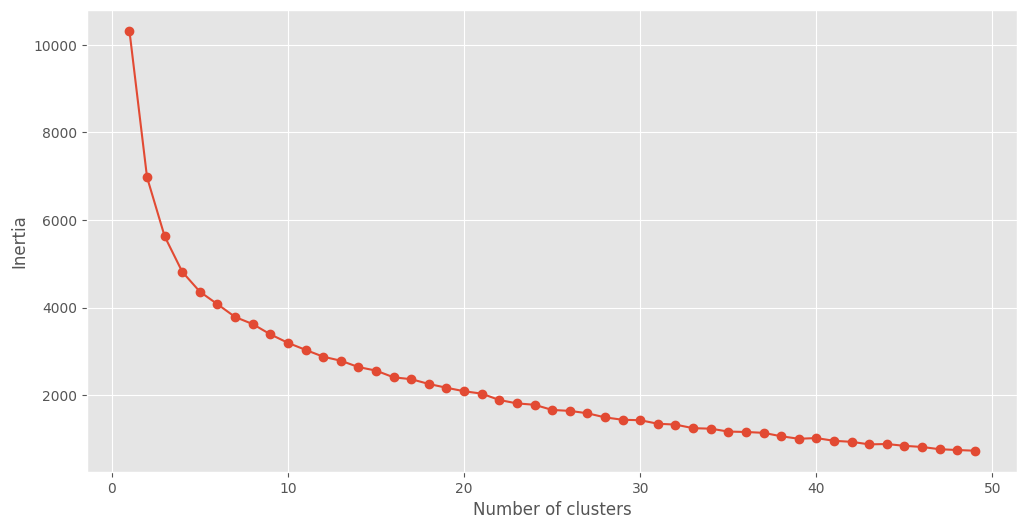

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,50):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,50), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 11, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
cluster10 = []
print(pred)
ordering = ["1", "2", "3", "4", "5", "6", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28",
            "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55",
            "56", "57", "58", "59", "60", "61", "62", "63", "64", "65", "67", "68", "69", "70", "71", "72", "73", "74", "75", "76", "78", "79", "80", "81", "82", "83",
            "85", "86", "88", "90", "91", "92", "94", "95", "99", "100", "101", "102", "103", "104", "105"]
for i in range(93):
  if pred[i] == 0:
    print("0", ordering[i])
    cluster0.append(ordering[i])
  if pred[i] == 1:
    print("1", ordering[i])
    cluster1.append(ordering[i])
  if pred[i] == 2:
    print("2", ordering[i])
    cluster2.append(ordering[i])
  if pred[i] == 3:
    print("3", ordering[i])
    cluster3.append(ordering[i])
  if pred[i] == 4:
    print("4", ordering[i])
    cluster4.append(ordering[i])
  if pred[i] == 5:
    print("5", ordering[i])
    cluster5.append(ordering[i])
  if pred[i] == 6:
    print("6", ordering[i])
    cluster6.append(ordering[i])
  if pred[i] == 7:
    print("7", ordering[i])
    cluster7.append(ordering[i])
  if pred[i] == 8:
    print("8", ordering[i])
    cluster8.append(ordering[i])
  if pred[i] == 9:
    print("9", ordering[i])
    cluster9.append(ordering[i])
  if pred[i] == 10:
    print("10", ordering[i])
    cluster10.append(ordering[i])


print("Patients in cluster 0 are:", cluster0)
print("Patients in cluster 1 are:", cluster1)
print("Patients in cluster 2 are:", cluster2)
print("Patients in cluster 3 are:", cluster3)
print("Patients in cluster 4 are:", cluster4)
print("Patients in cluster 5 are:", cluster5)
print("Patients in cluster 6 are:", cluster6)
print("Patients in cluster 7 are:", cluster7)
print("Patients in cluster 8 are:", cluster8)
print("Patients in cluster 9 are:", cluster9)
print("Patients in cluster 10 are:", cluster10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[ 1  9  2 10  5  5  8  2  2  2  2  1  0  5 10  0  9  1  1  8  2  2  1  3
  9  1  9  0  3  9 10  5  9  1  0  6  9  9  0  5  9  9 10  9  7  5  2  1
  2  4  2  1  2  0  8  9  9  9  0  4 10  1  0  9  9  1  9 10  7  4  9 10
  6 10  4  5  5  5  1  1  2  9  9  9  9  9  6  7  1  1  8  9  9]
1 1
9 2
2 3
10 4
5 5
5 6
8 9
2 10
2 11
2 12
2 13
1 14
0 15
5 16
10 17
0 18
9 19
1 20
1 21
8 22
2 23
2 24
1 25
3 26
9 27
1 28
9 29
0 30
3 31
9 32
10 33
5 34
9 35
1 36
0 37
6 38
9 39
9 40
0 41
5 43
9 44
9 45
10 46
9 47
7 48
5 49
2 50
1 51
2 52
4 53
2 54
1 55
2 56
0 57
8 58
9 59
9 60
9 61
0 62
4 63
10 64
1 65
0 67
9 68
9 69
1 70
9 71
10 72
7 73
4 74
9 75
10 76
6 78
10 79
4 80
5 81
5 82
5 83
1 85
1 86
2 88
9 90
9 91
9 92
9 94
9 95
6 99
7 100
1 101
1 102
8 103
9 104
9 105
Patients in cluster 0 are: ['15', '18', '30', '37', '41', '57', '62', '67']
Patients in cluster 1 are: ['1', '14', '20', '21', '25', '28', '36', '51', '55', '65', '70', '85', '86', '101', '102']
Patients in cluster 2 are: ['3', '10', '11', '12'

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2     18
5     15
3     11
6     10
1     10
4      8
7      8
0      4
9      4
10     3
8      2
Name: cluster, dtype: int64

In [ ]:
kmeans = KMeans(n_clusters = 10)
label = kmeans.fit_predict(data_scaled)
print(label)

[3 6 1 2 3 6 5 5 6 6 6 2 7 0 9 7 2 2 7 3 6 6 5 7 9 5 0 5 5 7 9 5 2 0 2 2 7
 1 5 3 2 7 0 5 5 9 2 1 0 0 1 7 6 8 1 2 5 7 6 2 9 5 3 8 0 9 3 0 3 3 3 2 9 1
 8 3 9 4 9 8 0 9 0 0 2 5 6 5 5 5 2 2 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
data = pd.read_csv("Cleansed_Research_Master_Sheet.csv")
data

Patient Number Segmented Machine Type Type of Calcification Notes  Age  \
0                 1         A         iCAT                   ECC   NaN   50   
1                 2         A         iCAT                   ECC   NaN   65   
2                 3         A         iCAT                   ECC   NaN   43   
3                 4         A         iCAT                   ECC   NaN   66   
4                 5         A        OP300                   ECC   NaN   82   
..              ...       ...          ...                   ...   ...  ...   
195             196       NaN       CS9600                   ICC   NaN  NaN   
196             197       NaN         iCAT                   ICC   NaN  NaN   
197             198       NaN         iCAT                   ECC   NaN  NaN   
198             199       NaN         iCAT                   ECC   NaN  NaN   
199             200       NaN         iCAT                   ICC   NaN  NaN   

    Gender STROKE /Cerebovsacular incident Diabetes Hypertension  \
0        M                             NaN      NaN          NaN   
1        M                               N        N            N   
2        F                               N        N            N   
3        M                               N        N            Y   
4        M                               N        N            Y   
..     ...                             ...      ...          ...   
195    NaN                             NaN      NaN          NaN   
196    NaN                             NaN      NaN          NaN   
197    NaN                             NaN      NaN          NaN   
198    NaN                             NaN      NaN          NaN   
199    NaN                             NaN      NaN          NaN   

    Anticoagulants Medications Cardiac Surgery  \
0              NaN         NaN             NaN   
1                N           N               N   
2                N           N               N   
3                N           Y               N   
4                Y           Y               Y   
..             ...         ...             ...   
195            NaN         NaN             NaN   
196            NaN         NaN             NaN   
197            NaN         NaN             NaN   
198            NaN         NaN             NaN   
199            NaN         NaN             NaN   

    HEART ATTACK/ Myocardial infarction Smoking Notes.1  
0                                   NaN       N     NaN  
1                                     N       Y     NaN  
2                                     N       Y     NaN  
3                                     N       Y     NaN  
4                                     Y       Y     NaN  
..                                  ...     ...     ...  
195                                 NaN     NaN     NaN  
196                                 NaN     NaN     NaN  
197                                 NaN     NaN     NaN  
198                                 NaN     NaN     NaN  
199                                 NaN     NaN     NaN  

[200 rows x 16 columns]

In [ ]:
cluster = [53, 63, 80]
stroke = 0
myocardial = 0
anticoagulant = 0
hypertension = 0
surgery = 0


for i in range(3):
  if data.iloc[cluster[i]-1][7] == "Y":
    stroke = stroke + 1
    #print(stroke)
  if data.iloc[cluster[i]-1][9] == "Y":
    hypertension = hypertension + 1
    #print(hypertension)
  if data.iloc[cluster[i]-1][10] == "Y":
    anticoagulant = anticoagulant + 1
    #print(anticoagulant)
  if data.iloc[cluster[i]-1][12] == "Y":
    surgery = surgery + 1
    #print(surgery)
  if data.iloc[cluster[i]-1][13] == "Y":
    myocardial = myocardial + 1
    #print(myocardial)

print("stroke:", stroke)
print("myocardial:", myocardial)
print("anticoagulate:", anticoagulant)
print("hypertension:", hypertension)
print("surgery:", surgery)

stroke: 1
myocardial: 1
anticoagulate: 2
hypertension: 2
surgery: 2


In [ ]:
data.head()

diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
0                      -329.515702                               -1000   
1                      -379.237463                               -1000   
2                      -424.072554                               -1000   
3                      -464.134122                               -1000   
4                      -438.158680                               -1000   

   diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
0                               18260                                1812   
1                               26971                                1103   
2                               31000                                 203   
3                                4619                                 248   
4                                3095                                1738   

   diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
0                                    7                   0.199777   
1                                    2                   0.656141   
2                                   10                   0.457297   
3                                    3                   0.021665   
4                                    9                   0.070048   

   original_shape_Flatness  original_shape_LeastAxisLength  \
0                 0.049797                        3.074984   
1                 0.448088                        3.415926   
2                 0.185172                        2.810086   
3                 0.014963                        2.156063   
4                 0.058552                        4.208607   

   original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                       61.750076                               15.579474   
1                        7.623335                                8.099383   
2                       15.175510                               12.781236   
3                      144.096357                               76.004212   
4                       71.877532                               72.099999   

   ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
0  ...                                     113.025706   
1  ...                                      78.300099   
2  ...                                      34.450230   
3  ...                                     141.351932   
4  ...                                     389.722160   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.075681                    6.206614   
1                                      0.078294                    6.328372   
2                                      0.168053                    4.918160   
3                                      0.091481                    5.615702   
4                                      0.043633                    6.743351   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.538631                     3.194588   
1                       0.432457                     5.003055   
2                       0.605911                     1.040386   
3                       0.701613                     0.520280   
4                       0.626582                     1.814713   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0                 1.002500                   0.003049   
1                 0.890943                   0.005718   
2                 1.538403                   0.014275   
3                 0.346469                   0.013973   
4                 0.277992                   0.004386   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                3507.574162                 0.309466                 3.533550  
1                1963.994748                 0.260316                 5.028884  
2                 719.823207                 0.40

In [ ]:
import seaborn as sns

sns.pairplot(data)

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7a5ee66ea050> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
data_scaled.shape

(93, 112)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=93)
pca.fit_transform(data_scaled)
pca.explained_variance_ratio_.cumsum()

NameError: ignored

<Axes: >

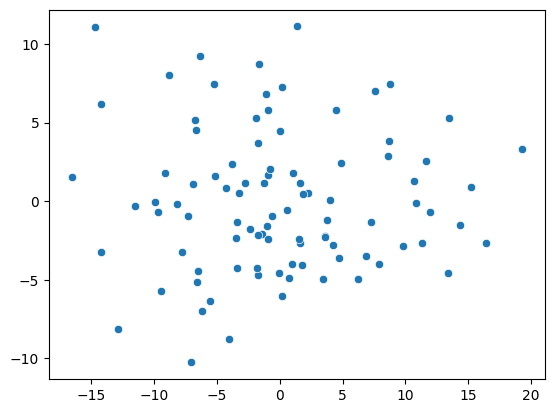

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pcs = pca.fit_transform(data_scaled)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [ ]:
PCA_data = pd.read_csv("PCA Compiled Radiomics With 83.csv")
PCA_data.head()
Info_data = pd.read_csv("Information Gain Updated.csv")

In [ ]:
PCA_data.describe()

diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                        83.000000                                83.0   
mean                       -443.911294                             -1000.0   
std                          76.477928                                 0.0   
min                        -610.437013                             -1000.0   
25%                        -496.437825                             -1000.0   
50%                        -460.224161                             -1000.0   
75%                        -389.529013                             -1000.0   
max                        -272.064475                             -1000.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                           83.000000                           83.000000   
mean                         19192.289157                         1813.228916   
std                           8634.638350                         2203.017727   
min                           2130.000000                           71.000000   
25%                          16047.500000                          348.000000   
50%                          19763.000000                          820.000000   
75%                          26200.000000                         2072.000000   
max                          31000.000000                         9995.000000   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                            83.000000                  83.000000   
mean                              7.325301                   0.389576   
std                               7.998641                   0.261666   
min                               1.000000                   0.021665   
25%                               2.000000                   0.117271   
50%                               4.000000                   0.412259   
75%                               9.000000                   0.581658   
max                              34.000000                   0.865053   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count                83.000000                       83.000000   
mean                  0.229666                        4.126095   
std                   0.175401                        2.866346   
min                   0.014963                        0.869059   
25%                   0.067690                        1.835776   
50%                   0.185486                        3.091270   
75%                   0.358785                        5.920738   
max                   0.724797                       12.170459   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                       83.000000                               83.000000   
mean                        41.619191                               21.974296   
std                         42.031903                               22.663798   
min                          2.358032                                2.418677   
25%                          5.755355                                4.512659   
50%                         21.702524                               12.108262   
75%                         72.785995                               32.330975   
max                        144.096357                               87.549133   

       ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count  ...                                      83.000000   
mean   ...                                     163.642684   
std    ...                                     135.478166   
min    ...                                       4.640125   
25%    ...                                      63.826147   
50%    ...                                     123.376459   
75%    ...                                     249.758724   
max    ...                                     568.774463   

       original_glszm_SmallAreaLowGrayLev

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
PCA_data_scaled = scaler.fit_transform(PCA_data)
Info_data_scaled = scaler.fit_transform(Info_data)

# statistics of scaled data
pd.DataFrame(PCA_data_scaled, columns = PCA_data.columns).describe()

diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                     8.300000e+01                                83.0   
mean                      8.199599e-16                                 0.0   
std                       1.006079e+00                                 0.0   
min                      -2.190672e+00                                 0.0   
25%                      -6.909947e-01                                 0.0   
50%                      -2.145983e-01                                 0.0   
75%                       7.154074e-01                                 0.0   
max                       2.260672e+00                                 0.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                        8.300000e+01                        8.300000e+01   
mean                         5.016068e-18                       -3.344045e-17   
std                          1.006079e+00                        1.006079e+00   
min                         -1.988041e+00                       -7.956450e-01   
25%                         -3.664203e-01                       -6.691440e-01   
50%                          6.649731e-02                       -4.535900e-01   
75%                          8.165150e-01                        1.181762e-01   
max                          1.375795e+00                        3.736470e+00   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                         8.300000e+01               8.300000e+01   
mean                          6.420567e-17               1.845913e-16   
std                           1.006079e+00               1.006079e+00   
min                          -7.956043e-01              -1.414582e+00   
25%                          -6.698231e-01              -1.046986e+00   
50%                          -4.182606e-01               8.721354e-02   
75%                           2.106457e-01               7.385364e-01   
max                           3.355177e+00               1.828163e+00   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count             8.300000e+01                    8.300000e+01   
mean              1.979675e-16                    2.661860e-16   
std               1.006079e+00                    1.006079e+00   
min              -1.231508e+00                   -1.143210e+00   
25%              -9.290701e-01                   -8.038953e-01   
50%              -2.534093e-01                   -3.632207e-01   
75%               7.406119e-01                    6.299143e-01   
max               2.840006e+00                    2.823548e+00   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                    8.300000e+01                            8.300000e+01   
mean                    -1.043342e-16                           -9.497089e-17   
std                      1.006079e+00                            1.006079e+00   
min                     -9.397583e-01                           -8.681024e-01   
25%                     -8.584397e-01                           -7.751475e-01   
50%                     -4.767270e-01                           -4.379676e-01   
75%                      7.460112e-01                            4.597481e-01   
max                      2.452902e+00                            2.910963e+00   

       ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count  ...                                   8.300000e+01   
mean   ...                                   1.203856e-17   
std    ...                                   1.006079e+00   
min    ...                                  -1.180774e+00   
25%    ...                                  -7.412510e-01   
50%    ...                                  -2.990224e-01   
75%    ...                                   6.395093e-01   
max    ...                                   3.008563e+00   

       original_glszm_SmallAreaLowGrayLev

In [ ]:
pd.DataFrame(PCA_data_scaled).head()

0    1         2         3         4         5         6         7    \
0  0.850794  0.0  0.906349 -0.324349 -0.669823  1.024916  1.252843 -0.249267   
1  0.260982  0.0  1.375795 -0.735363  0.336427  0.260379 -0.255207 -0.461915   
2 -0.266034  0.0 -1.698031 -0.714812 -0.544042 -1.414582 -1.231508 -0.691475   
3  0.075677  0.0 -1.875602 -0.034356  0.210646 -1.228556 -0.981482  0.028961   
4  0.994708  0.0 -1.875602 -0.270917  0.713771 -1.165973 -1.088497  0.452396   

        8         9    ...       102       103       104       105       106  \
0 -0.813728 -0.615928  ... -0.633766  0.040427  0.457589 -0.731983 -0.088030   
1 -0.632958 -0.408093  ... -0.959401  2.254893 -1.617823  0.608805 -0.521847   
2  2.452902  2.398467  ... -0.165534  0.365788 -0.591248  1.348570 -0.578787   
3  0.724266  2.225153  ...  1.678897 -0.814686  1.068315  0.768589 -0.437077   
4  2.252636 -0.474418  ...  2.806786 -0.488476  0.611396  1.811302 -0.578491   

        107       108       109       110       111  
0 -0.331844 -0.427282 -0.419533 -0.623905 -0.230429  
1  0.200694  0.296356 -0.778765  0.074070 -0.246177  
2 -0.779675  0.270817 -0.086614  1.411420  0.859619  
3 -0.835998 -0.539919  1.873898  0.403872  0.327071  
4 -0.736994 -0.599334  4.909995  2.345167  1.301069  

[5 rows x 112 columns]

In [ ]:
PCA_data_scaled_dataframe = pd.DataFrame(PCA_data_scaled, columns = PCA_data.columns)
PCA_data_scaled_dataframe_no_columns = pd.DataFrame(PCA_data_scaled, columns = PCA_data.columns)
Info_data_scaled_dataframe = pd.DataFrame(Info_data_scaled, columns=Info_data.columns)

In [ ]:
PCA_data_scaled_dataframe.shape

(83, 112)

In [ ]:
from sklearn.decomposition import PCA

pca_112 = PCA(n_components = 83, random_state = 2020)
pca_112.fit(PCA_data_scaled_dataframe)
x_pca_112 = pca_112.transform(PCA_data_scaled_dataframe)

In [ ]:
print("Variance explained by 83 principal components =", sum(pca_112.explained_variance_ratio_ * 100))

Variance explained by 83 principal components = 100.00000000000003


In [ ]:
pca_112.explained_variance_ratio_ * 100

array([5.05711911e+01, 1.78755997e+01, 6.52996398e+00, 4.39989301e+00,
       3.37706580e+00, 2.90298353e+00, 2.39782137e+00, 1.80630511e+00,
       1.41679492e+00, 1.22318986e+00, 9.51748710e-01, 8.75334143e-01,
       7.31243411e-01, 6.61056808e-01, 6.09780601e-01, 5.48291057e-01,
       3.94273569e-01, 3.44107216e-01, 2.92198425e-01, 2.46740023e-01,
       2.36951559e-01, 2.02819958e-01, 1.81759237e-01, 1.58416883e-01,
       1.28605359e-01, 1.03952617e-01, 1.00390136e-01, 9.58041480e-02,
       7.53575505e-02, 6.98670915e-02, 6.37894933e-02, 5.44542687e-02,
       4.54142467e-02, 3.77036426e-02, 3.69630979e-02, 3.52377519e-02,
       2.92730328e-02, 2.61284172e-02, 2.08050954e-02, 1.76127437e-02,
       1.63642335e-02, 1.35767721e-02, 1.22798012e-02, 1.06626756e-02,
       9.58970595e-03, 8.26878201e-03, 6.56223979e-03, 5.38612502e-03,
       5.24663462e-03, 4.25805105e-03, 3.56353780e-03, 3.50860847e-03,
       3.00758944e-03, 2.79422482e-03, 2.49273531e-03, 1.96817267e-03,
      

In [ ]:
np.cumsum(pca_112.explained_variance_ratio_ * 100)

array([ 50.57119109,  68.44679077,  74.97675475,  79.37664776,
        82.75371356,  85.65669709,  88.05451846,  89.86082356,
        91.27761849,  92.50080835,  93.45255706,  94.3278912 ,
        95.05913461,  95.72019142,  96.32997202,  96.87826308,
        97.27253665,  97.61664386,  97.90884229,  98.15558231,
        98.39253387,  98.59535383,  98.77711306,  98.93552995,
        99.06413531,  99.16808792,  99.26847806,  99.36428221,
        99.43963976,  99.50950685,  99.57329634,  99.62775061,
        99.67316486,  99.7108685 ,  99.7478316 ,  99.78306935,
        99.81234238,  99.8384708 ,  99.8592759 ,  99.87688864,
        99.89325287,  99.90682964,  99.91910945,  99.92977212,
        99.93936183,  99.94763061,  99.95419285,  99.95957897,
        99.96482561,  99.96908366,  99.9726472 ,  99.97615581,
        99.9791634 ,  99.98195762,  99.98445036,  99.98641853,
        99.98832474,  99.990191  ,  99.99163951,  99.99305355,
        99.99423056,  99.99509734,  99.99590189,  99.99

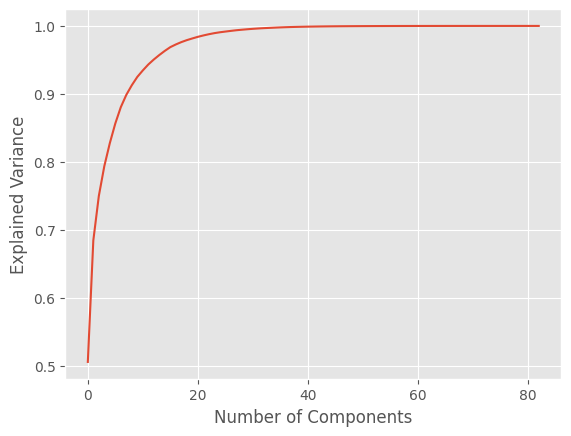

In [ ]:
plt.plot(np.cumsum(pca_112.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('elbow_plot.png', dpi=100)

In [ ]:
pca_2 = PCA(n_components=2, random_state=2020)
pca_2.fit(PCA_data_scaled_dataframe)
X_pca_2 = pca_2.transform(PCA_data_scaled_dataframe)
X_pca_2.shape

(83, 2)

In [ ]:
pca_info_2 = PCA(n_components=2, random_state=2020)
pca_info_2.fit(Info_data_scaled_dataframe)
X_info_pca_2 = pca_info_2.transform(Info_data_scaled_dataframe)
X_info_pca_2.shape

(83, 2)

In [ ]:
import pandas as pd

master_sheet = pd.read_csv("PCA Master Sheet With 83.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

stroke = []
myocardial = []
anticoagulant = []
hypertension = []
surgery = []

for i in range(83):
  if master_sheet_frame.iloc[i][7] == "Y":
    stroke.append("Y")
  elif master_sheet_frame.iloc[i][7] == "N":
    stroke.append("N")
  else:
    stroke.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][9] == "Y":
    hypertension.append("Y")
  elif master_sheet_frame.iloc[i][9] == "N":
    hypertension.append("N")
  else:
    hypertension.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][10] == "Y":
    anticoagulant.append("Y")
  elif master_sheet_frame.iloc[i][10] == "N":
    anticoagulant.append("N")
  else:
    anticoagulant.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][12] == "Y":
    surgery.append("Y")
  elif master_sheet_frame.iloc[i][12] == "N":
    surgery.append("N")
  else:
    surgery.append("Nan")

for i in range(83):
  if master_sheet_frame.iloc[i][13] == "Y":
    myocardial.append("Y")
  elif master_sheet_frame.iloc[i][13] == "N":
    myocardial.append("N")
  else:
    myocardial.append("Nan")

#print(stroke)
stroke_frame = pd.DataFrame(stroke)
myocardial_frame = pd.DataFrame(myocardial)
anticoagulant_frame = pd.DataFrame(anticoagulant)
hypertension_frame = pd.DataFrame(hypertension)
surgery_frame = pd.DataFrame(surgery)

# stroke_frame.shape
# myocardial_frame.shape
# anticoagulant_frame.shape
# hypertension_frame.shape
# surgery_frame.shape





In [ ]:
stroke_frame.to_csv('stroke_frame.csv', index=False)

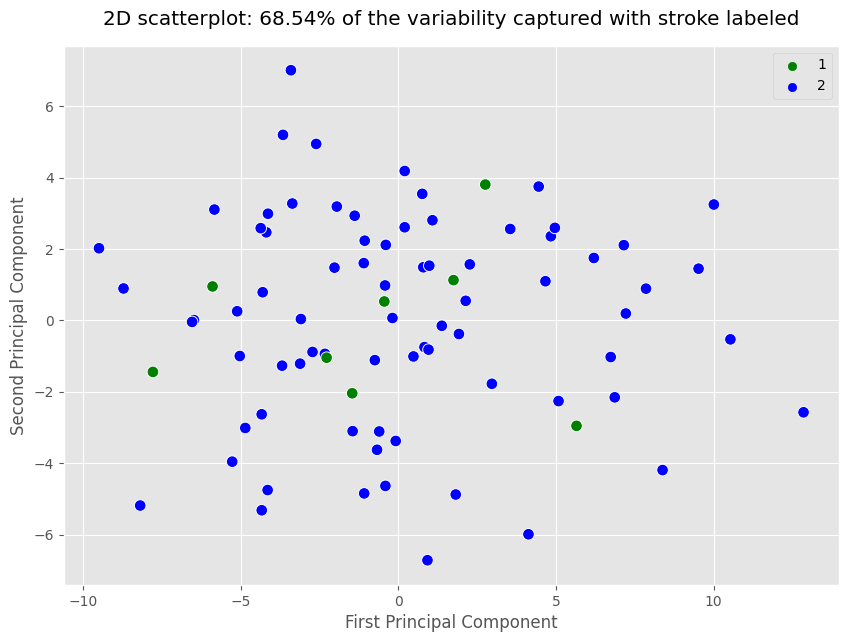

In [ ]:


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_info_pca_2[:, 0], y=X_info_pca_2[:, 1], s=70, hue=stroke, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.54% of the variability captured with stroke labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")



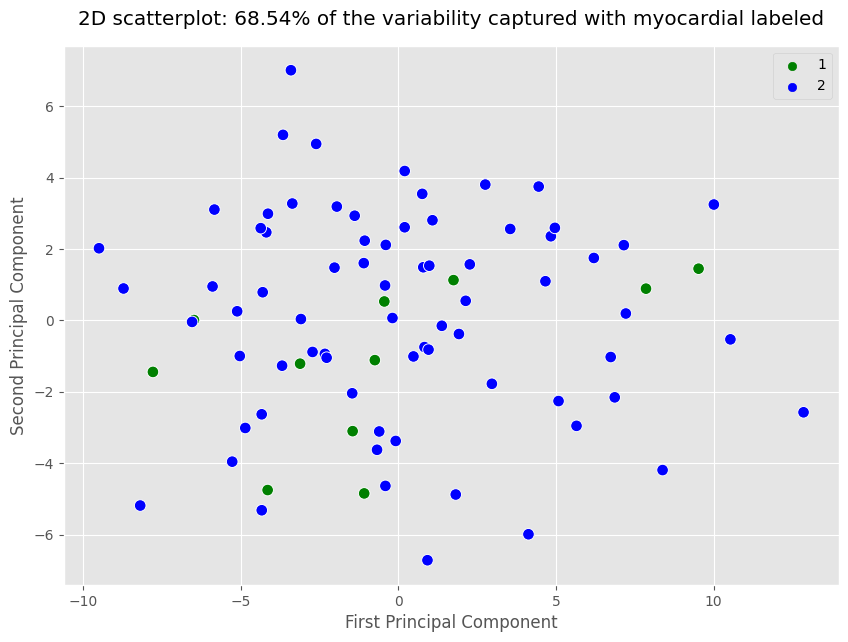

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_info_pca_2[:, 0], y=X_info_pca_2[:, 1], s=70, hue=myocardial, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.54% of the variability captured with myocardial labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

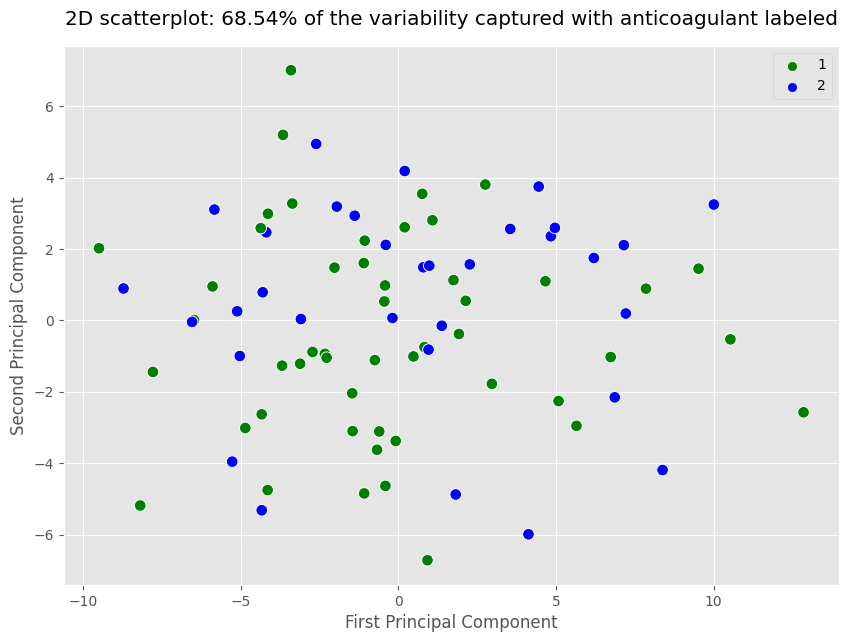

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_info_pca_2[:, 0], y=X_info_pca_2[:, 1], s=70, hue=anticoagulant, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.54% of the variability captured with anticoagulant labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

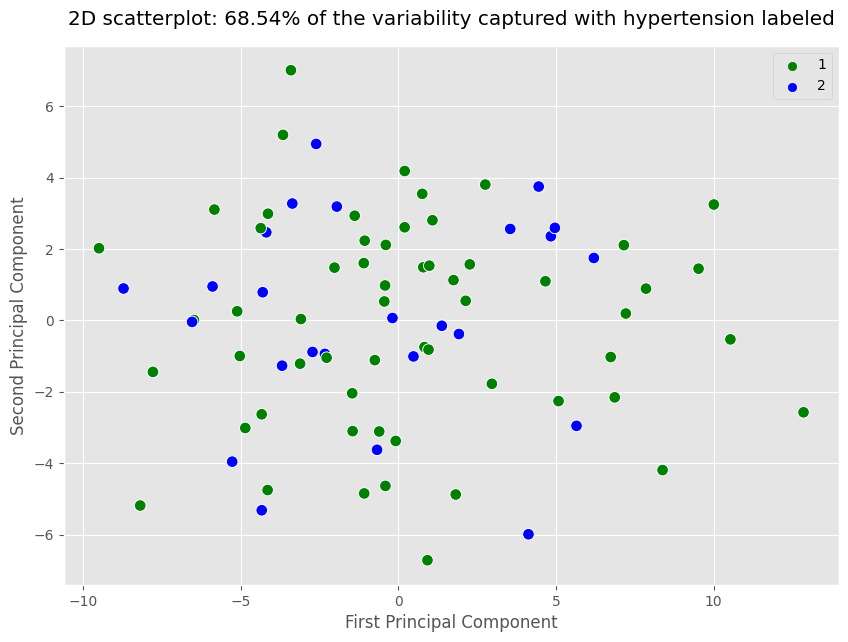

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_info_pca_2[:, 0], y=X_info_pca_2[:, 1], s=70, hue=hypertension, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.54% of the variability captured with hypertension labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

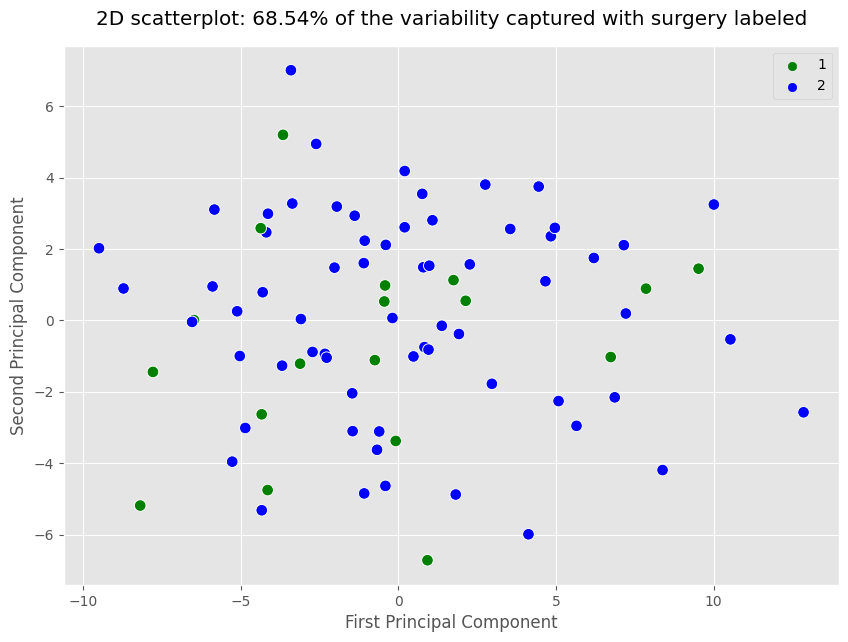

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_info_pca_2[:, 0], y=X_info_pca_2[:, 1], s=70, hue=surgery, palette=['green', 'blue'])

plt.title("2D scatterplot: 68.54% of the variability captured with surgery labeled", pad=15)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("2d_scatterplot.png")

In [ ]:
pca_3 = PCA(n_components=3, random_state=2020)
pca_3.fit(PCA_data_scaled_dataframe)
X_pca_3 = pca_3.transform(PCA_data_scaled_dataframe)
X_pca_3.shape

(83, 3)

In [ ]:
import pandas as pd

master_sheet = pd.read_csv("PCA Master Sheet With 83.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

stroke = []
myocardial = []
anticoagulant = []
hypertension = []
surgery = []

for i in range(83):
  if master_sheet_frame.iloc[i][7] == "Y":
    stroke.append(1)
  elif master_sheet_frame.iloc[i][7] == "N":
    stroke.append(2)
  else:
    stroke.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][9] == "Y":
    hypertension.append(1)
  elif master_sheet_frame.iloc[i][9] == "N":
    hypertension.append(2)
  else:
    hypertension.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][10] == "Y":
    anticoagulant.append(1)
  elif master_sheet_frame.iloc[i][10] == "N":
    anticoagulant.append(2)
  else:
    anticoagulant.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][12] == "Y":
    surgery.append(1)
  elif master_sheet_frame.iloc[i][12] == "N":
    surgery.append(2)
  else:
    surgery.append(3)

for i in range(83):
  if master_sheet_frame.iloc[i][13] == "Y":
    myocardial.append(1)
  elif master_sheet_frame.iloc[i][13] == "N":
    myocardial.append(2)
  else:
    myocardial.append(3)

#print(stroke)
stroke_frame = pd.DataFrame(stroke)
myocardial_frame = pd.DataFrame(myocardial)
anticoagulant_frame = pd.DataFrame(anticoagulant)
hypertension_frame = pd.DataFrame(hypertension)
surgery_frame = pd.DataFrame(surgery)




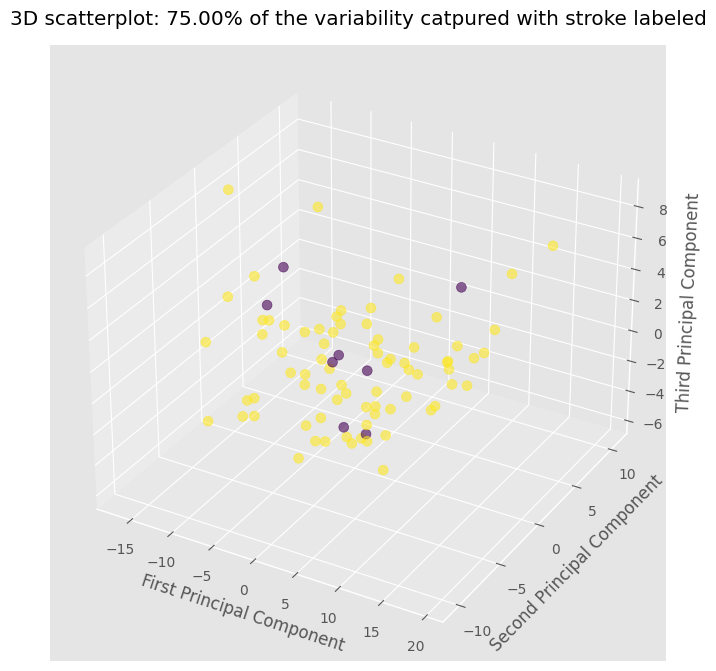

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:,2], c = stroke, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with stroke labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

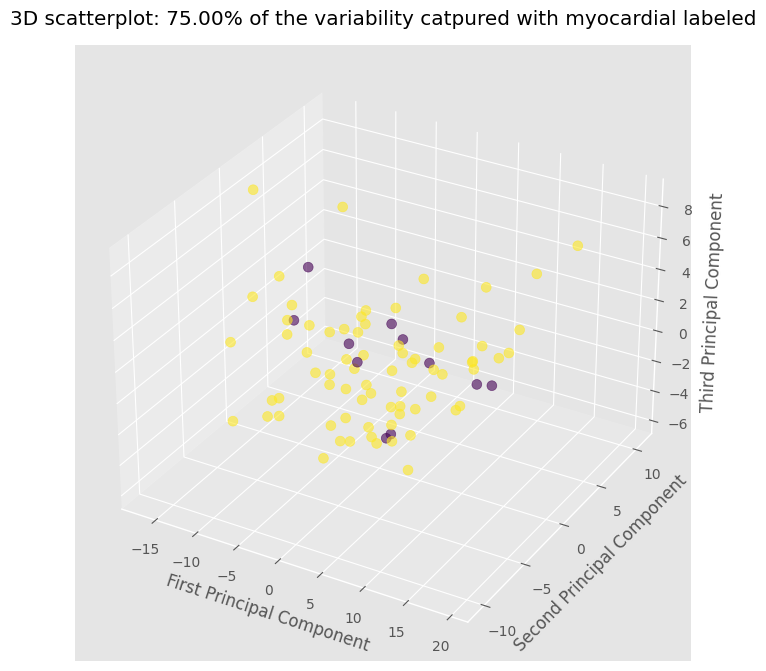

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:,2], c = myocardial, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with myocardial labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

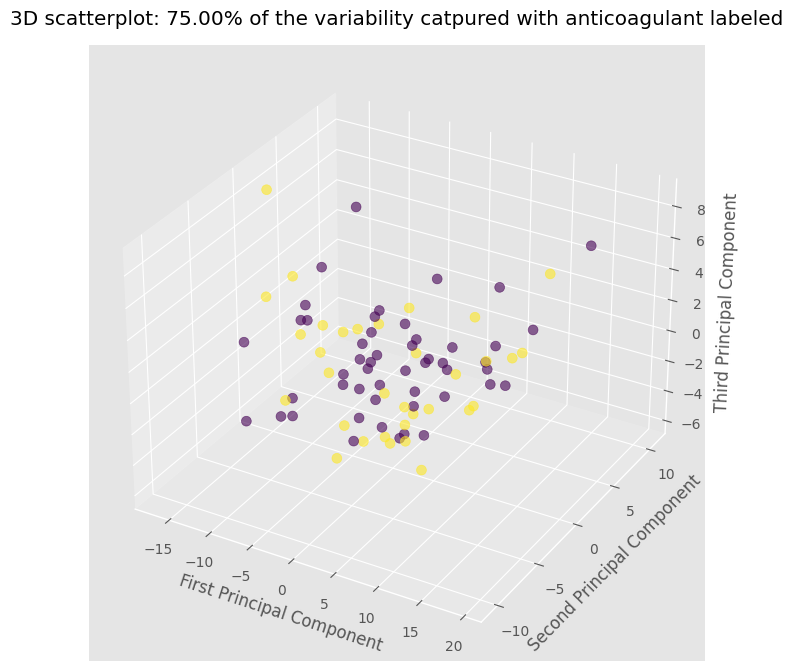

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:,2], c = anticoagulant, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with anticoagulant labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

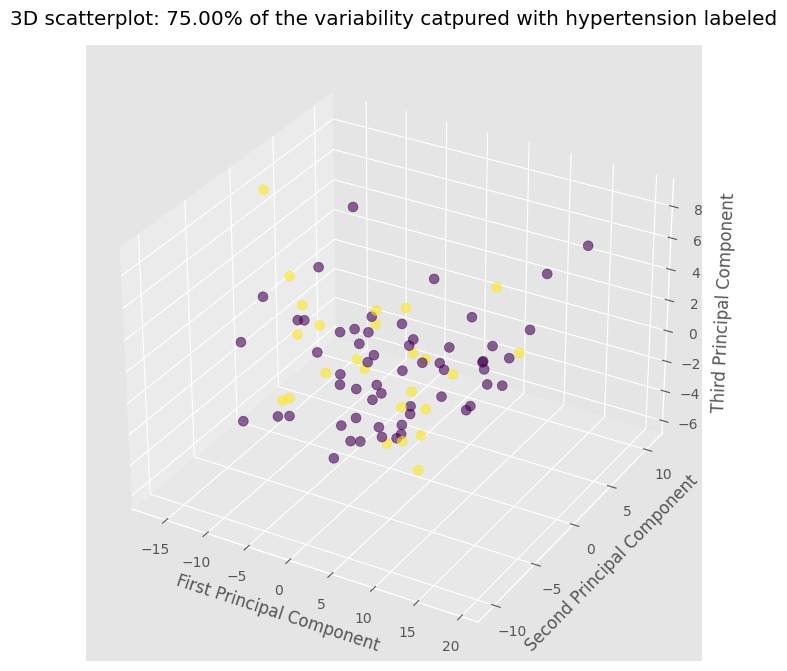

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:,2], c = hypertension, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with hypertension labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

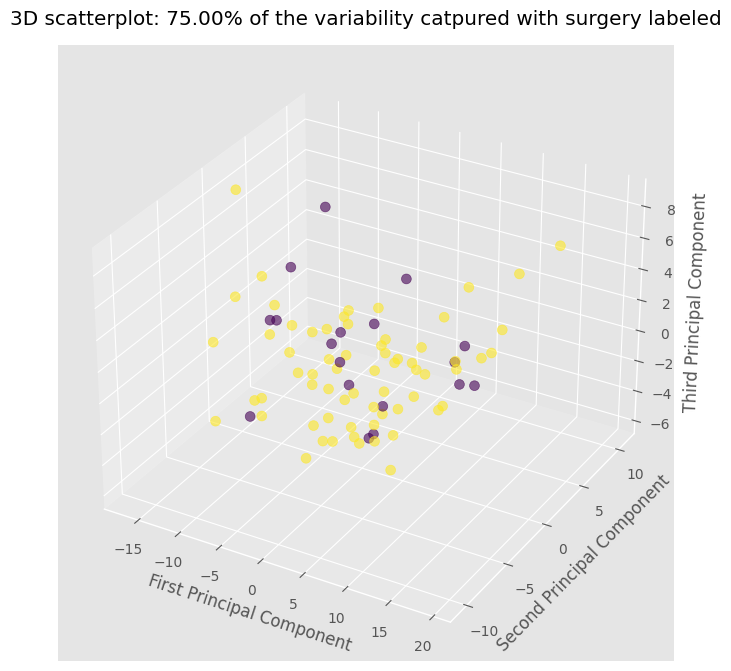

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:,2], c = surgery, s=50, alpha=0.6)

plt.title("3D scatterplot: 75.00% of the variability catpured with surgery labeled", pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.savefig("3d_scatterplot.png")

In [ ]:
pca_95 = PCA(n_components = 0.95, random_state = 2020)
pca_95.fit(PCA_data_scaled)
X_pca_95 = pca_95.transform(PCA_data_scaled)

X_pca_95.shape

(83, 13)

In [ ]:
df_new_95 = pd.DataFrame(X_pca_95, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
df_new_95['label'] = stroke
df_new_95.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   2.273554  0.573918  0.817211 -1.904774  1.673672 -0.516342 -2.107614   
1   6.994839 -3.601181 -4.027371  3.335307  0.431897 -1.506416  0.110011   
2  -1.663332 -5.098981 -3.968224  1.616330 -1.894778  3.324106  1.963858   
3  -9.986177 -0.380438  1.486393  0.705211 -0.883954  3.013719  0.245149   
4 -14.178307 -3.826626  0.981955  8.073585 -0.518290  2.642171 -0.057978   

        PC8       PC9      PC10      PC11      PC12      PC13  label  
0 -0.381492 -1.225409 -0.989612 -0.260952  0.704047  0.368199      2  
1  1.361993 -0.661195  0.515092  1.779229 -0.229259  0.062670      2  
2  0.413841  0.319833 -1.480895 -0.635849 -0.883684  1.246914      2  
3 -0.085542 -0.431523  0.747278 -0.599357 -0.158546  0.659753      2  
4 -2.844840  1.437570  2.542917 -2.175836 -0.224085 -2.561980      2

In [ ]:
df_new_95.shape

(83, 14)

In [ ]:
import pandas as pd
hierarchical_data_93 = pd.read_csv("Compiled_Radiomics_Sorted_Useless_No.csv")
hierarchical_data_93.describe()

diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                        93.000000                                93.0   
mean                       -444.618669                             -1000.0   
std                          75.888061                                 0.0   
min                        -610.437013                             -1000.0   
25%                        -497.035712                             -1000.0   
50%                        -460.540822                             -1000.0   
75%                        -389.445262                             -1000.0   
max                        -272.064475                             -1000.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                           93.000000                           93.000000   
mean                         19571.741935                         1749.333333   
std                           8433.900448                         2110.142120   
min                           2130.000000                           71.000000   
25%                          16238.000000                          334.000000   
50%                          19998.000000                          846.000000   
75%                          25858.000000                         1981.000000   
max                          32703.000000                         9995.000000   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                            93.000000                  93.000000   
mean                              7.118280                   0.389611   
std                               7.794716                   0.264122   
min                               1.000000                   0.021665   
25%                               2.000000                   0.119199   
50%                               4.000000                   0.412259   
75%                               9.000000                   0.629895   
max                              34.000000                   0.865053   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count                93.000000                       93.000000   
mean                  0.226431                        3.977547   
std                   0.177180                        2.781963   
min                   0.014963                        0.869059   
25%                   0.060442                        1.836847   
50%                   0.185172                        3.050749   
75%                   0.349017                        5.871425   
max                   0.724797                       12.170459   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                       93.000000                               93.000000   
mean                        41.389166                               22.143650   
std                         41.668431                               22.719695   
min                          2.358032                                2.418677   
25%                          5.991631                                4.657253   
50%                         21.702524                               12.108262   
75%                         71.877532                               33.160520   
max                        144.096357                               87.549133   

       ...  original_glszm_SmallAreaHighGrayLevelEmphasis  \
count  ...                                      93.000000   
mean   ...                                     165.525474   
std    ...                                     139.113154   
min    ...                                       4.640125   
25%    ...                                      66.615104   
50%    ...                                     123.376459   
75%    ...                                     247.420091   
max    ...                                     590.729495   

       original_glszm_SmallAreaLowGrayLev

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
hierarchical_93_scaled = scaler.fit_transform(hierarchical_data_93)

# statistics of scaled data
pd.DataFrame(hierarchical_93_scaled).describe()

0     1             2             3             4    \
count  9.300000e+01  93.0  9.300000e+01  9.300000e+01  9.300000e+01   
mean  -2.829278e-16   0.0 -4.760230e-17  4.775153e-17  2.745713e-17   
std    1.005420e+00   0.0  1.005420e+00  1.005420e+00  1.005420e+00   
min   -2.196882e+00   0.0 -2.079261e+00 -7.996760e-01 -7.891809e-01   
25%   -6.944590e-01   0.0 -3.974212e-01 -6.743643e-01 -6.601935e-01   
50%   -2.109482e-01   0.0  5.081497e-02 -4.304115e-01 -4.022188e-01   
75%    7.309773e-01   0.0  7.493959e-01  1.103823e-01  2.427182e-01   
max    2.286123e+00   0.0  1.565400e+00  3.928815e+00  3.467403e+00   

                5             6             7             8             9    \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean  -2.650210e-16  1.432546e-17  3.772371e-16 -4.536395e-17 -1.551925e-17   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min   -1.400643e+00 -1.199991e+00 -1.123428e+00 -9.417846e-01 -8.728939e-01   
25%   -1.029366e+00 -9.419167e-01 -7.736633e-01 -8.541093e-01 -7.738297e-01   
50%    8.621199e-02 -2.341262e-01 -3.349509e-01 -4.750202e-01 -4.440984e-01   
75%    9.146784e-01  6.956205e-01  6.844601e-01  7.356556e-01  4.875322e-01   
max    1.809842e+00  2.828002e+00  2.960974e+00  2.478228e+00  2.894405e+00   

       ...           102           103           104           105  \
count  ...  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   ...  7.998381e-17 -3.581365e-17  2.900905e-16 -8.058070e-17   
std    ...  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min    ... -1.162775e+00 -1.731086e+00 -2.930092e+00 -3.014281e+00   
25%    ... -7.148603e-01 -5.295022e-01 -5.797713e-01 -5.222563e-01   
50%    ... -3.046259e-01 -1.489784e-01  2.448884e-01  9.395963e-02   
75%    ...  5.918814e-01  3.315313e-01  7.843021e-01  6.572497e-01   
max    ...  3.073100e+00  3.744912e+00  1.666602e+00  2.402333e+00   

                106           107           108           109           110  \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   3.044160e-17 -6.088320e-17 -1.122161e-16 -3.939501e-17  1.844403e-16   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min   -6.064362e-01 -1.037894e+00 -8.505299e-01 -9.930358e-01 -1.506648e+00   
25%   -4.625022e-01 -6.502349e-01 -6.588661e-01 -7.085247e-01 -7.488472e-01   
50%   -3.390521e-01 -3.239608e-01 -3.723878e-01 -2.486828e-01 -2.493330e-01   
75%   -7.651536e-02  4.768828e-01  3.213914e-01  3.561284e-01  5.340615e-01   
max    6.075548e+00  5.743480e+00  4.863509e+00  5.122202e+00  4.041608e+00   

                111  
count  9.300000e+01  
mean   1.253478e-16  
std    1.005420e+00  
min   -9.874148e-01  
25%   -6.823175e-01  
50%   -3.282941e-01  
75%    2.620670e-01  
max    4.143499e+00  

[8 rows x 112 columns]

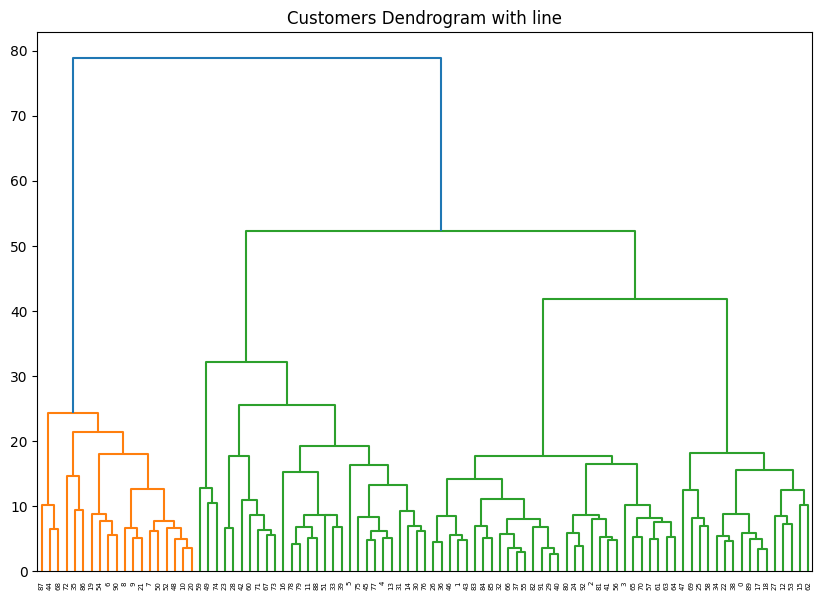

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(hierarchical_93_scaled,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'g', linestyle = '-')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(hierarchical_93_scaled)
labels = clustering_model.labels_

print(labels)

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []

ordering = ["1", "2", "3", "4", "5", "6", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28",
            "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55",
            "56", "57", "58", "59", "60", "61", "62", "63", "64", "65", "67", "68", "69", "70", "71", "72", "73", "74", "75", "76", "78", "79", "80", "81", "82", "83",
            "85", "86", "88", "90", "91", "92", "94", "95", "99", "100", "101", "102", "103", "104", "105"]

for i in range(93):

  print("Patient", ordering[i], "label is:", labels[i])

  if labels[i] == 0:
    cluster0.append(ordering[i])
  if labels[i] == 1:
    cluster1.append(ordering[i])
  if labels[i] == 2:
    cluster2.append(ordering[i])
  if labels[i] == 3:
    cluster3.append(ordering[i])
  if labels[i] == 4:
    cluster4.append(ordering[i])


print("Patients in cluster 0 are:", cluster0)
print("Patients in cluster 1 are:", cluster1)
print("Patients in cluster 2 are:", cluster2)
print("Patients in cluster 3 are:", cluster3)
print("Patients in cluster 4 are:", cluster4)

master_sheet = pd.read_csv("Research_Master_Sheet_93.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

index0 = 0
stroke0 = 0
hypertension0 = 0
anticoagulants0 = 0
surgery0 = 0
myocardial0 = 0
nan0 = 0
###############
index1 = 0
stroke1 = 0
hypertension1 = 0
anticoagulants1 = 0
surgery1 = 0
myocardial1 = 0
nan1 = 0
#################
index2 = 0
stroke2 = 0
hypertension2 = 0
anticoagulants2 = 0
surgery2 = 0
myocardial2 = 0
nan2 = 0
##################
index3 = 0
stroke3 = 0
hypertension3 = 0
anticoagulants3 = 0
surgery3 = 0
myocardial3 = 0
nan3 = 0
#################
index4 = 0
stroke4 = 0
hypertension4 = 0
anticoagulants4 = 0
surgery4 = 0
myocardial4 = 0
nan4 = 0

for i in range(len(cluster0)):
  for j in range(len(ordering)):
    if cluster0[i] == ordering[j]:
      index0 = j
  if master_sheet_frame.iloc[index0][7] == "Y":
    stroke0 = stroke0 + 1
  if master_sheet_frame.iloc[index0][9] == "Y":
    hypertension0 = hypertension0 + 1
  if master_sheet_frame.iloc[index0][10] == "Y":
    anticoagulants0 = anticoagulants0 + 1
  if master_sheet_frame.iloc[index0][12] == "Y":
    surgery0 = surgery0 + 1
  if master_sheet_frame.iloc[index0][13] == "Y":
    myocardial0 = myocardial0 + 1
  if master_sheet_frame.iloc[index0][7] != "Y" and master_sheet_frame.iloc[index0][7] != "N":
    nan0 = nan0 + 1

print("Number of strokes in cluster 0:", stroke0)
print("Percentage of stroke in cluster 0 is:", stroke0/(len(cluster0) - nan0))
print("Number of hypertension in cluster 0:", hypertension0)
print("Percentage of hypertension in cluster 0 is:", hypertension0/(len(cluster0) - nan0))
print("Number of anticoagulants in cluster 0:", anticoagulants0)
print("Percentage of anticoagulants in cluster 0 is:", anticoagulants0/(len(cluster0) - nan0))
print("Number of surgeries in cluster 0:", surgery0)
print("Percentage of surgeries in cluster 0 is:", surgery0/(len(cluster0) - nan0))
print("Number of myocardial in cluster 0:", myocardial0)
print("Percentage of myocardial in cluster 0 is:", myocardial0/(len(cluster0) - nan0))


###################################################

for i in range(len(cluster1)):
  for j in range(len(ordering)):
    if cluster1[i] == ordering[j]:
      index1 = j
  if master_sheet_frame.iloc[index1][7] == "Y":
    stroke1 = stroke1 + 1
  if master_sheet_frame.iloc[index1][9] == "Y":
    hypertension1 = hypertension1 + 1
  if master_sheet_frame.iloc[index1][10] == "Y":
    anticoagulants1 = anticoagulants1 + 1
  if master_sheet_frame.iloc[index1][12] == "Y":
    surgery1 = surgery1 + 1
  if master_sheet_frame.iloc[index1][13] == "Y":
    myocardial1 = myocardial1 + 1
  if master_sheet_frame.iloc[index1][7] != "Y" and master_sheet_frame.iloc[index1][7] != "N":
    nan1 = nan1 + 1



print("Number of strokes in cluster 1:", stroke1)
print("Percentage of stroke in cluster 1 is:", stroke1/(len(cluster1) - nan1))
print("Number of hypertension in cluster 1:", hypertension1)
print("Percentage of hypertension in cluster 1 is:", hypertension1/(len(cluster1) - nan1))
print("Number of anticoagulants in cluster 1:", anticoagulants1)
print("Percentage of anticoagulants in cluster 1 is:", anticoagulants1/(len(cluster1) - nan1))
print("Number of surgery in cluster 1:", surgery1)
print("Percentage of surgery in cluster 1 is:", surgery1/(len(cluster1) - nan1))
print("Number of myocardial in cluster 1:", myocardial1)
print("Percentage of myocardial in cluster 1 is:", myocardial1/(len(cluster1) - nan1))

##################################################

for i in range(len(cluster2)):
  for j in range(len(ordering)):
    if cluster2[i] == ordering[j]:
      index2 = j
  if master_sheet_frame.iloc[index2][7] == "Y":
    stroke2 = stroke2 + 1
  if master_sheet_frame.iloc[index2][9] == "Y":
    hypertension2 = hypertension2 + 1
  if master_sheet_frame.iloc[index2][10] == "Y":
    anticoagulants2 = anticoagulants2 + 1
  if master_sheet_frame.iloc[index2][12] == "Y":
    surgery2 = surgery2 + 1
  if master_sheet_frame.iloc[index2][13] == "Y":
    myocardial2 = myocardial2 + 1
  if master_sheet_frame.iloc[index2][7] != "Y" and master_sheet_frame.iloc[index2][7] != "N":
    nan2 = nan2 + 1

print("Number of strokes in cluster 2:", stroke2)
print("Percentage of stroke in cluster 2 is:", stroke2/(len(cluster2) - nan2))
print("Number of hypertension in cluster 2:", hypertension2)
print("Percentage of hypertension in cluster 2 is:", hypertension2/(len(cluster2) - nan2))
print("Number of anticoagulants in cluster 2:", anticoagulants2)
print("Percentage of anticoagulants in cluster 2 is:", anticoagulants2/(len(cluster2) - nan2))
print("Number of surgery in cluster 2:", surgery2)
print("Percentage of surgery in cluster 2 is:", surgery2/(len(cluster2) - nan2))
print("Number of myocardial in cluster 2:", myocardial2)
print("Percentage of myocardial in cluster 2 is:", myocardial2/(len(cluster2) - nan2))

####################################################

for i in range(len(cluster3)):
  for j in range(len(ordering)):
    if cluster3[i] == ordering[j]:
      index3 = j
  if master_sheet_frame.iloc[index3][7] == "Y":
    stroke3 = stroke3 + 1
  if master_sheet_frame.iloc[index3][9] == "Y":
    hypertension3 = hypertension3 + 1
  if master_sheet_frame.iloc[index3][10] == "Y":
    anticoagulants3 = anticoagulants3 + 1
  if master_sheet_frame.iloc[index3][12] == "Y":
    surgery3 = surgery3 + 1
  if master_sheet_frame.iloc[index3][13] == "Y":
    myocardial3 = myocardial3 + 1
  if master_sheet_frame.iloc[index3][7] != "Y" and master_sheet_frame.iloc[index3][7] != "N":
    nan3 = nan3 + 1


print("Number of strokes in cluster 3:", stroke3)
print("Percentage of stroke in cluster 3 is:", stroke3/(len(cluster3) - nan3))
print("Number of hypertension in cluster 3:", hypertension3)
print("Percentage of hypertension in cluster 3 is:", hypertension3/(len(cluster3) - nan3))
print("Number of anticoagulants in cluster 3:", anticoagulants3)
print("Percentage of anticoagulants in cluster 3 is:", anticoagulants3/(len(cluster3) - nan3))
print("Number of surgeries in cluster 3:", surgery3)
print("Percentage of surgeries in cluster 3 is:", surgery3/(len(cluster3) - nan3))
print("Number of myocardial in cluster 3:", myocardial3)
print("Percentage of myocardial in cluster 3 is:", myocardial3/(len(cluster3) - nan3))

#####################################################

for i in range(len(cluster4)):
  for j in range(len(ordering)):
    if cluster4[i] == ordering[j]:
      index4 = j
  if master_sheet_frame.iloc[index4][7] == "Y":
    stroke4 = stroke4 + 1
  if master_sheet_frame.iloc[index4][9] == "Y":
    hypertension4 = hypertension4 + 1
  if master_sheet_frame.iloc[index4][10] == "Y":
    anticoagulants4 = anticoagulants4 + 1
  if master_sheet_frame.iloc[index4][12] == "Y":
    surgery4 = surgery4 + 1
  if master_sheet_frame.iloc[index4][13] == "Y":
    myocardial4 = myocardial4 + 1
  if master_sheet_frame.iloc[index4][7] != "Y" and master_sheet_frame.iloc[index4][7] != "N":
    nan4 = nan4 + 1

print("Number of strokes in cluster 4:", stroke4)
print("Percentage of stroke in cluster 4 is:", stroke4/(len(cluster4) - nan4))
print("Number of hypertension in cluster 4:", hypertension4)
print("Percentage of hypertension in cluster 4 is:", hypertension4/(len(cluster4) - nan4))
print("Number of anticoagulants in cluster 4:", anticoagulants4)
print("Percentage of anticoagulants in cluster 4 is:", anticoagulants4/(len(cluster4) - nan4))
print("Number of surgeries in cluster 4:", surgery4)
print("Percentage of surgeries in cluster 4 is:", surgery4/(len(cluster4) - nan4))
print("Number of myocardial in cluster 4:", myocardial4)
print("Percentage of myocardial in cluster 4 is:", myocardial4/(len(cluster4) - nan4))






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[2 3 3 3 0 0 1 1 1 1 1 0 2 0 0 2 0 2 2 1 1 1 2 0 3 2 3 2 0 3 0 0 3 0 2 1 3
 3 2 0 3 3 0 3 1 0 3 2 1 4 1 0 1 2 1 3 3 3 2 4 0 3 2 3 3 3 3 0 1 2 3 0 1 0
 4 0 0 0 0 0 3 3 3 3 3 3 1 1 0 2 1 3 3]
Patient 1 label is: 2
Patient 2 label is: 3
Patient 3 label is: 3
Patient 4 label is: 3
Patient 5 label is: 0
Patient 6 label is: 0
Patient 9 label is: 1
Patient 10 label is: 1
Patient 11 label is: 1
Patient 12 label is: 1
Patient 13 label is: 1
Patient 14 label is: 0
Patient 15 label is: 2
Patient 16 label is: 0
Patient 17 label is: 0
Patient 18 label is: 2
Patient 19 label is: 0
Patient 20 label is: 2
Patient 21 label is: 2
Patient 22 label is: 1
Patient 23 label is: 1
Patient 24 label is: 1
Patient 25 label is: 2
Patient 26 label is: 0
Patient 27 label is: 3
Patient 28 label is: 2
Patient 29 label is: 3
Patient 30 label is: 2
Patient 31 label is: 0
Patient 32 label is: 3
Patient 33 label is: 0
Patient 34 label is: 0
Patient 35 label is: 3
Patient 36 label is: 0
Patient 37 label is: 2
Patient 38 l

In [ ]:
master_sheet_frame.iloc[17][7]

'Y'

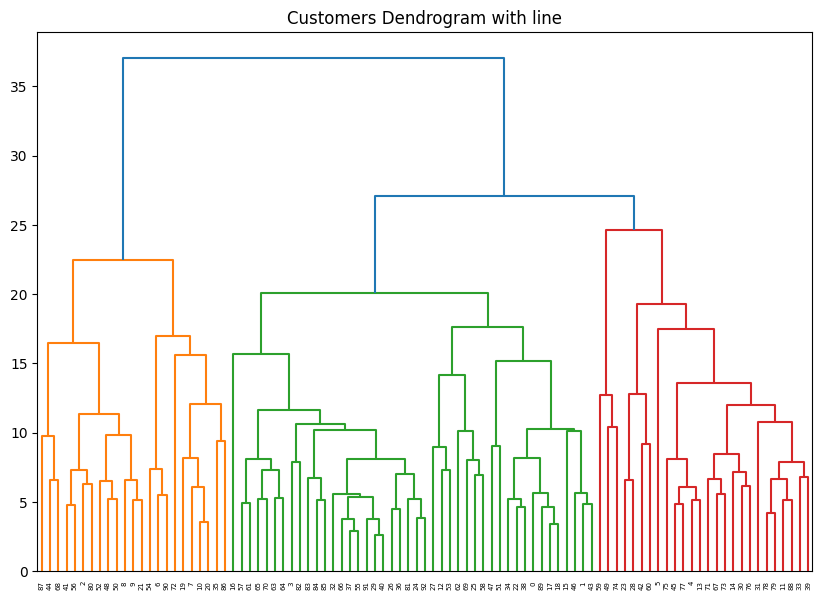

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(hierarchical_93_scaled,
            method='complete',
            metric="minkowski")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'g', linestyle = '-')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=6, affinity='minkowski', linkage='complete')
clustering_model.fit(hierarchical_93_scaled)
labels = clustering_model.labels_

print(labels)

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []

ordering = ["1", "2", "3", "4", "5", "6", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28",
            "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55",
            "56", "57", "58", "59", "60", "61", "62", "63", "64", "65", "67", "68", "69", "70", "71", "72", "73", "74", "75", "76", "78", "79", "80", "81", "82", "83",
            "85", "86", "88", "90", "91", "92", "94", "95", "99", "100", "101", "102", "103", "104", "105"]

for i in range(93):

  print("Patient", ordering[i], "label is:", labels[i])

  if labels[i] == 0:
    cluster0.append(ordering[i])
  if labels[i] == 1:
    cluster1.append(ordering[i])
  if labels[i] == 2:
    cluster2.append(ordering[i])
  if labels[i] == 3:
    cluster3.append(ordering[i])
  if labels[i] == 4:
    cluster4.append(ordering[i])
  if labels[i] == 5:
    cluster5.append(ordering[i])


print("Patients in cluster 0 are:", cluster0)
print("Patients in cluster 1 are:", cluster1)
print("Patients in cluster 2 are:", cluster2)
print("Patients in cluster 3 are:", cluster3)
print("Patients in cluster 4 are:", cluster4)
print("Patients in cluster 5 are:", cluster5)


master_sheet = pd.read_csv("Research_Master_Sheet_93.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

index0 = 0
stroke0 = 0
hypertension0 = 0
anticoagulants0 = 0
surgery0 = 0
myocardial0 = 0
nan0 = 0
###############
index1 = 0
stroke1 = 0
hypertension1 = 0
anticoagulants1 = 0
surgery1 = 0
myocardial1 = 0
nan1 = 0
#################
index2 = 0
stroke2 = 0
hypertension2 = 0
anticoagulants2 = 0
surgery2 = 0
myocardial2 = 0
nan2 = 0
##################
index3 = 0
stroke3 = 0
hypertension3 = 0
anticoagulants3 = 0
surgery3 = 0
myocardial3 = 0
nan3 = 0
#################
index4 = 0
stroke4 = 0
hypertension4 = 0
anticoagulants4 = 0
surgery4 = 0
myocardial4 = 0
nan4 = 0
################
index5 = 0
stroke5 = 0
hypertension5 = 0
anticoagulants5 = 0
surgery5 = 0
myocardial5 = 0
nan5 = 0

for i in range(len(cluster0)):
  for j in range(len(ordering)):
    if cluster0[i] == ordering[j]:
      index0 = j
  if master_sheet_frame.iloc[index0][7] == "Y":
    stroke0 = stroke0 + 1
  if master_sheet_frame.iloc[index0][9] == "Y":
    hypertension0 = hypertension0 + 1
  if master_sheet_frame.iloc[index0][10] == "Y":
    anticoagulants0 = anticoagulants0 + 1
  if master_sheet_frame.iloc[index0][12] == "Y":
    surgery0 = surgery0 + 1
  if master_sheet_frame.iloc[index0][13] == "Y":
    myocardial0 = myocardial0 + 1
  if master_sheet_frame.iloc[index0][7] != "Y" and master_sheet_frame.iloc[index0][7] != "N":
    nan0 = nan0 + 1

print("Number of strokes in cluster 0:", stroke0)
print("Percentage of stroke in cluster 0 is:", stroke0/(len(cluster0) - nan0))
print("Number of hypertension in cluster 0:", hypertension0)
print("Percentage of hypertension in cluster 0 is:", hypertension0/(len(cluster0) - nan0))
print("Number of anticoagulants in cluster 0:", anticoagulants0)
print("Percentage of anticoagulants in cluster 0 is:", anticoagulants0/(len(cluster0) - nan0))
print("Number of surgeries in cluster 0:", surgery0)
print("Percentage of surgeries in cluster 0 is:", surgery0/(len(cluster0) - nan0))
print("Number of myocardial in cluster 0:", myocardial0)
print("Percentage of myocardial in cluster 0 is:", myocardial0/(len(cluster0) - nan0))


###################################################

for i in range(len(cluster1)):
  for j in range(len(ordering)):
    if cluster1[i] == ordering[j]:
      index1 = j
  if master_sheet_frame.iloc[index1][7] == "Y":
    stroke1 = stroke1 + 1
  if master_sheet_frame.iloc[index1][9] == "Y":
    hypertension1 = hypertension1 + 1
  if master_sheet_frame.iloc[index1][10] == "Y":
    anticoagulants1 = anticoagulants1 + 1
  if master_sheet_frame.iloc[index1][12] == "Y":
    surgery1 = surgery1 + 1
  if master_sheet_frame.iloc[index1][13] == "Y":
    myocardial1 = myocardial1 + 1
  if master_sheet_frame.iloc[index1][7] != "Y" and master_sheet_frame.iloc[index1][7] != "N":
    nan1 = nan1 + 1



print("Number of strokes in cluster 1:", stroke1)
print("Percentage of stroke in cluster 1 is:", stroke1/(len(cluster1) - nan1))
print("Number of hypertension in cluster 1:", hypertension1)
print("Percentage of hypertension in cluster 1 is:", hypertension1/(len(cluster1) - nan1))
print("Number of anticoagulants in cluster 1:", anticoagulants1)
print("Percentage of anticoagulants in cluster 1 is:", anticoagulants1/(len(cluster1) - nan1))
print("Number of surgeries in cluster 1:", surgery1)
print("Percentage of surgeries in cluster 1 is:", surgery1/(len(cluster1) - nan1))
print("Number of myocardial in cluster 1:", myocardial1)
print("Percentage of myocardial in cluster 1 is:", myocardial1/(len(cluster1) - nan1))

##################################################

for i in range(len(cluster2)):
  for j in range(len(ordering)):
    if cluster2[i] == ordering[j]:
      index2 = j
  if master_sheet_frame.iloc[index2][7] == "Y":
    stroke2 = stroke2 + 1
  if master_sheet_frame.iloc[index2][9] == "Y":
    hypertension2 = hypertension2 + 1
  if master_sheet_frame.iloc[index2][10] == "Y":
    anticoagulants2 = anticoagulants2 + 1
  if master_sheet_frame.iloc[index2][12] == "Y":
    surgery2 = surgery2 + 1
  if master_sheet_frame.iloc[index2][13] == "Y":
    myocardial2 = myocardial2 + 1
  if master_sheet_frame.iloc[index2][7] != "Y" and master_sheet_frame.iloc[index2][7] != "N":
    nan2 = nan2 + 1

print("Number of strokes in cluster 2:", stroke2)
print("Percentage of stroke in cluster 2 is:", stroke2/(len(cluster2) - nan2))
print("Number of hypertension in cluster 2:", hypertension2)
print("Percentage of hypertension in cluster 2 is:", hypertension2/(len(cluster2) - nan2))
print("Number of anticoagulants in cluster 2:", anticoagulants2)
print("Percentage of anticoagulants in cluster 2 is:", anticoagulants2/(len(cluster2) - nan2))
print("Number of surgeries in cluster 2:", surgery2)
print("Percentage of surgeries in cluster 2 is:", surgery2/(len(cluster2) - nan2))
print("Number of myocardial in cluster 2:", myocardial2)
print("Percentage of myocardial in cluster 2 is:", myocardial2/(len(cluster2) - nan2))

####################################################

for i in range(len(cluster3)):
  for j in range(len(ordering)):
    if cluster3[i] == ordering[j]:
      index3 = j
  if master_sheet_frame.iloc[index3][7] == "Y":
    stroke3 = stroke3 + 1
  if master_sheet_frame.iloc[index3][9] == "Y":
    hypertension3 = hypertension3 + 1
  if master_sheet_frame.iloc[index3][10] == "Y":
    anticoagulants3 = anticoagulants3 + 1
  if master_sheet_frame.iloc[index3][12] == "Y":
    surgery3 = surgery3 + 1
  if master_sheet_frame.iloc[index3][13] == "Y":
    myocardial3 = myocardial3 + 1
  if master_sheet_frame.iloc[index3][7] != "Y" and master_sheet_frame.iloc[index3][7] != "N":
    nan3 = nan3 + 1


print("Number of strokes in cluster 3:", stroke3)
print("Percentage of stroke in cluster 3 is:", stroke3/(len(cluster3) - nan3))
print("Number of hypertension in cluster 3:", hypertension3)
print("Percentage of hypertension in cluster 3 is:", hypertension3/(len(cluster3) - nan3))
print("Number of anticoagulants in cluster 3:", anticoagulants3)
print("Percentage of anticoagulants in cluster 3 is:", anticoagulants3/(len(cluster3) - nan3))
print("Number of surgeries in cluster 3:", surgery3)
print("Percentage of surgeries in cluster 3 is:", surgery3/(len(cluster3) - nan3))
print("Number of myocardial in cluster 3:", myocardial3)
print("Percentage of myocardial in cluster 3 is:", myocardial3/(len(cluster3) - nan3))

#####################################################

for i in range(len(cluster4)):
  for j in range(len(ordering)):
    if cluster4[i] == ordering[j]:
      index4 = j
  if master_sheet_frame.iloc[index4][7] == "Y":
    stroke4 = stroke4 + 1
  if master_sheet_frame.iloc[index4][9] == "Y":
    hypertension4 = hypertension4 + 1
  if master_sheet_frame.iloc[index4][10] == "Y":
    anticoagulants4 = anticoagulants4 + 1
  if master_sheet_frame.iloc[index4][12] == "Y":
    surgery4 = surgery4 + 1
  if master_sheet_frame.iloc[index4][13] == "Y":
    myocardial4 = myocardial4 + 1
  if master_sheet_frame.iloc[index4][7] != "Y" and master_sheet_frame.iloc[index4][7] != "N":
    nan4 = nan4 + 1

print("Number of strokes in cluster 4:", stroke4)
print("Percentage of stroke in cluster 4 is:", stroke4/(len(cluster4) - nan4))
print("Number of hypertension in cluster 4:", hypertension4)
print("Percentage of hypertension in cluster 4 is:", hypertension4/(len(cluster4) - nan4))
print("Number of anticoagulants in cluster 4:", anticoagulants4)
print("Percentage of anticoagulants in cluster 4 is:", anticoagulants4/(len(cluster4) - nan4))
print("Number of surgeries in cluster 4:", surgery4)
print("Percentage of surgeries in cluster 4 is:", surgery4/(len(cluster4) - nan4))
print("Number of myocardial in cluster 4:", myocardial4)
print("Percentage of myocardial in cluster 4 is:", myocardial4/(len(cluster4) - nan4))

##################################################

for i in range(len(cluster5)):
  for j in range(len(ordering)):
    if cluster5[i] == ordering[j]:
      index5 = j
  if master_sheet_frame.iloc[index5][7] == "Y":
    stroke5 = stroke5 + 1
  if master_sheet_frame.iloc[index5][9] == "Y":
    hypertension5 = hypertension5 + 1
  if master_sheet_frame.iloc[index5][10] == "Y":
    anticoagulants5 = anticoagulants5 + 1
  if master_sheet_frame.iloc[index5][12] == "Y":
    surgery5 = surgery5 + 1
  if master_sheet_frame.iloc[index5][13] == "Y":
    myocardial5 = myocardial5 + 1
  if master_sheet_frame.iloc[index5][7] != "Y" and master_sheet_frame.iloc[index5][7] != "N":
    nan5 = nan5 + 1

print("Number of strokes in cluster 5:", stroke5)
print("Percentage of stroke in cluster 5 is:", stroke5/(len(cluster5) - nan5))
print("Number of hypertension in cluster 5:", hypertension5)
print("Percentage of hypertension in cluster 5 is:", hypertension5/(len(cluster5) - nan5))
print("Number of anticoagulants in cluster 5:", anticoagulants5)
print("Percentage of anticoagulants in cluster 5 is:", anticoagulants5/(len(cluster5) - nan5))
print("Number of surgeries in cluster 5:", surgery5)
print("Percentage of surgeries in cluster 5 is:", surgery5/(len(cluster5) - nan5))
print("Number of myocardial in cluster 5:", myocardial5)
print("Percentage of myocardial in cluster 5 is:", myocardial5/(len(cluster5) - nan5))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 1 4 5 0 0 2 2 4 4 2 0 1 0 0 1 5 1 1 2 2 4 1 0 5 1 5 1 0 5 0 0 5 0 1 2 5
 5 1 0 5 4 0 1 4 0 1 1 4 3 4 1 4 1 2 5 4 5 1 3 0 5 1 5 5 5 5 0 4 1 5 0 2 0
 3 0 0 0 0 0 4 5 5 5 5 5 2 4 0 1 2 5 5]
Patient 1 label is: 1
Patient 2 label is: 1
Patient 3 label is: 4
Patient 4 label is: 5
Patient 5 label is: 0
Patient 6 label is: 0
Patient 9 label is: 2
Patient 10 label is: 2
Patient 11 label is: 4
Patient 12 label is: 4
Patient 13 label is: 2
Patient 14 label is: 0
Patient 15 label is: 1
Patient 16 label is: 0
Patient 17 label is: 0
Patient 18 label is: 1
Patient 19 label is: 5
Patient 20 label is: 1
Patient 21 label is: 1
Patient 22 label is: 2
Patient 23 label is: 2
Patient 24 label is: 4
Patient 25 label is: 1
Patient 26 label is: 0
Patient 27 label is: 5
Patient 28 label is: 1
Patient 29 label is: 5
Patient 30 label is: 1
Patient 31 label is: 0
Patient 32 label is: 5
Patient 33 label is: 0
Patient 34 label is: 0
Patient 35 label is: 5
Patient 36 label is: 0
Patient 37 label is: 1
Patient 38 l

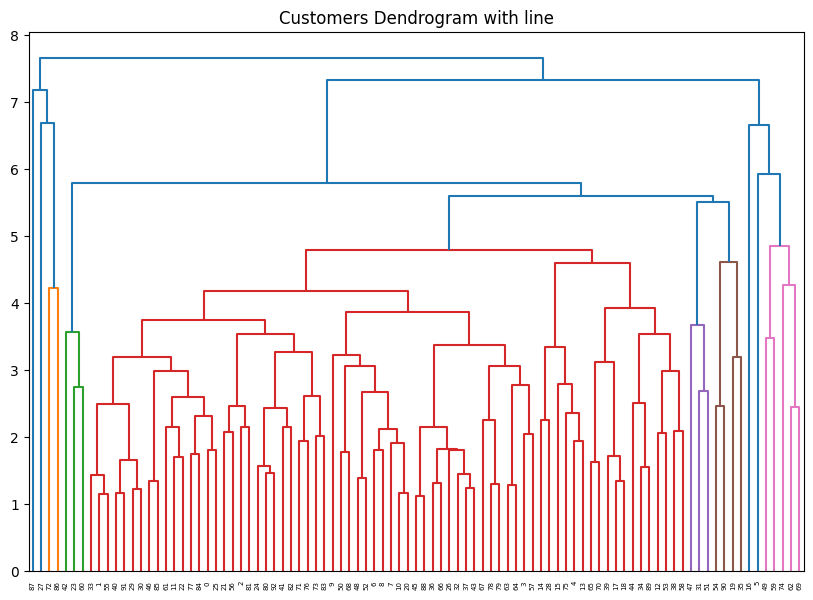

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(hierarchical_93_scaled,
            method='complete',
            metric="chebyshev")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'g', linestyle = '-')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=10, affinity='chebyshev', linkage='complete')
clustering_model.fit(hierarchical_93_scaled)
labels = clustering_model.labels_

print(labels)

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []


ordering = ["1", "2", "3", "4", "5", "6", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28",
            "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55",
            "56", "57", "58", "59", "60", "61", "62", "63", "64", "65", "67", "68", "69", "70", "71", "72", "73", "74", "75", "76", "78", "79", "80", "81", "82", "83",
            "85", "86", "88", "90", "91", "92", "94", "95", "99", "100", "101", "102", "103", "104", "105"]

for i in range(93):

  print("Patient", ordering[i], "label is:", labels[i])

  if labels[i] == 0:
    cluster0.append(ordering[i])
  if labels[i] == 1:
    cluster1.append(ordering[i])
  if labels[i] == 2:
    cluster2.append(ordering[i])
  if labels[i] == 3:
    cluster3.append(ordering[i])
  if labels[i] == 4:
    cluster4.append(ordering[i])
  if labels[i] == 5:
    cluster5.append(ordering[i])
  if labels[i] == 6:
    cluster6.append(ordering[i])
  if labels[i] == 7:
    cluster7.append(ordering[i])
  if labels[i] == 8:
    cluster8.append(ordering[i])
  if labels[i] == 9:
    cluster9.append(ordering[i])


print("Patients in cluster 0 are:", cluster0)
print("Patients in cluster 1 are:", cluster1)
print("Patients in cluster 2 are:", cluster2)
print("Patients in cluster 3 are:", cluster3)
print("Patients in cluster 4 are:", cluster4)
print("Patients in cluster 5 are:", cluster5)
print("Patients in cluster 6 are:", cluster6)
print("Patients in cluster 7 are:", cluster7)
print("Patients in cluster 8 are:", cluster8)
print("Patients in cluster 9 are:", cluster9)

master_sheet = pd.read_csv("Research_Master_Sheet_93.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

index0 = 0
stroke0 = 0
hypertension0 = 0
anticoagulants0 = 0
surgery0 = 0
myocardial0 = 0
nan0 = 0
###############
index1 = 0
stroke1 = 0
hypertension1 = 0
anticoagulants1 = 0
surgery1 = 0
myocardial1 = 0
nan1 = 0
#################
index2 = 0
stroke2 = 0
hypertension2 = 0
anticoagulants2 = 0
surgery2 = 0
myocardial2 = 0
nan2 = 0
##################
index3 = 0
stroke3 = 0
hypertension3 = 0
anticoagulants3 = 0
surgery3 = 0
myocardial3 = 0
nan3 = 0
#################
index4 = 0
stroke4 = 0
hypertension4 = 0
anticoagulants4 = 0
surgery4 = 0
myocardial4 = 0
nan4 = 0
################
index5 = 0
stroke5 = 0
hypertension5 = 0
anticoagulants5 = 0
surgery5 = 0
myocardial5 = 0
nan5 = 0
################
index6 = 0
stroke6 = 0
hypertension6 = 0
anticoagulants6 = 0
surgery6 = 0
myocardial6 = 0
nan6 = 0
################
index7 = 0
stroke7 = 0
hypertension7 = 0
anticoagulants7 = 0
surgery7 = 0
myocardial7 = 0
nan7 = 0
###############
index8 = 0
stroke8 = 0
hypertension8 = 0
anticoagulants8 = 0
surgery8 = 0
myocardial8 = 0
nan8 = 0
###############
index9 = 0
stroke9 = 0
hypertension9 = 0
anticoagulants9 = 0
surgery9 = 0
myocardial9 = 0
nan9 = 0

for i in range(len(cluster0)):
  for j in range(len(ordering)):
    if cluster0[i] == ordering[j]:
      index0 = j
  if master_sheet_frame.iloc[index0][7] == "Y":
    stroke0 = stroke0 + 1
  if master_sheet_frame.iloc[index0][9] == "Y":
    hypertension0 = hypertension0 + 1
  if master_sheet_frame.iloc[index0][10] == "Y":
    anticoagulants0 = anticoagulants0 + 1
  if master_sheet_frame.iloc[index0][12] == "Y":
    surgery0 = surgery0 + 1
  if master_sheet_frame.iloc[index0][13] == "Y":
    myocardial0 = myocardial0 + 1
  if master_sheet_frame.iloc[index0][7] != "Y" and master_sheet_frame.iloc[index0][7] != "N":
    nan0 = nan0 + 1

print("Number of strokes in cluster 0:", stroke0)
print("Percentage of stroke in cluster 0 is:", stroke0/(len(cluster0) - nan0))
print("Number of hypertension in cluster 0:", hypertension0)
print("Percentage of hypertension in cluster 0 is:", hypertension0/(len(cluster0) - nan0))
print("Number of anticoagulants in cluster 0:", anticoagulants0)
print("Percentage of anticoagulants in cluster 0 is:", anticoagulants0/(len(cluster0) - nan0))
print("Number of surgeries in cluster 0:", surgery0)
print("Percentage of surgeries in cluster 0 is:", surgery0/(len(cluster0) - nan0))
print("Number of myocardial in cluster 0:", myocardial0)
print("Percentage of myocardial in cluster 0 is:", myocardial0/(len(cluster0) - nan0))


###################################################

for i in range(len(cluster1)):
  for j in range(len(ordering)):
    if cluster1[i] == ordering[j]:
      index1 = j
  if master_sheet_frame.iloc[index1][7] == "Y":
    stroke1 = stroke1 + 1
  if master_sheet_frame.iloc[index1][9] == "Y":
    hypertension1 = hypertension1 + 1
  if master_sheet_frame.iloc[index1][10] == "Y":
    anticoagulants1 = anticoagulants1 + 1
  if master_sheet_frame.iloc[index1][12] == "Y":
    surgery1 = surgery1 + 1
  if master_sheet_frame.iloc[index1][13] == "Y":
    myocardial1 = myocardial1 + 1
  if master_sheet_frame.iloc[index1][7] != "Y" and master_sheet_frame.iloc[index1][7] != "N":
    nan1 = nan1 + 1



print("Number of strokes in cluster 1:", stroke1)
print("Percentage of stroke in cluster 1 is:", stroke1/(len(cluster1) - nan1))
print("Number of hypertension in cluster 1:", hypertension1)
print("Percentage of hypertension in cluster 1 is:", hypertension1/(len(cluster1) - nan1))
print("Number of anticoagulants in cluster 1:", anticoagulants1)
print("Percentage of anticoagulants in cluster 1 is:", anticoagulants1/(len(cluster1) - nan1))
print("Number of surgeries in cluster 1:", surgery1)
print("Percentage of surgeries in cluster 1 is:", surgery1/(len(cluster1) - nan1))
print("Number of myocardial in cluster 1:", myocardial1)
print("Percentage of myocardial in cluster 1 is:", myocardial1/(len(cluster1) - nan1))

##################################################

for i in range(len(cluster2)):
  for j in range(len(ordering)):
    if cluster2[i] == ordering[j]:
      index2 = j
  if master_sheet_frame.iloc[index2][7] == "Y":
    stroke2 = stroke2 + 1
  if master_sheet_frame.iloc[index2][9] == "Y":
    hypertension2 = hypertension2 + 1
  if master_sheet_frame.iloc[index2][10] == "Y":
    anticoagulants2 = anticoagulants2 + 1
  if master_sheet_frame.iloc[index2][12] == "Y":
    surgery2 = surgery2 + 1
  if master_sheet_frame.iloc[index2][13] == "Y":
    myocardial2 = myocardial2 + 1
  if master_sheet_frame.iloc[index2][7] != "Y" and master_sheet_frame.iloc[index2][7] != "N":
    nan2 = nan2 + 1

print("Number of strokes in cluster 2:", stroke2)
print("Percentage of stroke in cluster 2 is:", stroke2/(len(cluster2) - nan2))
print("Number of hypertension in cluster 2:", hypertension2)
print("Percentage of hypertension in cluster 2 is:", hypertension2/(len(cluster2) - nan2))
print("Number of anticoagulants in cluster 2:", anticoagulants2)
print("Percentage of anticoagulants in cluster 2 is:", anticoagulants2/(len(cluster2) - nan2))
print("Number of surgeries in cluster 2:", surgery2)
print("Percentage of surgeries in cluster 2 is:", surgery2/(len(cluster2) - nan2))
print("Number of myocardial in cluster 2:", myocardial2)
print("Percentage of myocardial in cluster 2 is:", myocardial2/(len(cluster2) - nan2))

####################################################

for i in range(len(cluster3)):
  for j in range(len(ordering)):
    if cluster3[i] == ordering[j]:
      index3 = j
  if master_sheet_frame.iloc[index3][7] == "Y":
    stroke3 = stroke3 + 1
  if master_sheet_frame.iloc[index3][9] == "Y":
    hypertension3 = hypertension3 + 1
  if master_sheet_frame.iloc[index3][10] == "Y":
    anticoagulants3 = anticoagulants3 + 1
  if master_sheet_frame.iloc[index3][12] == "Y":
    surgery3 = surgery3 + 1
  if master_sheet_frame.iloc[index3][13] == "Y":
    myocardial3 = myocardial3 + 1
  if master_sheet_frame.iloc[index3][7] != "Y" and master_sheet_frame.iloc[index3][7] != "N":
    nan3 = nan3 + 1


print("Number of strokes in cluster 3:", stroke3)
print("Percentage of stroke in cluster 3 is:", stroke3/(len(cluster3) - nan3))
print("Number of hypertension in cluster 3:", hypertension3)
print("Percentage of hypertension in cluster 3 is:", hypertension3/(len(cluster3) - nan3))
print("Number of anticoagulants in cluster 3:", anticoagulants3)
print("Percentage of anticoagulants in cluster 3 is:", anticoagulants3/(len(cluster3) - nan3))
print("Number of surgeries in cluster 3:", surgery3)
print("Percentage of surgeries in cluster 3 is:", surgery3/(len(cluster3) - nan3))
print("Number of myocardial in cluster 3:", myocardial3)
print("Percentage of myocardial in cluster 3 is:", myocardial3/(len(cluster3) - nan3))

#####################################################

for i in range(len(cluster4)):
  for j in range(len(ordering)):
    if cluster4[i] == ordering[j]:
      index4 = j
  if master_sheet_frame.iloc[index4][7] == "Y":
    stroke4 = stroke4 + 1
  if master_sheet_frame.iloc[index4][9] == "Y":
    hypertension4 = hypertension4 + 1
  if master_sheet_frame.iloc[index4][10] == "Y":
    anticoagulants4 = anticoagulants4 + 1
  if master_sheet_frame.iloc[index4][12] == "Y":
    surgery4 = surgery4 + 1
  if master_sheet_frame.iloc[index4][13] == "Y":
    myocardial4 = myocardial4 + 1
  if master_sheet_frame.iloc[index4][7] != "Y" and master_sheet_frame.iloc[index4][7] != "N":
    nan4 = nan4 + 1

print("Number of strokes in cluster 4:", stroke4)
print("Percentage of stroke in cluster 4 is:", stroke4/(len(cluster4) - nan4))
print("Number of hypertension in cluster 4:", hypertension4)
print("Percentage of hypertension in cluster 4 is:", hypertension4/(len(cluster4) - nan4))
print("Number of anticoagulants in cluster 4:", anticoagulants4)
print("Percentage of anticoagulants in cluster 4 is:", anticoagulants4/(len(cluster4) - nan4))
print("Number of surgeries in cluster 4:", surgery4)
print("Percentage of surgeries in cluster 4 is:", surgery4/(len(cluster4) - nan4))
print("Number of myocardial in cluster 4:", myocardial4)
print("Percentage of myocardial in cluster 4 is:", myocardial4/(len(cluster4) - nan4))

##################################################

for i in range(len(cluster5)):
  for j in range(len(ordering)):
    if cluster5[i] == ordering[j]:
      index5 = j
  if master_sheet_frame.iloc[index5][7] == "Y":
    stroke5 = stroke5 + 1
  if master_sheet_frame.iloc[index5][9] == "Y":
    hypertension5 = hypertension5 + 1
  if master_sheet_frame.iloc[index5][10] == "Y":
    anticoagulants5 = anticoagulants5 + 1
  if master_sheet_frame.iloc[index5][12] == "Y":
    surgery5 = surgery5 + 1
  if master_sheet_frame.iloc[index5][13] == "Y":
    myocardial5 = myocardial5 + 1
  if master_sheet_frame.iloc[index5][7] != "Y" and master_sheet_frame.iloc[index5][7] != "N":
    nan5 = nan5 + 1

print("Number of strokes in cluster 5:", stroke5)
print("Percentage of stroke in cluster 5 is:", stroke5/(len(cluster5) - nan5))
print("Number of hypertension in cluster 5:", hypertension5)
print("Percentage of hypertension in cluster 5 is:", hypertension5/(len(cluster5) - nan5))
print("Number of anticoagulants in cluster 5:", anticoagulants5)
print("Percentage of anticoagulants in cluster 5 is:", anticoagulants5/(len(cluster5) - nan5))
print("Number of surgeries in cluster 5:", surgery5)
print("Percentage of surgeries in cluster 5 is:", surgery5/(len(cluster5) - nan5))
print("Number of myocardial in cluster 5:", myocardial5)
print("Percentage of myocardial in cluster 5 is:", myocardial5/(len(cluster5) - nan5))

###################################################

for i in range(len(cluster6)):
  for j in range(len(ordering)):
    if cluster6[i] == ordering[j]:
      index6 = j
  if master_sheet_frame.iloc[index6][7] == "Y":
    stroke6 = stroke6 + 1
  if master_sheet_frame.iloc[index6][9] == "Y":
    hypertension6 = hypertension6 + 1
  if master_sheet_frame.iloc[index6][10] == "Y":
    anticoagulants6 = anticoagulants6 + 1
  if master_sheet_frame.iloc[index6][12] == "Y":
    surgery6 = surgery6 + 1
  if master_sheet_frame.iloc[index6][13] == "Y":
    myocardial6 = myocardial6 + 1
  if master_sheet_frame.iloc[index6][7] != "Y" and master_sheet_frame.iloc[index6][7] != "N":
    nan6 = nan6 + 1

print("Number of strokes in cluster 6:", stroke6)
print("Percentage of stroke in cluster 6 is:", stroke6/(len(cluster6) - nan6))
print("Number of hypertension in cluster 6:", hypertension6)
print("Percentage of hypertension in cluster 6 is:", hypertension6/(len(cluster6) - nan6))
print("Number of anticoagulants in cluster 6:", anticoagulants6)
print("Percentage of anticoagulants in cluster 6 is:", anticoagulants6/(len(cluster6) - nan6))
print("Number of surgeries in cluster 6:", surgery6)
print("Percentage of surgeries in cluster 6 is:", surgery6/(len(cluster6) - nan6))
print("Number of myocardial in cluster 6:", myocardial6)
print("Percentage of myocardial in cluster 6 is:", myocardial6/(len(cluster6) - nan6))

##################################################

for i in range(len(cluster7)):
  for j in range(len(ordering)):
    if cluster7[i] == ordering[j]:
      index7 = j
  if master_sheet_frame.iloc[index7][7] == "Y":
    stroke7 = stroke7 + 1
  if master_sheet_frame.iloc[index7][9] == "Y":
    hypertension7 = hypertension7 + 1
  if master_sheet_frame.iloc[index7][10] == "Y":
    anticoagulants7 = anticoagulants7 + 1
  if master_sheet_frame.iloc[index7][12] == "Y":
    surgery7 = surgery7 + 1
  if master_sheet_frame.iloc[index7][13] == "Y":
    myocardial7 = myocardial7 + 1
  if master_sheet_frame.iloc[index7][7] != "Y" and master_sheet_frame.iloc[index7][7] != "N":
    nan7 = nan7 + 1

print("Number of strokes in cluster 7:", stroke7)
print("Percentage of stroke in cluster 7 is:", stroke7/(len(cluster7) - nan7))
print("Number of hypertension in cluster 7:", hypertension7)
print("Percentage of hypertension in cluster 7 is:", hypertension7/(len(cluster7) - nan7))
print("Number of anticoagulants in cluster 7:", anticoagulants7)
print("Percentage of anticoagulants in cluster 7 is:", anticoagulants7/(len(cluster7) - nan7))
print("Number of surgeries in cluster 7:", surgery7)
print("Percentage of surgeries in cluster 7 is:", surgery7/(len(cluster7) - nan7))
print("Number of myocardial in cluster 7:", myocardial7)
print("Percentage of myocardial in cluster 7 is:", myocardial7/(len(cluster7) - nan7))

################################################

for i in range(len(cluster8)):
  for j in range(len(ordering)):
    if cluster8[i] == ordering[j]:
      index8 = j
  if master_sheet_frame.iloc[index8][7] == "Y":
    stroke8 = stroke8 + 1
  if master_sheet_frame.iloc[index8][9] == "Y":
    hypertension8 = hypertension8 + 1
  if master_sheet_frame.iloc[index8][10] == "Y":
    anticoagulants8 = anticoagulants8 + 1
  if master_sheet_frame.iloc[index8][12] == "Y":
    surgery8 = surgery8 + 1
  if master_sheet_frame.iloc[index8][13] == "Y":
    myocardial8 = myocardial8 + 1
  if master_sheet_frame.iloc[index8][7] != "Y" and master_sheet_frame.iloc[index8][7] != "N":
    nan8 = nan8 + 1

print("Number of strokes in cluster 8:", stroke8)
print("Percentage of stroke in cluster 8 is:", stroke8/(len(cluster8) - nan8))
print("Number of hypertension in cluster 8:", hypertension8)
print("Percentage of hypertension in cluster 8 is:", hypertension8/(len(cluster8) - nan8))
print("Number of anticoagulants in cluster 8:", anticoagulants8)
print("Percentage of anticoagulants in cluster 8 is:", anticoagulants8/(len(cluster8) - nan8))
print("Number of surgeries in cluster 8:", surgery8)
print("Percentage of surgeries in cluster 8 is:", surgery8/(len(cluster8) - nan8))
print("Number of myocardial in cluster 8:", myocardial8)
print("Percentage of myocardial in cluster 8 is:", myocardial8/(len(cluster8) - nan8))

##########################################

for i in range(len(cluster9)):
  for j in range(len(ordering)):
    if cluster9[i] == ordering[j]:
      index9 = j
  if master_sheet_frame.iloc[index9][7] == "Y":
    stroke9 = stroke9 + 1
  if master_sheet_frame.iloc[index9][9] == "Y":
    hypertension9 = hypertension9 + 1
  if master_sheet_frame.iloc[index9][10] == "Y":
    anticoagulants9 = anticoagulants9 + 1
  if master_sheet_frame.iloc[index9][12] == "Y":
    surgery9 = surgery9 + 1
  if master_sheet_frame.iloc[index9][13] == "Y":
    myocardial9 = myocardial9 + 1
  if master_sheet_frame.iloc[index9][7] != "Y" and master_sheet_frame.iloc[index9][7] != "N":
    nan9 = nan9 + 1

print("Number of strokes in cluster 9:", stroke9)
print("Percentage of stroke in cluster 9 is:", stroke9/(len(cluster9) - nan9))
print("Number of hypertension in cluster 9:", hypertension9)
print("Percentage of hypertension in cluster 9 is:", hypertension9/(len(cluster9) - nan9))
print("Number of anticoagulants in cluster 9:", anticoagulants9)
print("Percentage of anticoagulants in cluster 9 is:", anticoagulants9/(len(cluster9) - nan9))
print("Number of surgeries in cluster 9:", surgery9)
print("Percentage of surgeries in cluster 9 is:", surgery9/(len(cluster9) - nan9))
print("Number of myocardial in cluster 9:", myocardial9)
print("Percentage of myocardial in cluster 9 is:", myocardial9/(len(cluster9) - nan9))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 1 5 1 1 2 1 1 1 8 1 1 1 9 1 1 1 4 1 1 1 2 1
 1 1 1 1 1 8 1 1 1 1 4 1 0 1 4 1 1 2 1 1 1 1 0 8 1 0 1 1 1 1 1 1 0 1 1 3 1
 0 1 1 1 1 1 1 1 1 1 1 1 3 7 1 1 2 1 1]
Patient 1 label is: 1
Patient 2 label is: 1
Patient 3 label is: 1
Patient 4 label is: 1
Patient 5 label is: 1
Patient 6 label is: 6
Patient 9 label is: 1
Patient 10 label is: 1
Patient 11 label is: 1
Patient 12 label is: 1
Patient 13 label is: 1
Patient 14 label is: 1
Patient 15 label is: 1
Patient 16 label is: 1
Patient 17 label is: 1
Patient 18 label is: 1
Patient 19 label is: 5
Patient 20 label is: 1
Patient 21 label is: 1
Patient 22 label is: 2
Patient 23 label is: 1
Patient 24 label is: 1
Patient 25 label is: 1
Patient 26 label is: 8
Patient 27 label is: 1
Patient 28 label is: 1
Patient 29 label is: 1
Patient 30 label is: 9
Patient 31 label is: 1
Patient 32 label is: 1
Patient 33 label is: 1
Patient 34 label is: 4
Patient 35 label is: 1
Patient 36 label is: 1
Patient 37 label is: 1
Patient 38 l

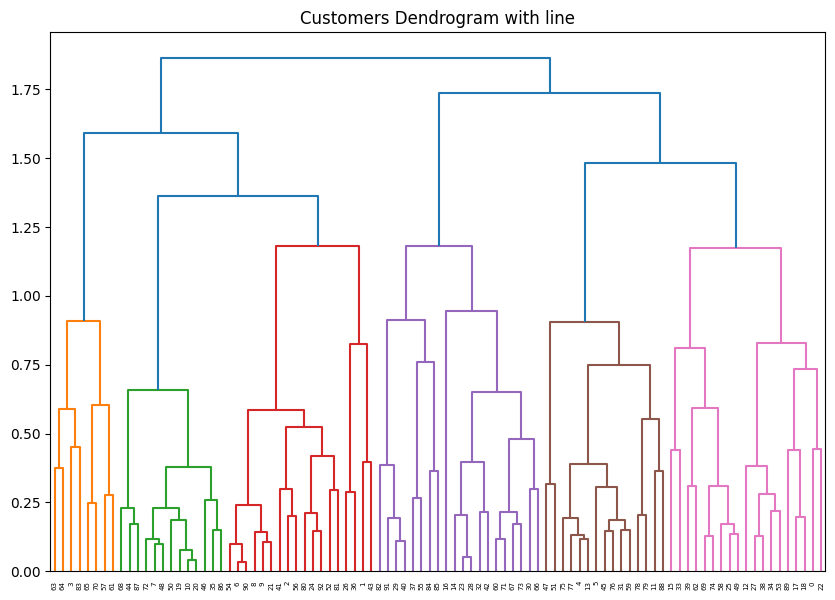

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(hierarchical_93_scaled,
            method='complete',
            metric="cosine")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'g', linestyle = '-')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='complete')
clustering_model.fit(hierarchical_93_scaled)
labels = clustering_model.labels_

print(labels)

cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []



ordering = ["1", "2", "3", "4", "5", "6", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28",
            "29", "30", "31", "32", "33", "34", "35", "36", "37", "38", "39", "40", "41", "43", "44", "45", "46", "47", "48", "49", "50", "51", "52", "53", "54", "55",
            "56", "57", "58", "59", "60", "61", "62", "63", "64", "65", "67", "68", "69", "70", "71", "72", "73", "74", "75", "76", "78", "79", "80", "81", "82", "83",
            "85", "86", "88", "90", "91", "92", "94", "95", "99", "100", "101", "102", "103", "104", "105"]

for i in range(93):

  print("Patient", ordering[i], "label is:", labels[i])

  if labels[i] == 0:
    cluster0.append(ordering[i])
  if labels[i] == 1:
    cluster1.append(ordering[i])
  if labels[i] == 2:
    cluster2.append(ordering[i])
  if labels[i] == 3:
    cluster3.append(ordering[i])
  if labels[i] == 4:
    cluster4.append(ordering[i])
  if labels[i] == 5:
    cluster5.append(ordering[i])



print("Patients in cluster 0 are:", cluster0)
print("Patients in cluster 1 are:", cluster1)
print("Patients in cluster 2 are:", cluster2)
print("Patients in cluster 3 are:", cluster3)
print("Patients in cluster 4 are:", cluster4)
print("Patients in cluster 5 are:", cluster5)

master_sheet = pd.read_csv("Research_Master_Sheet_93.csv")
master_sheet_frame = pd.DataFrame(master_sheet)

index0 = 0
stroke0 = 0
hypertension0 = 0
anticoagulants0 = 0
surgery0 = 0
myocardial0 = 0
nan0 = 0
###############
index1 = 0
stroke1 = 0
hypertension1 = 0
anticoagulants1 = 0
surgery1 = 0
myocardial1 = 0
nan1 = 0
#################
index2 = 0
stroke2 = 0
hypertension2 = 0
anticoagulants2 = 0
surgery2 = 0
myocardial2 = 0
nan2 = 0
##################
index3 = 0
stroke3 = 0
hypertension3 = 0
anticoagulants3 = 0
surgery3 = 0
myocardial3 = 0
nan3 = 0
#################
index4 = 0
stroke4 = 0
hypertension4 = 0
anticoagulants4 = 0
surgery4 = 0
myocardial4 = 0
nan4 = 0
################
index5 = 0
stroke5 = 0
hypertension5 = 0
anticoagulants5 = 0
surgery5 = 0
myocardial5 = 0
nan5 = 0

for i in range(len(cluster0)):
  for j in range(len(ordering)):
    if cluster0[i] == ordering[j]:
      index0 = j
  if master_sheet_frame.iloc[index0][7] == "Y":
    stroke0 = stroke0 + 1
  if master_sheet_frame.iloc[index0][9] == "Y":
    hypertension0 = hypertension0 + 1
  if master_sheet_frame.iloc[index0][10] == "Y":
    anticoagulants0 = anticoagulants0 + 1
  if master_sheet_frame.iloc[index0][12] == "Y":
    surgery0 = surgery0 + 1
  if master_sheet_frame.iloc[index0][13] == "Y":
    myocardial0 = myocardial0 + 1
  if master_sheet_frame.iloc[index0][7] != "Y" and master_sheet_frame.iloc[index0][7] != "N":
    nan0 = nan0 + 1

print("Number of strokes in cluster 0:", stroke0)
print("Percentage of stroke in cluster 0 is:", stroke0/(len(cluster0) - nan0))
print("Number of hypertension in cluster 0:", hypertension0)
print("Percentage of hypertension in cluster 0 is:", hypertension0/(len(cluster0) - nan0))
print("Number of anticoagulants in cluster 0:", anticoagulants0)
print("Percentage of anticoagulants in cluster 0 is:", anticoagulants0/(len(cluster0) - nan0))
print("Number of surgeries in cluster 0:", surgery0)
print("Percentage of surgeries in cluster 0 is:", surgery0/(len(cluster0) - nan0))
print("Number of myocardial in cluster 0:", myocardial0)
print("Percentage of myocardial in cluster 0 is:", myocardial0/(len(cluster0) - nan0))


###################################################

for i in range(len(cluster1)):
  for j in range(len(ordering)):
    if cluster1[i] == ordering[j]:
      index1 = j
  if master_sheet_frame.iloc[index1][7] == "Y":
    stroke1 = stroke1 + 1
  if master_sheet_frame.iloc[index1][9] == "Y":
    hypertension1 = hypertension1 + 1
  if master_sheet_frame.iloc[index1][10] == "Y":
    anticoagulants1 = anticoagulants1 + 1
  if master_sheet_frame.iloc[index1][12] == "Y":
    surgery1 = surgery1 + 1
  if master_sheet_frame.iloc[index1][13] == "Y":
    myocardial1 = myocardial1 + 1
  if master_sheet_frame.iloc[index1][7] != "Y" and master_sheet_frame.iloc[index1][7] != "N":
    nan1 = nan1 + 1



print("Number of strokes in cluster 1:", stroke1)
print("Percentage of stroke in cluster 1 is:", stroke1/(len(cluster1) - nan1))
print("Number of hypertension in cluster 1:", hypertension1)
print("Percentage of hypertension in cluster 1 is:", hypertension1/(len(cluster1) - nan1))
print("Number of anticoagulants in cluster 1:", anticoagulants1)
print("Percentage of anticoagulants in cluster 1 is:", anticoagulants1/(len(cluster1) - nan1))
print("Number of surgeries in cluster 1:", surgery1)
print("Percentage of surgeries in cluster 1 is:", surgery1/(len(cluster1) - nan1))
print("Number of myocardial in cluster 1:", myocardial1)
print("Percentage of myocardial in cluster 1 is:", myocardial1/(len(cluster1) - nan1))

##################################################

for i in range(len(cluster2)):
  for j in range(len(ordering)):
    if cluster2[i] == ordering[j]:
      index2 = j
  if master_sheet_frame.iloc[index2][7] == "Y":
    stroke2 = stroke2 + 1
  if master_sheet_frame.iloc[index2][9] == "Y":
    hypertension2 = hypertension2 + 1
  if master_sheet_frame.iloc[index2][10] == "Y":
    anticoagulants2 = anticoagulants2 + 1
  if master_sheet_frame.iloc[index2][12] == "Y":
    surgery2 = surgery2 + 1
  if master_sheet_frame.iloc[index2][13] == "Y":
    myocardial2 = myocardial2 + 1
  if master_sheet_frame.iloc[index2][7] != "Y" and master_sheet_frame.iloc[index2][7] != "N":
    nan2 = nan2 + 1

print("Number of strokes in cluster 2:", stroke2)
print("Percentage of stroke in cluster 2 is:", stroke2/(len(cluster2) - nan2))
print("Number of hypertension in cluster 2:", hypertension2)
print("Percentage of hypertension in cluster 2 is:", hypertension2/(len(cluster2) - nan2))
print("Number of anticoagulants in cluster 2:", anticoagulants2)
print("Percentage of anticoagulants in cluster 2 is:", anticoagulants2/(len(cluster2) - nan2))
print("Number of surgeries in cluster 2:", surgery2)
print("Percentage of surgeries in cluster 2 is:", surgery2/(len(cluster2) - nan2))
print("Number of myocardial in cluster 2:", myocardial2)
print("Percentage of myocardial in cluster 2 is:", myocardial2/(len(cluster2) - nan2))

####################################################

for i in range(len(cluster3)):
  for j in range(len(ordering)):
    if cluster3[i] == ordering[j]:
      index3 = j
  if master_sheet_frame.iloc[index3][7] == "Y":
    stroke3 = stroke3 + 1
  if master_sheet_frame.iloc[index3][9] == "Y":
    hypertension3 = hypertension3 + 1
  if master_sheet_frame.iloc[index3][10] == "Y":
    anticoagulants3 = anticoagulants3 + 1
  if master_sheet_frame.iloc[index3][12] == "Y":
    surgery3 = surgery3 + 1
  if master_sheet_frame.iloc[index3][13] == "Y":
    myocardial3 = myocardial3 + 1
  if master_sheet_frame.iloc[index3][7] != "Y" and master_sheet_frame.iloc[index3][7] != "N":
    nan3 = nan3 + 1


print("Number of strokes in cluster 3:", stroke3)
print("Percentage of stroke in cluster 3 is:", stroke3/(len(cluster3) - nan3))
print("Number of hypertension in cluster 3:", hypertension3)
print("Percentage of hypertension in cluster 3 is:", hypertension3/(len(cluster3) - nan3))
print("Number of anticoagulants in cluster 3:", anticoagulants3)
print("Percentage of anticoagulants in cluster 3 is:", anticoagulants3/(len(cluster3) - nan3))
print("Number of surgeries in cluster 3:", surgery3)
print("Percentage of surgeries in cluster 3 is:", surgery3/(len(cluster3) - nan3))
print("Number of myocardial in cluster 3:", myocardial3)
print("Percentage of myocardial in cluster 3 is:", myocardial3/(len(cluster3) - nan3))

#####################################################

for i in range(len(cluster4)):
  for j in range(len(ordering)):
    if cluster4[i] == ordering[j]:
      index4 = j
  if master_sheet_frame.iloc[index4][7] == "Y":
    stroke4 = stroke4 + 1
  if master_sheet_frame.iloc[index4][9] == "Y":
    hypertension4 = hypertension4 + 1
  if master_sheet_frame.iloc[index4][10] == "Y":
    anticoagulants4 = anticoagulants4 + 1
  if master_sheet_frame.iloc[index4][12] == "Y":
    surgery4 = surgery4 + 1
  if master_sheet_frame.iloc[index4][13] == "Y":
    myocardial4 = myocardial4 + 1
  if master_sheet_frame.iloc[index4][7] != "Y" and master_sheet_frame.iloc[index4][7] != "N":
    nan4 = nan4 + 1

print("Number of strokes in cluster 4:", stroke4)
print("Percentage of stroke in cluster 4 is:", stroke4/(len(cluster4) - nan4))
print("Number of hypertension in cluster 4:", hypertension4)
print("Percentage of hypertension in cluster 4 is:", hypertension4/(len(cluster4) - nan4))
print("Number of anticoagulants in cluster 4:", anticoagulants4)
print("Percentage of anticoagulants in cluster 4 is:", anticoagulants4/(len(cluster4) - nan4))
print("Number of surgeries in cluster 4:", surgery4)
print("Percentage of surgeries in cluster 4 is:", surgery4/(len(cluster4) - nan4))
print("Number of myocardial in cluster 4:", myocardial4)
print("Percentage of myocardial in cluster 4 is:", myocardial4/(len(cluster4) - nan4))

##################################################

for i in range(len(cluster5)):
  for j in range(len(ordering)):
    if cluster5[i] == ordering[j]:
      index5 = j
  if master_sheet_frame.iloc[index5][7] == "Y":
    stroke5 = stroke5 + 1
  if master_sheet_frame.iloc[index5][9] == "Y":
    hypertension5 = hypertension5 + 1
  if master_sheet_frame.iloc[index5][10] == "Y":
    anticoagulants5 = anticoagulants5 + 1
  if master_sheet_frame.iloc[index5][12] == "Y":
    surgery5 = surgery5 + 1
  if master_sheet_frame.iloc[index5][13] == "Y":
    myocardial5 = myocardial5 + 1
  if master_sheet_frame.iloc[index5][7] != "Y" and master_sheet_frame.iloc[index5][7] != "N":
    nan5 = nan5 + 1

print("Number of strokes in cluster 5:", stroke5)
print("Percentage of stroke in cluster 5 is:", stroke5/(len(cluster5) - nan5))
print("Number of hypertension in cluster 5:", hypertension5)
print("Percentage of hypertension in cluster 5 is:", hypertension5/(len(cluster5) - nan5))
print("Number of anticoagulants in cluster 5:", anticoagulants5)
print("Percentage of anticoagulants in cluster 5 is:", anticoagulants5/(len(cluster5) - nan5))
print("Number of surgeries in cluster 5:", surgery5)
print("Percentage of surgeries in cluster 5 is:", surgery5/(len(cluster5) - nan5))
print("Number of myocardial in cluster 5:", myocardial5)
print("Percentage of myocardial in cluster 5 is:", myocardial5/(len(cluster5) - nan5))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 2 2 3 4 4 2 5 2 2 5 4 1 4 0 1 0 1 1 5 5 2 1 0 2 1 2 1 0 0 0 4 0 1 1 5 2
 0 1 1 0 2 0 2 5 4 5 4 5 1 5 4 2 1 2 0 2 3 1 4 0 3 1 3 3 3 0 0 5 1 3 0 5 0
 1 4 4 4 4 4 2 2 0 3 0 0 5 5 4 1 2 0 2]
Patient 1 label is: 1
Patient 2 label is: 2
Patient 3 label is: 2
Patient 4 label is: 3
Patient 5 label is: 4
Patient 6 label is: 4
Patient 9 label is: 2
Patient 10 label is: 5
Patient 11 label is: 2
Patient 12 label is: 2
Patient 13 label is: 5
Patient 14 label is: 4
Patient 15 label is: 1
Patient 16 label is: 4
Patient 17 label is: 0
Patient 18 label is: 1
Patient 19 label is: 0
Patient 20 label is: 1
Patient 21 label is: 1
Patient 22 label is: 5
Patient 23 label is: 5
Patient 24 label is: 2
Patient 25 label is: 1
Patient 26 label is: 0
Patient 27 label is: 2
Patient 28 label is: 1
Patient 29 label is: 2
Patient 30 label is: 1
Patient 31 label is: 0
Patient 32 label is: 0
Patient 33 label is: 0
Patient 34 label is: 4
Patient 35 label is: 0
Patient 36 label is: 1
Patient 37 label is: 1
Patient 38 l

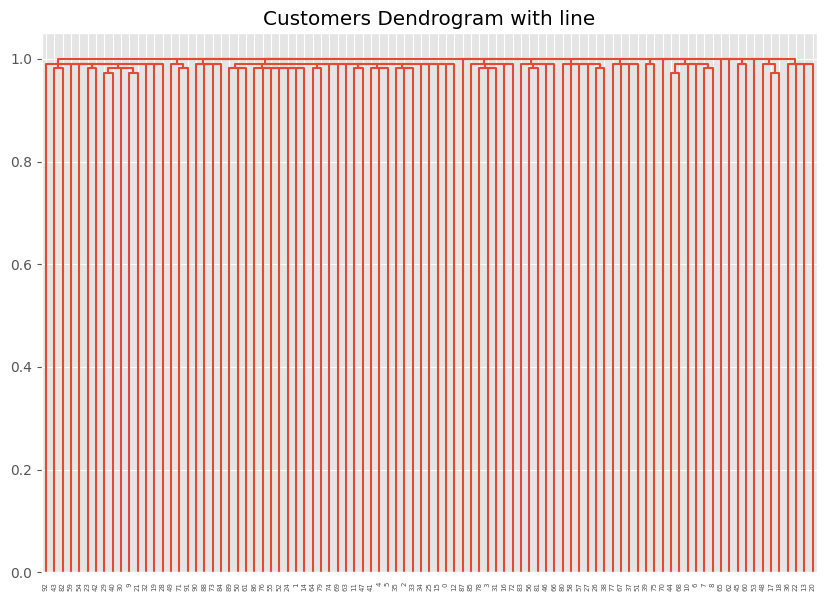

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(hierarchical_93_scaled,
            method='complete',
            metric="jaccard")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'g', linestyle = '-')

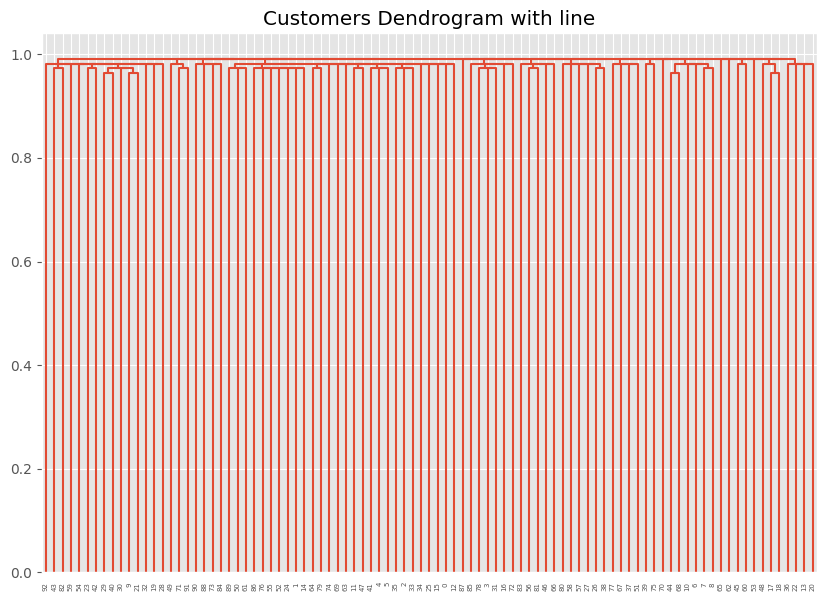

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(hierarchical_93_scaled,
            method='complete',
            metric="matching")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'g', linestyle = '-')

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

In [ ]:
pd.DataFrame(hierarchical_93_scaled).describe()

0     1             2             3             4    \
count  9.300000e+01  93.0  9.300000e+01  9.300000e+01  9.300000e+01   
mean  -2.829278e-16   0.0 -4.760230e-17  4.775153e-17  2.745713e-17   
std    1.005420e+00   0.0  1.005420e+00  1.005420e+00  1.005420e+00   
min   -2.196882e+00   0.0 -2.079261e+00 -7.996760e-01 -7.891809e-01   
25%   -6.944590e-01   0.0 -3.974212e-01 -6.743643e-01 -6.601935e-01   
50%   -2.109482e-01   0.0  5.081497e-02 -4.304115e-01 -4.022188e-01   
75%    7.309773e-01   0.0  7.493959e-01  1.103823e-01  2.427182e-01   
max    2.286123e+00   0.0  1.565400e+00  3.928815e+00  3.467403e+00   

                5             6             7             8             9    \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean  -2.650210e-16  1.432546e-17  3.772371e-16 -4.536395e-17 -1.551925e-17   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min   -1.400643e+00 -1.199991e+00 -1.123428e+00 -9.417846e-01 -8.728939e-01   
25%   -1.029366e+00 -9.419167e-01 -7.736633e-01 -8.541093e-01 -7.738297e-01   
50%    8.621199e-02 -2.341262e-01 -3.349509e-01 -4.750202e-01 -4.440984e-01   
75%    9.146784e-01  6.956205e-01  6.844601e-01  7.356556e-01  4.875322e-01   
max    1.809842e+00  2.828002e+00  2.960974e+00  2.478228e+00  2.894405e+00   

       ...           102           103           104           105  \
count  ...  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   ...  7.998381e-17 -3.581365e-17  2.900905e-16 -8.058070e-17   
std    ...  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min    ... -1.162775e+00 -1.731086e+00 -2.930092e+00 -3.014281e+00   
25%    ... -7.148603e-01 -5.295022e-01 -5.797713e-01 -5.222563e-01   
50%    ... -3.046259e-01 -1.489784e-01  2.448884e-01  9.395963e-02   
75%    ...  5.918814e-01  3.315313e-01  7.843021e-01  6.572497e-01   
max    ...  3.073100e+00  3.744912e+00  1.666602e+00  2.402333e+00   

                106           107           108           109           110  \
count  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01  9.300000e+01   
mean   3.044160e-17 -6.088320e-17 -1.122161e-16 -3.939501e-17  1.844403e-16   
std    1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00  1.005420e+00   
min   -6.064362e-01 -1.037894e+00 -8.505299e-01 -9.930358e-01 -1.506648e+00   
25%   -4.625022e-01 -6.502349e-01 -6.588661e-01 -7.085247e-01 -7.488472e-01   
50%   -3.390521e-01 -3.239608e-01 -3.723878e-01 -2.486828e-01 -2.493330e-01   
75%   -7.651536e-02  4.768828e-01  3.213914e-01  3.561284e-01  5.340615e-01   
max    6.075548e+00  5.743480e+00  4.863509e+00  5.122202e+00  4.041608e+00   

                111  
count  9.300000e+01  
mean   1.253478e-16  
std    1.005420e+00  
min   -9.874148e-01  
25%   -6.823175e-01  
50%   -3.282941e-01  
75%    2.620670e-01  
max    4.143499e+00  

[8 rows x 112 columns]

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_data_scaled_dataframe)

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.001s...
[t-SNE] Computed neighbors for 83 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 5.816125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.812012
[t-SNE] KL divergence after 1000 iterations: 0.251746


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

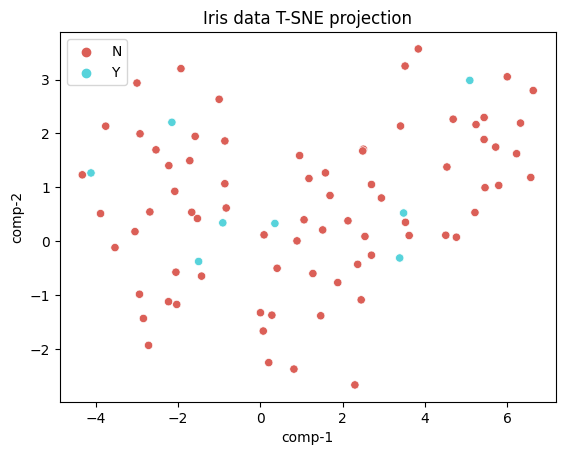

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=stroke,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

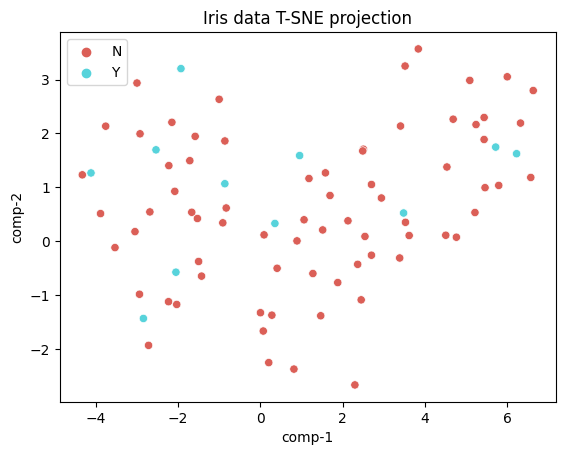

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=myocardial,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

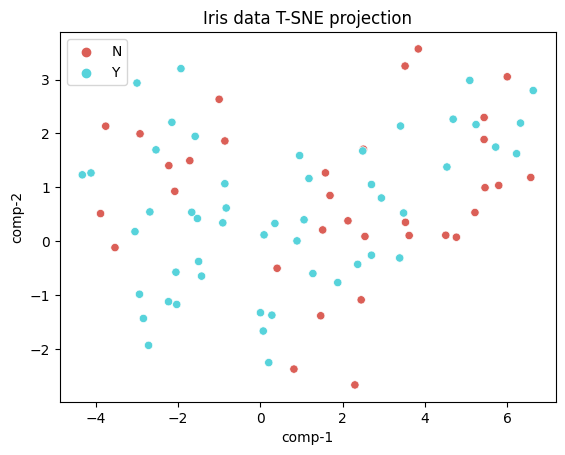

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=anticoagulant,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

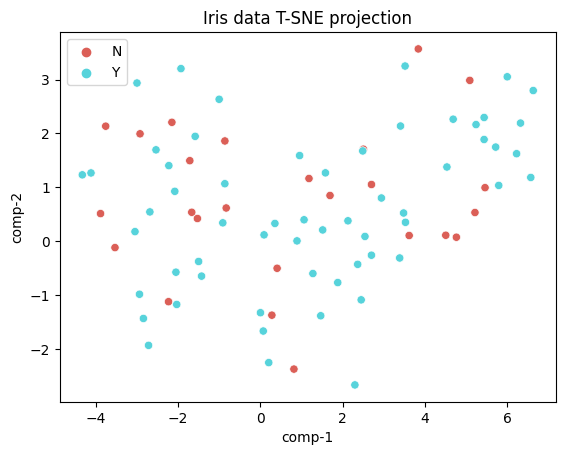

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=hypertension,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

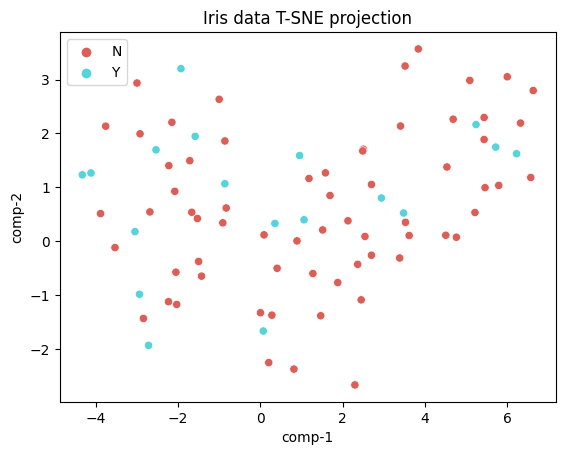

In [ ]:
df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=surgery,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection")

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.001s...
[t-SNE] Computed neighbors for 83 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 5.816125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.365402
[t-SNE] KL divergence after 1000 iterations: 1.041466


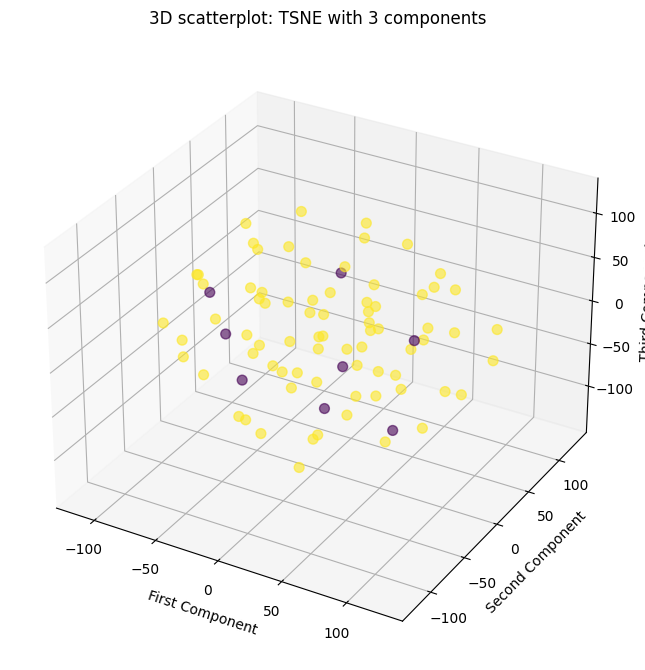

In [ ]:
from mpl_toolkits import mplot3d

tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_data_scaled_dataframe)

df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(z[:, 0], z[:, 1], z[:,2], c = stroke, s=50, alpha=0.6)

plt.title("3D scatterplot: TSNE with 3 components", pad=15)
ax.set_xlabel("First Component")
ax.set_ylabel("Second Component")
ax.set_zlabel("Third Component")
plt.savefig("3d_scatterplot.png")

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.001s...
[t-SNE] Computed neighbors for 83 samples in 0.102s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 5.816125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.365402
[t-SNE] KL divergence after 1000 iterations: 1.041466


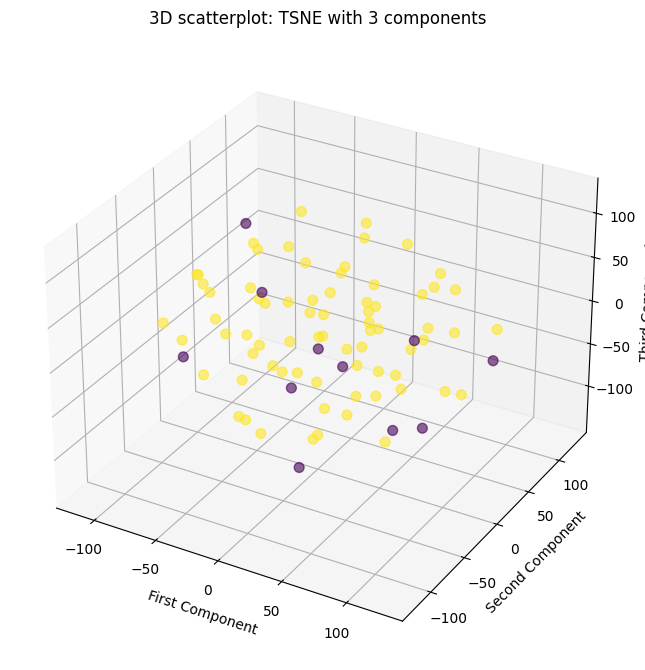

In [ ]:
from mpl_toolkits import mplot3d

tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_data_scaled_dataframe)

df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(z[:, 0], z[:, 1], z[:,2], c = myocardial, s=50, alpha=0.6)

plt.title("3D scatterplot: TSNE with 3 components", pad=15)
ax.set_xlabel("First Component")
ax.set_ylabel("Second Component")
ax.set_zlabel("Third Component")
plt.savefig("3d_scatterplot.png")

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.001s...
[t-SNE] Computed neighbors for 83 samples in 0.097s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 5.816125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.365402
[t-SNE] KL divergence after 1000 iterations: 1.041466


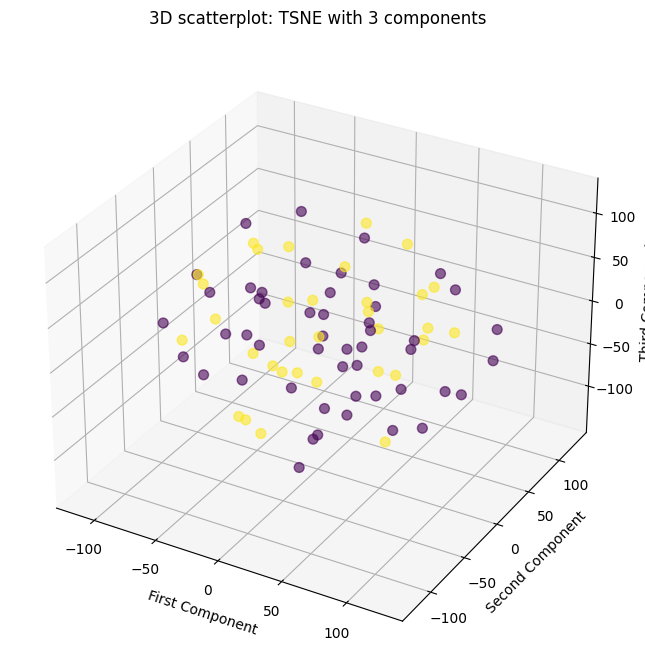

In [ ]:
from mpl_toolkits import mplot3d

tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_data_scaled_dataframe)

df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(z[:, 0], z[:, 1], z[:,2], c = anticoagulant, s=50, alpha=0.6)

plt.title("3D scatterplot: TSNE with 3 components", pad=15)
ax.set_xlabel("First Component")
ax.set_ylabel("Second Component")
ax.set_zlabel("Third Component")
plt.savefig("3d_scatterplot.png")

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.001s...
[t-SNE] Computed neighbors for 83 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 5.816125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.365402
[t-SNE] KL divergence after 1000 iterations: 1.041466


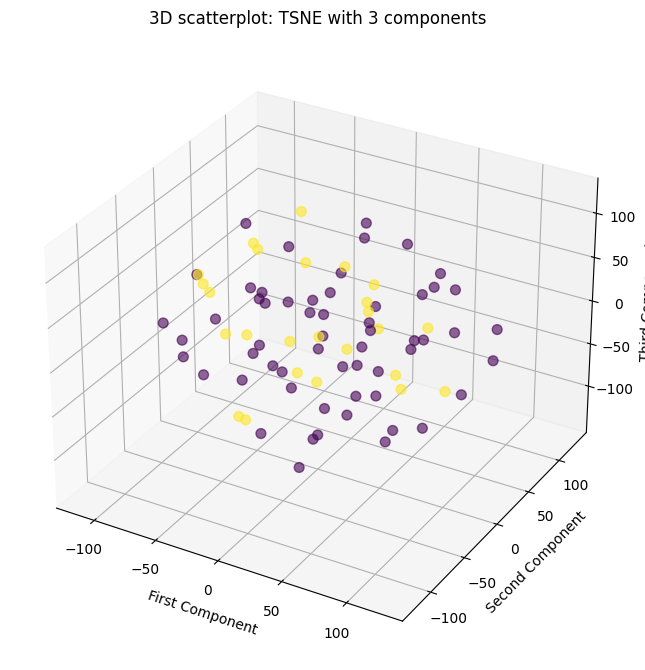

In [ ]:
from mpl_toolkits import mplot3d

tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_data_scaled_dataframe)

df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(z[:, 0], z[:, 1], z[:,2], c = hypertension, s=50, alpha=0.6)

plt.title("3D scatterplot: TSNE with 3 components", pad=15)
ax.set_xlabel("First Component")
ax.set_ylabel("Second Component")
ax.set_zlabel("Third Component")
plt.savefig("3d_scatterplot.png")

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.001s...
[t-SNE] Computed neighbors for 83 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 5.816125
[t-SNE] KL divergence after 250 iterations with early exaggeration: 108.365402
[t-SNE] KL divergence after 1000 iterations: 1.041466


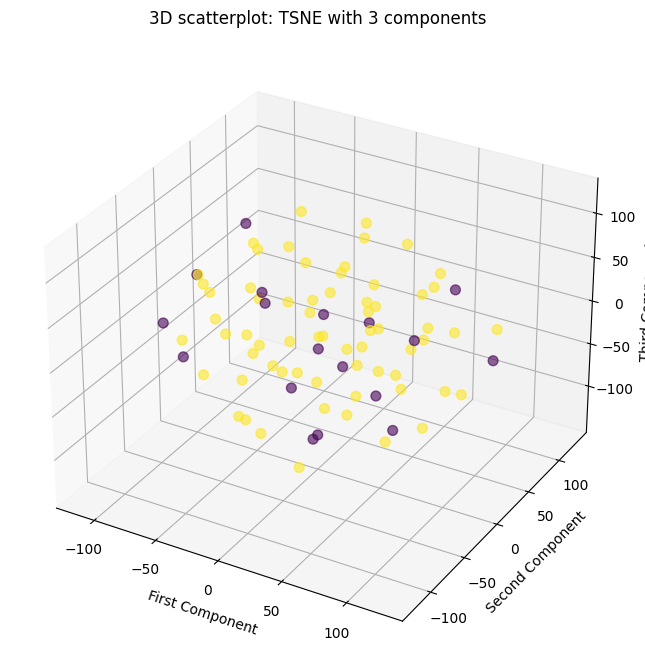

In [ ]:
from mpl_toolkits import mplot3d

tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(PCA_data_scaled_dataframe)

df = pd.DataFrame()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
sctt = ax.scatter3D(z[:, 0], z[:, 1], z[:,2], c = surgery, s=50, alpha=0.6)

plt.title("3D scatterplot: TSNE with 3 components", pad=15)
ax.set_xlabel("First Component")
ax.set_ylabel("Second Component")
ax.set_zlabel("Third Component")
plt.savefig("3d_scatterplot.png")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression, SelectFromModel
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

PCA_data_scaled_dataframe.head()

feature0 = 0
feature1 = 0
feature2 = 0
feature3 = 0
feature4 = 0
feature5 = 0
feature6 = 0
feature7 = 0
feature8 = 0
feature9 = 0
feature10 = 0
feature11 = 0
feature12 = 0
feature13 = 0
feature14 = 0
feature15 = 0
feature16 = 0
feature17 = 0
feature18 = 0
feature19 = 0
feature20 = 0
feature21 = 0
feature22 = 0
feature23 = 0
feature24 = 0
feature25 = 0
feature26 = 0
feature27 = 0
feature28 = 0
feature29 = 0
feature30 = 0
feature31 = 0
feature32 = 0
feature33 = 0
feature34 = 0
feature35 = 0
feature36 = 0
feature37 = 0
feature38 = 0
feature39 = 0
feature40 = 0
feature41 = 0
feature42 = 0
feature43 = 0
feature44 = 0
feature45 = 0
feature46 = 0
feature47 = 0
feature48 = 0
feature49 = 0
feature50 = 0
feature51 = 0
feature52 = 0
feature53 = 0
feature54 = 0
feature55 = 0
feature56 = 0
feature57 = 0
feature58 = 0
feature59 = 0
feature60 = 0
feature61 = 0
feature62 = 0
feature63 = 0
feature64 = 0
feature65 = 0
feature66 = 0
feature67 = 0
feature68 = 0
feature69 = 0
feature70 = 0
feature71 = 0
feature72 = 0
feature73 = 0
feature74 = 0
feature75 = 0
feature76 = 0
feature77 = 0
feature78 = 0
feature79 = 0
feature80 = 0
feature81 = 0
feature82 = 0
feature83 = 0
feature84 = 0
feature85 = 0
feature86 = 0
feature87 = 0
feature88 = 0
feature89 = 0
feature90 = 0
feature91 = 0
feature92 = 0
feature93 = 0
feature94 = 0
feature95 = 0
feature96 = 0
feature97 = 0
feature98 = 0
feature99 = 0
feature100 = 0
feature101 = 0
feature102 = 0
feature103 = 0
feature104 = 0
feature105 = 0
feature106 = 0
feature107 = 0
feature108 = 0
feature109 = 0
feature110 = 0


In [ ]:
x = pd.DataFrame(PCA_data_scaled_dataframe)
y = stroke


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
x_train.shape, x_test.shape


x80, x20, y80, y20 = train_test_split(x, y, test_size=0.2)
x_fold_1, x_fold_2, y_fold_1, y_fold_2 = train_test_split(x20, y20, test_size=0.50)
x40_1, x40_2, y40_1, y40_2 = train_test_split(x80, y80, test_size=0.50)
x20_1, x20_2, y20_1, y20_2 = train_test_split(x40_1, y40_1, test_size=0.50)
x20_3, x20_4, y20_3, y20_4 = train_test_split(x40_2, y40_2, test_size=0.50)
x_fold_3, x_fold_4, y_fold_3, y_fold_4 = train_test_split(x20_1, y20_1, test_size=0.50)
x_fold_5, x_fold_6, y_fold_5, y_fold_6 = train_test_split(x20_2, y20_2, test_size=0.50)
x_fold_7, x_fold_8, y_fold_7, y_fold_8 = train_test_split(x20_3, y20_3, test_size=0.50)
x_fold_9, x_fold_10, y_fold_9, y_fold_10 = train_test_split(x20_4, y20_4, test_size=0.50)

column_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
                    '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
                    '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
                    '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
                    '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110']

x_fold_1 = pd.DataFrame(x_fold_1)
y_fold_1 = pd.DataFrame(y_fold_1)
x_fold_2 = pd.DataFrame(x_fold_2)
y_fold_2 = pd.DataFrame(y_fold_2)
x_fold_3 = pd.DataFrame(x_fold_3)
y_fold_3 = pd.DataFrame(y_fold_3)
x_fold_4 = pd.DataFrame(x_fold_4)
y_fold_4 = pd.DataFrame(y_fold_4)
x_fold_5 = pd.DataFrame(x_fold_5)
y_fold_5 = pd.DataFrame(y_fold_5)
x_fold_6 = pd.DataFrame(x_fold_6)
y_fold_6 = pd.DataFrame(y_fold_6)
x_fold_7 = pd.DataFrame(x_fold_7)
y_fold_7 = pd.DataFrame(y_fold_7)
x_fold_8 = pd.DataFrame(x_fold_8)
y_fold_8 = pd.DataFrame(y_fold_8)
x_fold_9 = pd.DataFrame(x_fold_9)
y_fold_9 = pd.DataFrame(y_fold_9)
x_fold_10 = pd.DataFrame(x_fold_10)
y_fold_10 = pd.DataFrame(y_fold_10)


x_train_unique1 = pd.concat([x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
y_train_unique1 = pd.concat([y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
x_test_unique1 = x_fold_1
y_test_unique1 = y_fold_1

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique1)
x_train_filter = constant_filter.transform(x_train_unique1)
x_test_filter = constant_filter.transform(x_test_unique1)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique1 = x_train_T.T
x_test_unique1 = x_test_T.T

x_train_unique2 = pd.concat([x_fold_1, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
y_train_unique2 = pd.concat([y_fold_1, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
x_test_unique2 = x_fold_2
y_test_unique2 = y_fold_2

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique2)
x_train_filter = constant_filter.transform(x_train_unique2)
x_test_filter = constant_filter.transform(x_test_unique2)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique2 = x_train_T.T
x_test_unique2 = x_test_T.T

x_train_unique3 = pd.concat([x_fold_1, x_fold_2, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
y_train_unique3 = pd.concat([y_fold_1, y_fold_2, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
x_test_unique3 = x_fold_3
y_test_unique3 = y_fold_3

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique3)
x_train_filter = constant_filter.transform(x_train_unique3)
x_test_filter = constant_filter.transform(x_test_unique3)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique3 = x_train_T.T
x_test_unique3 = x_test_T.T

x_train_unique4 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
y_train_unique4 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
x_test_unique4 = x_fold_4
y_test_unique4 = y_fold_4

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique4)
x_train_filter = constant_filter.transform(x_train_unique4)
x_test_filter = constant_filter.transform(x_test_unique4)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique4 = x_train_T.T
x_test_unique4 = x_test_T.T

x_train_unique5 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
y_train_unique5 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
x_test_unique5 = x_fold_5
y_test_unique5 = y_fold_5

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique5)
x_train_filter = constant_filter.transform(x_train_unique5)
x_test_filter = constant_filter.transform(x_test_unique5)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique5 = x_train_T.T
x_test_unique5 = x_test_T.T

x_train_unique6 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
y_train_unique6 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
x_test_unique6 = x_fold_6
y_test_unique6 = y_fold_6

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique6)
x_train_filter = constant_filter.transform(x_train_unique6)
x_test_filter = constant_filter.transform(x_test_unique6)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique6 = x_train_T.T
x_test_unique6 = x_test_T.T

x_train_unique7 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_8, x_fold_9, x_fold_10])
y_train_unique7 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_8, y_fold_9, y_fold_10])
x_test_unique7 = x_fold_7
y_test_unique7 = y_fold_7

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique7)
x_train_filter = constant_filter.transform(x_train_unique7)
x_test_filter = constant_filter.transform(x_test_unique7)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique7 = x_train_T.T
x_test_unique7 = x_test_T.T

x_train_unique8 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_9, x_fold_10])
y_train_unique8 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_9, y_fold_10])
x_test_unique8 = x_fold_8
y_test_unique8 = y_fold_8

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique8)
x_train_filter = constant_filter.transform(x_train_unique8)
x_test_filter = constant_filter.transform(x_test_unique8)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique8 = x_train_T.T
x_test_unique8 = x_test_T.T

x_train_unique9 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_10])
y_train_unique9 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_10])
x_test_unique9 = x_fold_9
y_test_unique9 = y_fold_9

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique9)
x_train_filter = constant_filter.transform(x_train_unique9)
x_test_filter = constant_filter.transform(x_test_unique9)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique9 = x_train_T.T
x_test_unique9 = x_test_T.T

x_train_unique10 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9])
y_train_unique10 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9])
x_test_unique10 = x_fold_10
y_test_unique10 = y_fold_10

constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train_unique10)
x_train_filter = constant_filter.transform(x_train_unique10)
x_test_filter = constant_filter.transform(x_test_unique10)
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)
x_train_T.duplicated().sum()
x_train_unique10 = x_train_T.T
x_test_unique10 = x_test_T.T





In [ ]:
x_train_unique3.shape, x_test_unique3.shape

((75, 111), (8, 111))

In [ ]:
constant_filter = VarianceThreshold(threshold = 0.001)
constant_filter.fit(x_train)
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [ ]:
x_train_T = x_train_filter.T
x_test_T = x_test_filter.T

In [ ]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [ ]:
x_train_T.duplicated().sum()
x_train_unique = x_train_T.T
x_test_unique = x_test_T.T

In [ ]:
x_train_unique.shape, x_test_unique.shape

((66, 111), (17, 111))

In [ ]:
# labels_removed = []
# labels = PCA_data.columns
# removed_material = labels[1]
# for i in range(len(labels)):
#   if labels[i] == removed_material:
#     print("removed", labels[i])
#   else:
#     labels_removed.append(labels[i])

# print(labels_removed)

In [ ]:
# x_train_unique.columns = labels_removed

In [ ]:
mi = mutual_info_classif(x_train_unique10, y_train_unique10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
len(mi)

111

In [ ]:
mi

array([0.0018501 , 0.        , 0.00290899, 0.07080889, 0.00630505,
       0.02398722, 0.        , 0.        , 0.00457615, 0.00304937,
       0.03048051, 0.01028267, 0.02119721, 0.        , 0.        ,
       0.03345393, 0.        , 0.01410058, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01965952, 0.02028637, 0.        , 0.        ,
       0.01904144, 0.        , 0.03281054, 0.0399228 , 0.        ,
       0.0031107 , 0.0155056 , 0.        , 0.01479226, 0.        ,
       0.00100649, 0.01180618, 0.        , 0.        , 0.        ,
       0.01264745, 0.        , 0.        , 0.        , 0.00901978,
       0.        , 0.        , 0.        , 0.00565251, 0.        ,
       0.00497158, 0.        , 0.00958725, 0.00232914, 0.00883

In [ ]:
mi = pd.Series(mi)
mi.index = x_train_unique1.columns

In [ ]:
mi.sort_values(ascending = False, inplace = True)

<Axes: >

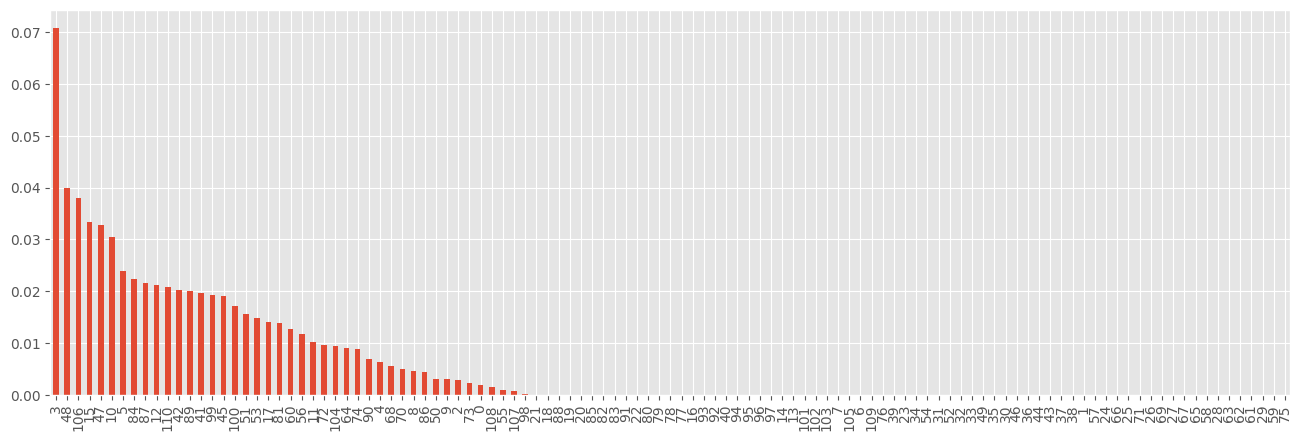

In [ ]:
mi.plot.bar(figsize = (16, 5))

In [ ]:
sel = SelectPercentile(mutual_info_classif, percentile = 10).fit(x_train_unique1, y_train_unique1)
sel

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectPercentile(score_func=<function mutual_info_classif at 0x7d10f5bdb6d0>)

In [ ]:
features = x_train_unique1.columns[sel.get_support()]

for i in range (len(features)):
  if features[i] == 0:
    feature0 = feature0 + 1
  if features[i] == 1:
    feature1 = feature1 + 1
  if features[i] == 2:
    feature2 = feature2 + 1
  if features[i] == 3:
    feature3 = feature3 + 1
  if features[i] == 4:
    feature4 = feature4 + 1
  if features[i] == 5:
    feature5 = feature5 + 1
  if features[i] == 6:
    feature6 = feature6 + 1
  if features[i] == 7:
    feature7 = feature7 + 1
  if features[i] == 8:
    feature8 = feature8 + 1
  if features[i] == 9:
    feature9 = feature9 + 1
  if features[i] == 10:
    feature10 = feature10 + 1
  if features[i] == 11:
    feature11 = feature11 + 1
  if features[i] == 12:
    feature12 = feature12 + 1
  if features[i] == 13:
    feature13 = feature13 + 1
  if features[i] == 14:
    feature14 = feature14 + 1
  if features[i] == 15:
    feature15 = feature15 + 1
  if features[i] == 16:
    feature16 = feature16 + 1
  if features[i] == 17:
    feature17 = feature17 + 1
  if features[i] == 18:
    feature18 = feature18 + 1
  if features[i] == 19:
    feature19 = feature19 + 1
  if features[i] == 20:
    feature20 = feature20 + 1
  if features[i] == 21:
    feature21 = feature21 + 1
  if features[i] == 22:
    feature22 = feature22 + 1
  if features[i] == 23:
    feature23 = feature23 + 1
  if features[i] == 24:
    feature24 = feature24 + 1
  if features[i] == 25:
    feature25 = feature25 + 1
  if features[i] == 26:
    feature26 = feature26 + 1
  if features[i] == 27:
    feature27 = feature27 + 1
  if features[i] == 28:
    feature28 = feature28 + 1
  if features[i] == 29:
    feature29 = feature29 + 1
  if features[i] == 30:
    feature30 = feature30 + 1
  if features[i] == 31:
    feature31 = feature31 + 1
  if features[i] == 32:
    feature32 = feature32 + 1
  if features[i] == 33:
    feature33 = feature33 + 1
  if features[i] == 34:
    feature34 = feature34 + 1
  if features[i] == 35:
    feature35 = feature35 + 1
  if features[i] == 36:
    feature36 = feature36 + 1
  if features[i] == 37:
    feature37 = feature37 + 1
  if features[i] == 38:
    feature38 = feature38 + 1
  if features[i] == 39:
    feature39 = feature39 + 1
  if features[i] == 40:
    feature40 = feature40 + 1
  if features[i] == 41:
    feature41 = feature41 + 1
  if features[i] == 42:
    feature42 = feature42 + 1
  if features[i] == 43:
    feature43 = feature43 + 1
  if features[i] == 44:
    feature44 = feature44 + 1
  if features[i] == 45:
    feature45 = feature45 + 1
  if features[i] == 46:
    feature46 = feature46 + 1
  if features[i] == 47:
    feature47 = feature47 + 1
  if features[i] == 48:
    feature48 = feature48 + 1
  if features[i] == 49:
    feature49 = feature49 + 1
  if features[i] == 50:
    feature50 = feature50 + 1
  if features[i] == 51:
    feature51 = feature51 + 1
  if features[i] == 52:
    feature52 = feature52 + 1
  if features[i] == 53:
    feature53 = feature53 + 1
  if features[i] == 54:
    feature54 = feature54 + 1
  if features[i] == 55:
    feature55 = feature55 + 1
  if features[i] == 56:
    feature56 = feature56 + 1
  if features[i] == 57:
    feature57 = feature57 + 1
  if features[i] == 58:
    feature58 = feature58 + 1
  if features[i] == 59:
    feature59 = feature59 + 1
  if features[i] == 60:
    feature60 = feature60 + 1
  if features[i] == 61:
    feature61 = feature61 + 1
  if features[i] == 62:
    feature62 = feature62 + 1
  if features[i] == 63:
    feature63 = feature63 + 1
  if features[i] == 64:
    feature64 = feature64 + 1
  if features[i] == 65:
    feature65 = feature65 + 1
  if features[i] == 66:
    feature66 = feature66 + 1
  if features[i] == 67:
    feature67 = feature67 + 1
  if features[i] == 68:
    feature68 = feature68 + 1
  if features[i] == 69:
    feature69 = feature69 + 1
  if features[i] == 70:
    feature70 = feature70 + 1
  if features[i] == 71:
    feature71 = feature71 + 1
  if features[i] == 72:
    feature72 = feature72 + 1
  if features[i] == 73:
    feature73 = feature73 + 1
  if features[i] == 74:
    feature74 = feature74 + 1
  if features[i] == 75:
    feature75 = feature75 + 1
  if features[i] == 76:
    feature76 = feature76 + 1
  if features[i] == 77:
    feature77 = feature77 + 1
  if features[i] == 78:
    feature78 = feature78 + 1
  if features[i] == 79:
    feature79 = feature79 + 1
  if features[i] == 80:
    feature80 = feature80 + 1
  if features[i] == 81:
    feature81 = feature81 + 1
  if features[i] == 82:
    feature82 = feature82 + 1
  if features[i] == 83:
    feature83 = feature83 + 1
  if features[i] == 84:
    feature84 = feature84 + 1
  if features[i] == 85:
    feature85 = feature85 + 1
  if features[i] == 86:
    feature86 = feature86 + 1
  if features[i] == 87:
    feature87 = feature87 + 1
  if features[i] == 88:
    feature88 = feature88 + 1
  if features[i] == 89:
    feature89 = feature89 + 1
  if features[i] == 90:
    feature90 = feature90 + 1
  if features[i] == 91:
    feature91 = feature91 + 1
  if features[i] == 92:
    feature92 = feature92 + 1
  if features[i] == 93:
    feature93 = feature93 + 1
  if features[i] == 94:
    feature94 = feature94 + 1
  if features[i] == 95:
    feature95 = feature95 + 1
  if features[i] == 96:
    feature96 = feature96 + 1
  if features[i] == 97:
    feature97 = feature97 + 1
  if features[i] == 98:
    feature98 = feature98 + 1
  if features[i] == 99:
    feature99 = feature99 + 1
  if features[i] == 100:
    feature100 = feature100 + 1
  if features[i] == 101:
    feature101 = feature101 + 1
  if features[i] == 102:
    feature102 = feature102 + 1
  if features[i] == 103:
    feature103 = feature103 + 1
  if features[i] == 104:
    feature104 = feature104 + 1
  if features[i] == 105:
    feature105 = feature105 + 1
  if features[i] == 106:
    feature106 = feature106 + 1
  if features[i] == 107:
    feature107 = feature107 + 1
  if features[i] == 108:
    feature108 = feature108 + 1
  if features[i] == 109:
    feature109 = feature109 + 1
  if features[i] == 110:
    feature110 = feature110 + 1


print(features)


Int64Index([10, 11, 47, 48, 56, 60, 73, 86, 87, 105, 106], dtype='int64')


In [ ]:
loops_folds_x_train = [x_train_unique1, x_train_unique2, x_train_unique3, x_train_unique4, x_train_unique5, x_train_unique6, x_train_unique7, x_train_unique8, x_train_unique9, x_train_unique10]
loops_folds_y_train = [y_train_unique1, y_train_unique2, y_train_unique3, y_train_unique4, y_train_unique5, y_train_unique6, y_train_unique7, y_train_unique8, y_train_unique9, y_train_unique10]
loops_folds_x_test = [x_test_unique1, x_test_unique2, x_test_unique3, x_test_unique4, x_test_unique5, x_test_unique6, x_test_unique7, x_test_unique8, x_test_unique9, x_test_unique10]
loops_folds_y_test = [y_test_unique1, y_test_unique2, y_test_unique3, y_test_unique4, y_test_unique5, y_test_unique6, y_test_unique7, y_test_unique8, y_test_unique9, y_test_unique10]

In [ ]:
for i in range(10):
  mi = mutual_info_classif(loops_folds_x_train[i], loops_folds_y_train[i])
  mi = pd.Series(mi)
  mi.index = x_train_unique1.columns
  mi.sort_values(ascending = False, inplace = True)
  sel = SelectPercentile(mutual_info_classif, percentile = 10).fit(loops_folds_x_train[i], loops_folds_y_train[i])
  features = loops_folds_x_train[i].columns[sel.get_support()]
  for j in range (len(features)):
    if features[j] == 0:
      feature0 = feature0 + 1
    if features[j] == 1:
      feature1 = feature1 + 1
    if features[j] == 2:
      feature2 = feature2 + 1
    if features[j] == 3:
      feature3 = feature3 + 1
    if features[j] == 4:
      feature4 = feature4 + 1
    if features[j] == 5:
      feature5 = feature5 + 1
    if features[j] == 6:
      feature6 = feature6 + 1
    if features[j] == 7:
      feature7 = feature7 + 1
    if features[j] == 8:
      feature8 = feature8 + 1
    if features[j] == 9:
      feature9 = feature9 + 1
    if features[j] == 10:
      feature10 = feature10 + 1
    if features[j] == 11:
      feature11 = feature11 + 1
    if features[j] == 12:
      feature12 = feature12 + 1
    if features[j] == 13:
      feature13 = feature13 + 1
    if features[j] == 14:
      feature14 = feature14 + 1
    if features[j] == 15:
      feature15 = feature15 + 1
    if features[j] == 16:
      feature16 = feature16 + 1
    if features[j] == 17:
      feature17 = feature17 + 1
    if features[j] == 18:
      feature18 = feature18 + 1
    if features[j] == 19:
      feature19 = feature19 + 1
    if features[j] == 20:
      feature20 = feature20 + 1
    if features[j] == 21:
      feature21 = feature21 + 1
    if features[j] == 22:
      feature22 = feature22 + 1
    if features[j] == 23:
      feature23 = feature23 + 1
    if features[j] == 24:
      feature24 = feature24 + 1
    if features[j] == 25:
      feature25 = feature25 + 1
    if features[j] == 26:
      feature26 = feature26 + 1
    if features[j] == 27:
      feature27 = feature27 + 1
    if features[j] == 28:
      feature28 = feature28 + 1
    if features[j] == 29:
      feature29 = feature29 + 1
    if features[j] == 30:
      feature30 = feature30 + 1
    if features[j] == 31:
      feature31 = feature31 + 1
    if features[j] == 32:
      feature32 = feature32 + 1
    if features[j] == 33:
      feature33 = feature33 + 1
    if features[j] == 34:
      feature34 = feature34 + 1
    if features[j] == 35:
      feature35 = feature35 + 1
    if features[j] == 36:
      feature36 = feature36 + 1
    if features[j] == 37:
      feature37 = feature37 + 1
    if features[j] == 38:
      feature38 = feature38 + 1
    if features[j] == 39:
      feature39 = feature39 + 1
    if features[j] == 40:
      feature40 = feature40 + 1
    if features[j] == 41:
      feature41 = feature41 + 1
    if features[j] == 42:
      feature42 = feature42 + 1
    if features[j] == 43:
      feature43 = feature43 + 1
    if features[j] == 44:
      feature44 = feature44 + 1
    if features[j] == 45:
      feature45 = feature45 + 1
    if features[j] == 46:
      feature46 = feature46 + 1
    if features[j] == 47:
      feature47 = feature47 + 1
    if features[j] == 48:
      feature48 = feature48 + 1
    if features[j] == 49:
      feature49 = feature49 + 1
    if features[j] == 50:
      feature50 = feature50 + 1
    if features[j] == 51:
      feature51 = feature51 + 1
    if features[j] == 52:
      feature52 = feature52 + 1
    if features[j] == 53:
      feature53 = feature53 + 1
    if features[j] == 54:
      feature54 = feature54 + 1
    if features[j] == 55:
      feature55 = feature55 + 1
    if features[j] == 56:
      feature56 = feature56 + 1
    if features[j] == 57:
      feature57 = feature57 + 1
    if features[j] == 58:
      feature58 = feature58 + 1
    if features[j] == 59:
      feature59 = feature59 + 1
    if features[j] == 60:
      feature60 = feature60 + 1
    if features[j] == 61:
      feature61 = feature61 + 1
    if features[j] == 62:
      feature62 = feature62 + 1
    if features[j] == 63:
      feature63 = feature63 + 1
    if features[j] == 64:
      feature64 = feature64 + 1
    if features[j] == 65:
      feature65 = feature65 + 1
    if features[j] == 66:
      feature66 = feature66 + 1
    if features[j] == 67:
      feature67 = feature67 + 1
    if features[j] == 68:
      feature68 = feature68 + 1
    if features[j] == 69:
      feature69 = feature69 + 1
    if features[j] == 70:
      feature70 = feature70 + 1
    if features[j] == 71:
      feature71 = feature71 + 1
    if features[j] == 72:
      feature72 = feature72 + 1
    if features[j] == 73:
      feature73 = feature73 + 1
    if features[j] == 74:
      feature74 = feature74 + 1
    if features[j] == 75:
      feature75 = feature75 + 1
    if features[j] == 76:
      feature76 = feature76 + 1
    if features[j] == 77:
      feature77 = feature77 + 1
    if features[j] == 78:
      feature78 = feature78 + 1
    if features[j] == 79:
      feature79 = feature79 + 1
    if features[j] == 80:
      feature80 = feature80 + 1
    if features[j] == 81:
      feature81 = feature81 + 1
    if features[j] == 82:
      feature82 = feature82 + 1
    if features[j] == 83:
      feature83 = feature83 + 1
    if features[j] == 84:
      feature84 = feature84 + 1
    if features[j] == 85:
      feature85 = feature85 + 1
    if features[j] == 86:
      feature86 = feature86 + 1
    if features[j] == 87:
      feature87 = feature87 + 1
    if features[j] == 88:
      feature88 = feature88 + 1
    if features[j] == 89:
      feature89 = feature89 + 1
    if features[j] == 90:
      feature90 = feature90 + 1
    if features[j] == 91:
      feature91 = feature91 + 1
    if features[j] == 92:
      feature92 = feature92 + 1
    if features[j] == 93:
      feature93 = feature93 + 1
    if features[j] == 94:
      feature94 = feature94 + 1
    if features[j] == 95:
      feature95 = feature95 + 1
    if features[j] == 96:
      feature96 = feature96 + 1
    if features[j] == 97:
      feature97 = feature97 + 1
    if features[j] == 98:
      feature98 = feature98 + 1
    if features[j] == 99:
      feature99 = feature99 + 1
    if features[j] == 100:
      feature100 = feature100 + 1
    if features[j] == 101:
      feature101 = feature101 + 1
    if features[j] == 102:
      feature102 = feature102 + 1
    if features[j] == 103:
      feature103 = feature103 + 1
    if features[j] == 104:
      feature104 = feature104 + 1
    if features[j] == 105:
      feature105 = feature105 + 1
    if features[j] == 106:
      feature106 = feature106 + 1
    if features[j] == 107:
      feature107 = feature107 + 1
    if features[j] == 108:
      feature108 = feature108 + 1
    if features[j] == 109:
      feature109 = feature109 + 1
    if features[j] == 110:
      feature110 = feature110 + 1

  x_train_mi = sel.transform(loops_folds_x_train[i])
  x_test_mi = sel.transform(loops_folds_x_test[i])

  def run_randomForest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = 1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set for fold", [i], "is: ")
    print(accuracy_score(y_test, y_pred))
    print("Selected features for fold", [i], "are: ", features)

  run_randomForest(x_train_mi, x_test_mi, loops_folds_y_train[i], loops_folds_y_test[i])





/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [0] is: 
0.875
Selected features for fold [0] are:  Int64Index([1, 6, 7, 14, 23, 41, 49, 53, 62, 69, 96], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [1] is: 
0.7777777777777778
Selected features for fold [1] are:  Int64Index([1, 3, 6, 9, 14, 30, 43, 49, 63, 74, 86], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [2] is: 
0.75
Selected features for fold [2] are:  Int64Index([0, 1, 5, 7, 30, 49, 62, 63, 72, 92, 96], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [3] is: 
0.75
Selected features for fold [3] are:  Int64Index([1, 7, 15, 49, 63, 74, 86, 102, 103, 106, 107], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([1, 6, 7, 10, 11, 14, 15, 41, 62, 86, 106], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [5] is: 
0.6666666666666666
Selected features for fold [5] are:  Int64Index([15, 30, 53, 56, 74, 86, 90, 96, 102, 106, 107], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [6] is: 
0.625
Selected features for fold [6] are:  Int64Index([1, 7, 14, 53, 62, 63, 64, 74, 86, 90, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([6, 7, 9, 15, 30, 49, 63, 64, 74, 86, 96], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [8] is: 
0.625
Selected features for fold [8] are:  Int64Index([1, 6, 9, 10, 14, 15, 53, 63, 96, 106, 107], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-1640-046be205c97f>:237: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set for fold [9] is: 
0.6666666666666666
Selected features for fold [9] are:  Int64Index([6, 7, 9, 14, 15, 49, 53, 63, 74, 106, 107], dtype='int64')


In [ ]:
features_all = [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14,
                feature15, feature16, feature17, feature18, feature19, feature20, feature21, feature22, feature23, feature24, feature25, feature26, feature27, feature28,
                feature29, feature30, feature31, feature32, feature33, feature34, feature35, feature36, feature37, feature38, feature39, feature40, feature41, feature42,
                feature43, feature44, feature45, feature46, feature47, feature48, feature49, feature50, feature51, feature52, feature53, feature54, feature55, feature56,
                feature57, feature58, feature59, feature60, feature61, feature62, feature63, feature64, feature65, feature66, feature67, feature68, feature69, feature70,
                feature71, feature72, feature73, feature74, feature75, feature76, feature77, feature78, feature79, feature80, feature81, feature82, feature83, feature84,
                feature85, feature86, feature87, feature88, feature89, feature90, feature91, feature92, feature93, feature94, feature95, feature96, feature97, feature98,
                feature99, feature100, feature101, feature102, feature103, feature104, feature105, feature106, feature107, feature108, feature109, feature110]

print(features_all)

for i in range(len(features_all)):
  if features_all[i] > 240:
    print("Feature", [i], 'has a score of: ', features_all[i])

[8, 330, 0, 30, 0, 108, 296, 257, 15, 129, 137, 89, 56, 6, 347, 311, 0, 84, 0, 0, 36, 0, 71, 25, 2, 0, 0, 0, 6, 0, 228, 1, 11, 80, 0, 0, 0, 0, 1, 0, 2, 64, 0, 46, 4, 0, 0, 0, 0, 237, 21, 0, 65, 245, 4, 75, 5, 49, 0, 0, 1, 2, 210, 316, 89, 0, 0, 3, 0, 45, 1, 9, 12, 13, 277, 4, 0, 0, 1, 0, 0, 4, 0, 5, 0, 0, 317, 0, 0, 20, 54, 0, 63, 0, 0, 2, 241, 1, 2, 0, 0, 0, 99, 62, 2, 0, 314, 173, 6, 0, 1]
Feature [1] has a score of:  330
Feature [6] has a score of:  296
Feature [7] has a score of:  257
Feature [14] has a score of:  347
Feature [15] has a score of:  311
Feature [53] has a score of:  245
Feature [63] has a score of:  316
Feature [74] has a score of:  277
Feature [86] has a score of:  317
Feature [96] has a score of:  241
Feature [106] has a score of:  314


In [ ]:
# features = [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14,
#             feature15, feature16, feature17, feature18, feature19, feature20, feature21, feature22, feature23, feature24, feature25, feature26, feature27, feature28, feature29,
#             feature30, feature31, feature32, feature33, feature34, feature35, feature36, feature37, feature38, feature39, feature40, feature41, feature42, feature43, feature44, feature45,
#             feature46, feature47, feature48, feature49, feature50, feature51, feature52, feature53, feature54, feature55, feature56, feature57, feature58, feature59, feature60,
#             feature61, feature62, feature63, feature64, feature65, feature66, feature67, feature68, feature69, feature70, feature71, feature72, feature73, feature74, feature75,
#             feature76, feature77, feature78, feature79, feature80, feature81, feature82, feature83, feature84, feature85, feature86, feature87, feature88, feature89, feature90,
#             feature91, feature92, feature93, feature94, feature95, feature96, feature97, feature98, feature99, feature100, feature101, feature102, feature103, feature104, feature105,
#             feature106, feature107, feature108, feature109, feature110]

# print(features)

# for i in range(len(features)):
#   if features[i] > 20:
#     print("Feature", i, "has value:", features[i])

In [ ]:
x_train_unique.shape

(66, 111)

In [ ]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x7cbc9184e8c0>, *, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable, default=f_classif
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See Also"). The default function only
 |      works with classification tasks.
 |  
 |      .. versionadded:: 0.18
 |  
 |  percentile : int, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feat

In [ ]:
x_train_mi = sel.transform(x_train_unique10)
x_test_mi = sel.transform(x_test_unique10)

x_train_mi.shape

(74, 11)

In [ ]:

def run_randomForest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = 1)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print("Accuracy on test set: ")
  print(accuracy_score(y_test, y_pred))

In [ ]:
%%time

run_randomForest(x_train_mi, x_test_mi, y_train_unique10, y_test_unique10)
run_randomForest(x_train, x_test, y_train, y_test)

<ipython-input-1670-dfd17878950f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


Accuracy on test set: 
0.6666666666666666
Accuracy on test set: 
0.7058823529411765
CPU times: user 548 ms, sys: 2.9 ms, total: 551 ms
Wall time: 636 ms


In [ ]:
roc_auc = []
for feature in x_train_unique.columns:
  clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
  clf.fit(x_train_unique[feature].to_frame(), y_train)
  y_pred = clf.predict(x_test_unique[feature].to_frame())
  roc_auc.append(roc_auc_score(y_test, y_pred))

In [ ]:
print(roc_auc)

[0.46153846153846156, 0.4230769230769231, 0.5480769230769231, 0.34615384615384615, 0.4230769230769231, 0.4230769230769231, 0.6346153846153846, 0.46153846153846156, 0.47115384615384615, 0.5865384615384616, 0.4326923076923077, 0.3076923076923077, 0.5865384615384616, 0.34615384615384615, 0.6730769230769231, 0.5576923076923077, 0.6346153846153846, 0.6346153846153846, 0.38461538461538464, 0.38461538461538464, 0.5096153846153846, 0.34615384615384615, 0.5865384615384616, 0.6346153846153846, 0.4230769230769231, 0.5096153846153846, 0.38461538461538464, 0.5480769230769231, 0.46153846153846156, 0.34615384615384615, 0.5865384615384616, 0.6826923076923077, 0.5865384615384616, 0.6346153846153846, 0.38461538461538464, 0.38461538461538464, 0.47115384615384615, 0.4230769230769231, 0.5096153846153846, 0.38461538461538464, 0.3076923076923077, 0.4230769230769231, 0.6346153846153846, 0.5096153846153846, 0.6346153846153846, 0.5096153846153846, 0.34615384615384615, 0.38461538461538464, 0.47115384615384615, 0

In [ ]:
roc_values = pd.Series(roc_auc)
roc_values.index = x_train_unique.columns
roc_values.sort_values(ascending = False, inplace = True)

In [ ]:
roc_values

92    0.875000
86    0.750000
72    0.750000
31    0.682692
62    0.673077
        ...   
11    0.307692
79    0.269231
94    0.192308
77    0.153846
66    0.153846
Length: 111, dtype: float64

<Axes: >

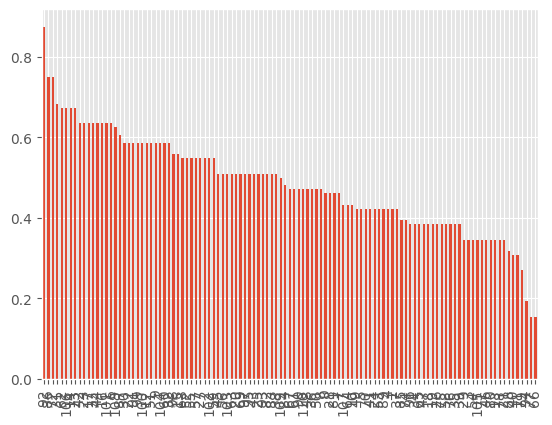

In [ ]:
roc_values.plot.bar()

In [ ]:
sel = roc_values[roc_values > 0.60]
sel

92     0.875000
86     0.750000
72     0.750000
31     0.682692
62     0.673077
106    0.673077
14     0.673077
73     0.673077
42     0.634615
23     0.634615
17     0.634615
33     0.634615
44     0.634615
16     0.634615
101    0.634615
6      0.634615
108    0.625000
87     0.605769
dtype: float64

In [ ]:
features = x_train.columns[sel.get_support()]

AttributeError: ignored

In [ ]:
x_train_roc = x_train_unique[sel.index]
x_test_roc = x_test_unique[sel.index]

In [ ]:
def run_randomForest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Accuracy on Test Set: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time
run_randomForest(x_train_roc, x_test_roc, y_train, y_test)

Accuracy on Test Set:  0.8235294117647058
CPU times: user 233 ms, sys: 29.3 ms, total: 262 ms
Wall time: 266 ms


In [ ]:
%%time

run_randomForest(x_train, x_test, y_train, y_test)

Accuracy on Test Set:  0.7058823529411765
CPU times: user 247 ms, sys: 16 ms, total: 263 ms
Wall time: 259 ms


In [ ]:
sel = f_classif(x_train_unique, y_train)
sel

(array([5.81136938e+00, 3.35032028e-04, 5.12840464e+00, 1.35829238e+00,
        2.95350317e+00, 1.27634342e+00, 2.74505560e+00, 2.03088902e+00,
        3.01425461e-01, 3.21464591e+00, 9.68744530e-01, 1.75375715e+00,
        2.69185401e+00, 1.05914198e+00, 2.81975847e+00, 3.89691577e+00,
        1.88993249e-02, 2.71822233e+00, 1.17172734e-03, 6.02958770e-04,
        3.18984631e+00, 1.31736159e-02, 2.23622439e-02, 1.24366386e+00,
        1.04202147e+00, 4.29966931e-02, 1.90892107e-03, 8.03970025e-02,
        9.42727832e-02, 1.02867167e+00, 9.53823937e-03, 5.80167829e-05,
        1.65900366e+00, 1.56499631e+00, 3.40991132e-02, 1.72724902e-01,
        5.51383794e-02, 2.37495026e+00, 3.58758729e+00, 2.76838278e-01,
        5.59989417e-02, 3.46122589e-01, 1.20531134e-01, 2.72704553e-03,
        1.24563425e-02, 1.64725486e-01, 1.50660276e-01, 1.30381973e+00,
        1.84515076e+00, 2.89483931e+00, 2.38063826e+00, 2.31560418e-01,
        1.32743995e-01, 2.02071967e-01, 4.87706324e-01, 1.380846

In [ ]:
p_values = pd.Series(sel[1])
p_values.index = x_train_unique.columns
p_values.sort_values(ascending = True, inplace = True)

<Axes: >

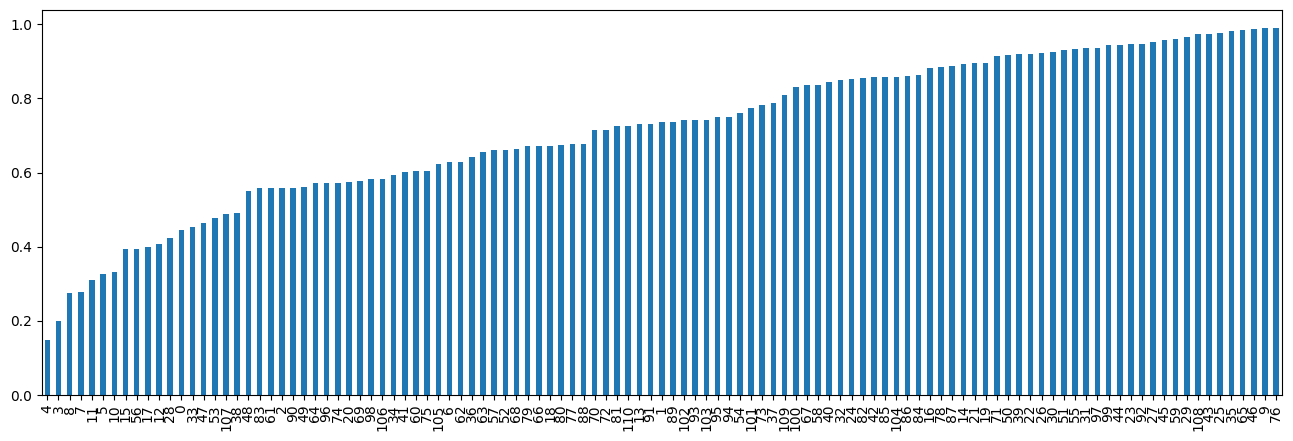

In [ ]:
p_values.plot.bar(figsize=(16, 5))

In [ ]:
print(p_values)

4     0.147431
3     0.198493
8     0.274169
7     0.277182
11    0.308585
        ...   
35    0.981315
65    0.984017
46    0.988329
9     0.989162
76    0.989874
Length: 111, dtype: float64


In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1))
sel.fit(x_train_unique, y_train)
sel.get_support()

array([ True, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
        True, False,  True])

In [ ]:
x_train_unique.columns

RangeIndex(start=0, stop=111, step=1)

In [ ]:
features = x_train_unique.columns[sel.get_support()]
features

Int64Index([  0,   5,   6,   7,   9,  12,  13,  14,  15,  16,  17,  18,  23,
             24,  26,  28,  31,  33,  34,  37,  41,  44,  47,  48,  49,  50,
             55,  56,  60,  61,  64,  72,  74,  75,  88,  90,  98, 101, 107,
            108, 110],
           dtype='int64')

In [ ]:
len(features)

41

In [ ]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1), n_features_to_select = 10)
sel.fit(x_train_unique1, y_train_unique1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=10)

In [ ]:
from sklearn.feature_selection import RFE
for i in range(10):
  sel = RFE(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1), n_features_to_select = 10)
  sel.fit(loops_folds_x_train[i], loops_folds_y_train[i])
  features = loops_folds_x_train[i].columns[sel.get_support()]
  for j in range (len(features)):
    if features[j] == 0:
      feature0 = feature0 + 1
    if features[j] == 1:
      feature1 = feature1 + 1
    if features[j] == 2:
      feature2 = feature2 + 1
    if features[j] == 3:
      feature3 = feature3 + 1
    if features[j] == 4:
      feature4 = feature4 + 1
    if features[j] == 5:
      feature5 = feature5 + 1
    if features[j] == 6:
      feature6 = feature6 + 1
    if features[j] == 7:
      feature7 = feature7 + 1
    if features[j] == 8:
      feature8 = feature8 + 1
    if features[j] == 9:
      feature9 = feature9 + 1
    if features[j] == 10:
      feature10 = feature10 + 1
    if features[j] == 11:
      feature11 = feature11 + 1
    if features[j] == 12:
      feature12 = feature12 + 1
    if features[j] == 13:
      feature13 = feature13 + 1
    if features[j] == 14:
      feature14 = feature14 + 1
    if features[j] == 15:
      feature15 = feature15 + 1
    if features[j] == 16:
      feature16 = feature16 + 1
    if features[j] == 17:
      feature17 = feature17 + 1
    if features[j] == 18:
      feature18 = feature18 + 1
    if features[j] == 19:
      feature19 = feature19 + 1
    if features[j] == 20:
      feature20 = feature20 + 1
    if features[j] == 21:
      feature21 = feature21 + 1
    if features[j] == 22:
      feature22 = feature22 + 1
    if features[j] == 23:
      feature23 = feature23 + 1
    if features[j] == 24:
      feature24 = feature24 + 1
    if features[j] == 25:
      feature25 = feature25 + 1
    if features[j] == 26:
      feature26 = feature26 + 1
    if features[j] == 27:
      feature27 = feature27 + 1
    if features[j] == 28:
      feature28 = feature28 + 1
    if features[j] == 29:
      feature29 = feature29 + 1
    if features[j] == 30:
      feature30 = feature30 + 1
    if features[j] == 31:
      feature31 = feature31 + 1
    if features[j] == 32:
      feature32 = feature32 + 1
    if features[j] == 33:
      feature33 = feature33 + 1
    if features[j] == 34:
      feature34 = feature34 + 1
    if features[j] == 35:
      feature35 = feature35 + 1
    if features[j] == 36:
      feature36 = feature36 + 1
    if features[j] == 37:
      feature37 = feature37 + 1
    if features[j] == 38:
      feature38 = feature38 + 1
    if features[j] == 39:
      feature39 = feature39 + 1
    if features[j] == 40:
      feature40 = feature40 + 1
    if features[j] == 41:
      feature41 = feature41 + 1
    if features[j] == 42:
      feature42 = feature42 + 1
    if features[j] == 43:
      feature43 = feature43 + 1
    if features[j] == 44:
      feature44 = feature44 + 1
    if features[j] == 45:
      feature45 = feature45 + 1
    if features[j] == 46:
      feature46 = feature46 + 1
    if features[j] == 47:
      feature47 = feature47 + 1
    if features[j] == 48:
      feature48 = feature48 + 1
    if features[j] == 49:
      feature49 = feature49 + 1
    if features[j] == 50:
      feature50 = feature50 + 1
    if features[j] == 51:
      feature51 = feature51 + 1
    if features[j] == 52:
      feature52 = feature52 + 1
    if features[j] == 53:
      feature53 = feature53 + 1
    if features[j] == 54:
      feature54 = feature54 + 1
    if features[j] == 55:
      feature55 = feature55 + 1
    if features[j] == 56:
      feature56 = feature56 + 1
    if features[j] == 57:
      feature57 = feature57 + 1
    if features[j] == 58:
      feature58 = feature58 + 1
    if features[j] == 59:
      feature59 = feature59 + 1
    if features[j] == 60:
      feature60 = feature60 + 1
    if features[j] == 61:
      feature61 = feature61 + 1
    if features[j] == 62:
      feature62 = feature62 + 1
    if features[j] == 63:
      feature63 = feature63 + 1
    if features[j] == 64:
      feature64 = feature64 + 1
    if features[j] == 65:
      feature65 = feature65 + 1
    if features[j] == 66:
      feature66 = feature66 + 1
    if features[j] == 67:
      feature67 = feature67 + 1
    if features[j] == 68:
      feature68 = feature68 + 1
    if features[j] == 69:
      feature69 = feature69 + 1
    if features[j] == 70:
      feature70 = feature70 + 1
    if features[j] == 71:
      feature71 = feature71 + 1
    if features[j] == 72:
      feature72 = feature72 + 1
    if features[j] == 73:
      feature73 = feature73 + 1
    if features[j] == 74:
      feature74 = feature74 + 1
    if features[j] == 75:
      feature75 = feature75 + 1
    if features[j] == 76:
      feature76 = feature76 + 1
    if features[j] == 77:
      feature77 = feature77 + 1
    if features[j] == 78:
      feature78 = feature78 + 1
    if features[j] == 79:
      feature79 = feature79 + 1
    if features[j] == 80:
      feature80 = feature80 + 1
    if features[j] == 81:
      feature81 = feature81 + 1
    if features[j] == 82:
      feature82 = feature82 + 1
    if features[j] == 83:
      feature83 = feature83 + 1
    if features[j] == 84:
      feature84 = feature84 + 1
    if features[j] == 85:
      feature85 = feature85 + 1
    if features[j] == 86:
      feature86 = feature86 + 1
    if features[j] == 87:
      feature87 = feature87 + 1
    if features[j] == 88:
      feature88 = feature88 + 1
    if features[j] == 89:
      feature89 = feature89 + 1
    if features[j] == 90:
      feature90 = feature90 + 1
    if features[j] == 91:
      feature91 = feature91 + 1
    if features[j] == 92:
      feature92 = feature92 + 1
    if features[j] == 93:
      feature93 = feature93 + 1
    if features[j] == 94:
      feature94 = feature94 + 1
    if features[j] == 95:
      feature95 = feature95 + 1
    if features[j] == 96:
      feature96 = feature96 + 1
    if features[j] == 97:
      feature97 = feature97 + 1
    if features[j] == 98:
      feature98 = feature98 + 1
    if features[j] == 99:
      feature99 = feature99 + 1
    if features[j] == 100:
      feature100 = feature100 + 1
    if features[j] == 101:
      feature101 = feature101 + 1
    if features[j] == 102:
      feature102 = feature102 + 1
    if features[j] == 103:
      feature103 = feature103 + 1
    if features[j] == 104:
      feature104 = feature104 + 1
    if features[j] == 105:
      feature105 = feature105 + 1
    if features[j] == 106:
      feature106 = feature106 + 1
    if features[j] == 107:
      feature107 = feature107 + 1
    if features[j] == 108:
      feature108 = feature108 + 1
    if features[j] == 109:
      feature109 = feature109 + 1
    if features[j] == 110:
      feature110 = feature110 + 1

  x_train_rfe = sel.transform(loops_folds_x_train[i])
  x_test_rfe = sel.transform(loops_folds_x_test[i])

  def run_randomForest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = 1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set for fold", [i], "is: ")
    print(accuracy_score(y_test, y_pred))
    print("Selected features for fold", [i], "are: ", features)

  run_randomForest(x_train_rfe, x_test_rfe, loops_folds_y_train[i], loops_folds_y_test[i])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
1.0
Selected features for fold [0] are:  Int64Index([0, 6, 12, 17, 23, 24, 44, 55, 92, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.5555555555555556
Selected features for fold [1] are:  Int64Index([0, 16, 23, 33, 47, 49, 55, 56, 60, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.5
Selected features for fold [2] are:  Int64Index([0, 6, 12, 15, 16, 55, 56, 72, 92, 110], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
0.375
Selected features for fold [3] are:  Int64Index([0, 6, 9, 14, 20, 24, 40, 55, 56, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.875
Selected features for fold [4] are:  Int64Index([0, 5, 6, 16, 17, 23, 50, 56, 92, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.6666666666666666
Selected features for fold [5] are:  Int64Index([0, 6, 12, 14, 15, 16, 23, 48, 55, 63], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.625
Selected features for fold [6] are:  Int64Index([0, 6, 14, 15, 17, 24, 43, 55, 56, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.75
Selected features for fold [7] are:  Int64Index([0, 6, 16, 17, 23, 24, 43, 63, 92, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
0.625
Selected features for fold [8] are:  Int64Index([0, 6, 12, 16, 17, 44, 55, 63, 92, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.7777777777777778
Selected features for fold [9] are:  Int64Index([0, 4, 6, 12, 15, 17, 23, 43, 55, 56], dtype='int64')


In [ ]:
from sklearn.feature_selection import RFE

for i in range(50):
  x = pd.DataFrame(PCA_data_scaled_dataframe)
  y = stroke


  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)
  x_train.shape, x_test.shape


  x80, x20, y80, y20 = train_test_split(x, y, test_size=0.2)
  x_fold_1, x_fold_2, y_fold_1, y_fold_2 = train_test_split(x20, y20, test_size=0.50)
  x40_1, x40_2, y40_1, y40_2 = train_test_split(x80, y80, test_size=0.50)
  x20_1, x20_2, y20_1, y20_2 = train_test_split(x40_1, y40_1, test_size=0.50)
  x20_3, x20_4, y20_3, y20_4 = train_test_split(x40_2, y40_2, test_size=0.50)
  x_fold_3, x_fold_4, y_fold_3, y_fold_4 = train_test_split(x20_1, y20_1, test_size=0.50)
  x_fold_5, x_fold_6, y_fold_5, y_fold_6 = train_test_split(x20_2, y20_2, test_size=0.50)
  x_fold_7, x_fold_8, y_fold_7, y_fold_8 = train_test_split(x20_3, y20_3, test_size=0.50)
  x_fold_9, x_fold_10, y_fold_9, y_fold_10 = train_test_split(x20_4, y20_4, test_size=0.50)

  column_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
                      '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
                      '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73',
                      '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97',
                      '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110']

  x_fold_1 = pd.DataFrame(x_fold_1)
  y_fold_1 = pd.DataFrame(y_fold_1)
  x_fold_2 = pd.DataFrame(x_fold_2)
  y_fold_2 = pd.DataFrame(y_fold_2)
  x_fold_3 = pd.DataFrame(x_fold_3)
  y_fold_3 = pd.DataFrame(y_fold_3)
  x_fold_4 = pd.DataFrame(x_fold_4)
  y_fold_4 = pd.DataFrame(y_fold_4)
  x_fold_5 = pd.DataFrame(x_fold_5)
  y_fold_5 = pd.DataFrame(y_fold_5)
  x_fold_6 = pd.DataFrame(x_fold_6)
  y_fold_6 = pd.DataFrame(y_fold_6)
  x_fold_7 = pd.DataFrame(x_fold_7)
  y_fold_7 = pd.DataFrame(y_fold_7)
  x_fold_8 = pd.DataFrame(x_fold_8)
  y_fold_8 = pd.DataFrame(y_fold_8)
  x_fold_9 = pd.DataFrame(x_fold_9)
  y_fold_9 = pd.DataFrame(y_fold_9)
  x_fold_10 = pd.DataFrame(x_fold_10)
  y_fold_10 = pd.DataFrame(y_fold_10)


  x_train_unique1 = pd.concat([x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique1 = pd.concat([y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique1 = x_fold_1
  y_test_unique1 = y_fold_1

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique1)
  x_train_filter = constant_filter.transform(x_train_unique1)
  x_test_filter = constant_filter.transform(x_test_unique1)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique1 = x_train_T.T
  x_test_unique1 = x_test_T.T

  x_train_unique2 = pd.concat([x_fold_1, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique2 = pd.concat([y_fold_1, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique2 = x_fold_2
  y_test_unique2 = y_fold_2

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique2)
  x_train_filter = constant_filter.transform(x_train_unique2)
  x_test_filter = constant_filter.transform(x_test_unique2)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique2 = x_train_T.T
  x_test_unique2 = x_test_T.T

  x_train_unique3 = pd.concat([x_fold_1, x_fold_2, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique3 = pd.concat([y_fold_1, y_fold_2, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique3 = x_fold_3
  y_test_unique3 = y_fold_3

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique3)
  x_train_filter = constant_filter.transform(x_train_unique3)
  x_test_filter = constant_filter.transform(x_test_unique3)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique3 = x_train_T.T
  x_test_unique3 = x_test_T.T

  x_train_unique4 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique4 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique4 = x_fold_4
  y_test_unique4 = y_fold_4

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique4)
  x_train_filter = constant_filter.transform(x_train_unique4)
  x_test_filter = constant_filter.transform(x_test_unique4)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique4 = x_train_T.T
  x_test_unique4 = x_test_T.T

  x_train_unique5 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_6, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique5 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_6, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique5 = x_fold_5
  y_test_unique5 = y_fold_5

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique5)
  x_train_filter = constant_filter.transform(x_train_unique5)
  x_test_filter = constant_filter.transform(x_test_unique5)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique5 = x_train_T.T
  x_test_unique5 = x_test_T.T

  x_train_unique6 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_7, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique6 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_7, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique6 = x_fold_6
  y_test_unique6 = y_fold_6

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique6)
  x_train_filter = constant_filter.transform(x_train_unique6)
  x_test_filter = constant_filter.transform(x_test_unique6)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique6 = x_train_T.T
  x_test_unique6 = x_test_T.T

  x_train_unique7 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_8, x_fold_9, x_fold_10])
  y_train_unique7 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_8, y_fold_9, y_fold_10])
  x_test_unique7 = x_fold_7
  y_test_unique7 = y_fold_7

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique7)
  x_train_filter = constant_filter.transform(x_train_unique7)
  x_test_filter = constant_filter.transform(x_test_unique7)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique7 = x_train_T.T
  x_test_unique7 = x_test_T.T

  x_train_unique8 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_9, x_fold_10])
  y_train_unique8 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_9, y_fold_10])
  x_test_unique8 = x_fold_8
  y_test_unique8 = y_fold_8

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique8)
  x_train_filter = constant_filter.transform(x_train_unique8)
  x_test_filter = constant_filter.transform(x_test_unique8)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique8 = x_train_T.T
  x_test_unique8 = x_test_T.T

  x_train_unique9 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_10])
  y_train_unique9 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_10])
  x_test_unique9 = x_fold_9
  y_test_unique9 = y_fold_9

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique9)
  x_train_filter = constant_filter.transform(x_train_unique9)
  x_test_filter = constant_filter.transform(x_test_unique9)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique9 = x_train_T.T
  x_test_unique9 = x_test_T.T

  x_train_unique10 = pd.concat([x_fold_1, x_fold_2, x_fold_3, x_fold_4, x_fold_5, x_fold_6, x_fold_7, x_fold_8, x_fold_9])
  y_train_unique10 = pd.concat([y_fold_1, y_fold_2, y_fold_3, y_fold_4, y_fold_5, y_fold_6, y_fold_7, y_fold_8, y_fold_9])
  x_test_unique10 = x_fold_10
  y_test_unique10 = y_fold_10

  constant_filter = VarianceThreshold(threshold = 0.001)
  constant_filter.fit(x_train_unique10)
  x_train_filter = constant_filter.transform(x_train_unique10)
  x_test_filter = constant_filter.transform(x_test_unique10)
  x_train_T = x_train_filter.T
  x_test_T = x_test_filter.T
  x_train_T = pd.DataFrame(x_train_T)
  x_test_T = pd.DataFrame(x_test_T)
  x_train_T.duplicated().sum()
  x_train_unique10 = x_train_T.T
  x_test_unique10 = x_test_T.T


  loops_folds_x_train = [x_train_unique1, x_train_unique2, x_train_unique3, x_train_unique4, x_train_unique5, x_train_unique6, x_train_unique7, x_train_unique8, x_train_unique9, x_train_unique10]
  loops_folds_y_train = [y_train_unique1, y_train_unique2, y_train_unique3, y_train_unique4, y_train_unique5, y_train_unique6, y_train_unique7, y_train_unique8, y_train_unique9, y_train_unique10]
  loops_folds_x_test = [x_test_unique1, x_test_unique2, x_test_unique3, x_test_unique4, x_test_unique5, x_test_unique6, x_test_unique7, x_test_unique8, x_test_unique9, x_test_unique10]
  loops_folds_y_test = [y_test_unique1, y_test_unique2, y_test_unique3, y_test_unique4, y_test_unique5, y_test_unique6, y_test_unique7, y_test_unique8, y_test_unique9, y_test_unique10]


  for k in range(10):
    sel = RFE(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1), n_features_to_select = 10)
    sel.fit(loops_folds_x_train[k], loops_folds_y_train[k])
    features = loops_folds_x_train[k].columns[sel.get_support()]
    for j in range (len(features)):
      if features[j] == 0:
        feature0 = feature0 + 1
      if features[j] == 1:
        feature1 = feature1 + 1
      if features[j] == 2:
        feature2 = feature2 + 1
      if features[j] == 3:
        feature3 = feature3 + 1
      if features[j] == 4:
        feature4 = feature4 + 1
      if features[j] == 5:
        feature5 = feature5 + 1
      if features[j] == 6:
        feature6 = feature6 + 1
      if features[j] == 7:
        feature7 = feature7 + 1
      if features[j] == 8:
        feature8 = feature8 + 1
      if features[j] == 9:
        feature9 = feature9 + 1
      if features[j] == 10:
        feature10 = feature10 + 1
      if features[j] == 11:
        feature11 = feature11 + 1
      if features[j] == 12:
        feature12 = feature12 + 1
      if features[j] == 13:
        feature13 = feature13 + 1
      if features[j] == 14:
        feature14 = feature14 + 1
      if features[j] == 15:
        feature15 = feature15 + 1
      if features[j] == 16:
        feature16 = feature16 + 1
      if features[j] == 17:
        feature17 = feature17 + 1
      if features[j] == 18:
        feature18 = feature18 + 1
      if features[j] == 19:
        feature19 = feature19 + 1
      if features[j] == 20:
        feature20 = feature20 + 1
      if features[j] == 21:
        feature21 = feature21 + 1
      if features[j] == 22:
        feature22 = feature22 + 1
      if features[j] == 23:
        feature23 = feature23 + 1
      if features[j] == 24:
        feature24 = feature24 + 1
      if features[j] == 25:
        feature25 = feature25 + 1
      if features[j] == 26:
        feature26 = feature26 + 1
      if features[j] == 27:
        feature27 = feature27 + 1
      if features[j] == 28:
        feature28 = feature28 + 1
      if features[j] == 29:
        feature29 = feature29 + 1
      if features[j] == 30:
        feature30 = feature30 + 1
      if features[j] == 31:
        feature31 = feature31 + 1
      if features[j] == 32:
        feature32 = feature32 + 1
      if features[j] == 33:
        feature33 = feature33 + 1
      if features[j] == 34:
        feature34 = feature34 + 1
      if features[j] == 35:
        feature35 = feature35 + 1
      if features[j] == 36:
        feature36 = feature36 + 1
      if features[j] == 37:
        feature37 = feature37 + 1
      if features[j] == 38:
        feature38 = feature38 + 1
      if features[j] == 39:
        feature39 = feature39 + 1
      if features[j] == 40:
        feature40 = feature40 + 1
      if features[j] == 41:
        feature41 = feature41 + 1
      if features[j] == 42:
        feature42 = feature42 + 1
      if features[j] == 43:
        feature43 = feature43 + 1
      if features[j] == 44:
        feature44 = feature44 + 1
      if features[j] == 45:
        feature45 = feature45 + 1
      if features[j] == 46:
        feature46 = feature46 + 1
      if features[j] == 47:
        feature47 = feature47 + 1
      if features[j] == 48:
        feature48 = feature48 + 1
      if features[j] == 49:
        feature49 = feature49 + 1
      if features[j] == 50:
        feature50 = feature50 + 1
      if features[j] == 51:
        feature51 = feature51 + 1
      if features[j] == 52:
        feature52 = feature52 + 1
      if features[j] == 53:
        feature53 = feature53 + 1
      if features[j] == 54:
        feature54 = feature54 + 1
      if features[j] == 55:
        feature55 = feature55 + 1
      if features[j] == 56:
        feature56 = feature56 + 1
      if features[j] == 57:
        feature57 = feature57 + 1
      if features[j] == 58:
        feature58 = feature58 + 1
      if features[j] == 59:
        feature59 = feature59 + 1
      if features[j] == 60:
        feature60 = feature60 + 1
      if features[j] == 61:
        feature61 = feature61 + 1
      if features[j] == 62:
        feature62 = feature62 + 1
      if features[j] == 63:
        feature63 = feature63 + 1
      if features[j] == 64:
        feature64 = feature64 + 1
      if features[j] == 65:
        feature65 = feature65 + 1
      if features[j] == 66:
        feature66 = feature66 + 1
      if features[j] == 67:
        feature67 = feature67 + 1
      if features[j] == 68:
        feature68 = feature68 + 1
      if features[j] == 69:
        feature69 = feature69 + 1
      if features[j] == 70:
        feature70 = feature70 + 1
      if features[j] == 71:
        feature71 = feature71 + 1
      if features[j] == 72:
        feature72 = feature72 + 1
      if features[j] == 73:
        feature73 = feature73 + 1
      if features[j] == 74:
        feature74 = feature74 + 1
      if features[j] == 75:
        feature75 = feature75 + 1
      if features[j] == 76:
        feature76 = feature76 + 1
      if features[j] == 77:
        feature77 = feature77 + 1
      if features[j] == 78:
        feature78 = feature78 + 1
      if features[j] == 79:
        feature79 = feature79 + 1
      if features[j] == 80:
        feature80 = feature80 + 1
      if features[j] == 81:
        feature81 = feature81 + 1
      if features[j] == 82:
        feature82 = feature82 + 1
      if features[j] == 83:
        feature83 = feature83 + 1
      if features[j] == 84:
        feature84 = feature84 + 1
      if features[j] == 85:
        feature85 = feature85 + 1
      if features[j] == 86:
        feature86 = feature86 + 1
      if features[j] == 87:
        feature87 = feature87 + 1
      if features[j] == 88:
        feature88 = feature88 + 1
      if features[j] == 89:
        feature89 = feature89 + 1
      if features[j] == 90:
        feature90 = feature90 + 1
      if features[j] == 91:
        feature91 = feature91 + 1
      if features[j] == 92:
        feature92 = feature92 + 1
      if features[j] == 93:
        feature93 = feature93 + 1
      if features[j] == 94:
        feature94 = feature94 + 1
      if features[j] == 95:
        feature95 = feature95 + 1
      if features[j] == 96:
        feature96 = feature96 + 1
      if features[j] == 97:
        feature97 = feature97 + 1
      if features[j] == 98:
        feature98 = feature98 + 1
      if features[j] == 99:
        feature99 = feature99 + 1
      if features[j] == 100:
        feature100 = feature100 + 1
      if features[j] == 101:
        feature101 = feature101 + 1
      if features[j] == 102:
        feature102 = feature102 + 1
      if features[j] == 103:
        feature103 = feature103 + 1
      if features[j] == 104:
        feature104 = feature104 + 1
      if features[j] == 105:
        feature105 = feature105 + 1
      if features[j] == 106:
        feature106 = feature106 + 1
      if features[j] == 107:
        feature107 = feature107 + 1
      if features[j] == 108:
        feature108 = feature108 + 1
      if features[j] == 109:
        feature109 = feature109 + 1
      if features[j] == 110:
        feature110 = feature110 + 1

    x_train_rfe = sel.transform(loops_folds_x_train[k])
    x_test_rfe = sel.transform(loops_folds_x_test[k])

    def run_randomForest(x_train, x_test, y_train, y_test):
      clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = 1)
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      print("Accuracy on test set for fold", [k], "is: ")
      print(accuracy_score(y_test, y_pred))
      print("Selected features for fold", [k], "are: ", features)

    run_randomForest(x_train_rfe, x_test_rfe, loops_folds_y_train[k], loops_folds_y_test[k])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
0.75
Selected features for fold [0] are:  Int64Index([0, 5, 12, 16, 17, 23, 32, 48, 56, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
1.0
Selected features for fold [1] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 56, 62, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
1.0
Selected features for fold [2] are:  Int64Index([0, 4, 5, 12, 13, 16, 23, 32, 56, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
0.875
Selected features for fold [3] are:  Int64Index([0, 4, 5, 13, 16, 32, 33, 56, 104, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 56, 82, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.6666666666666666
Selected features for fold [5] are:  Int64Index([4, 9, 13, 16, 23, 32, 37, 54, 73, 99], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.875
Selected features for fold [6] are:  Int64Index([0, 4, 5, 12, 13, 16, 17, 32, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
1.0
Selected features for fold [7] are:  Int64Index([0, 4, 5, 13, 16, 32, 39, 56, 62, 71], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
1.0
Selected features for fold [8] are:  Int64Index([0, 4, 5, 13, 16, 23, 39, 40, 48, 92], dtype='int64')


<ipython-input-11-b225f9d70ca6>:460: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

Accuracy on test set for fold [9] is: 
1.0
Selected features for fold [9] are:  Int64Index([0, 5, 13, 14, 15, 16, 38, 48, 56, 59], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
1.0
Selected features for fold [0] are:  Int64Index([0, 4, 5, 13, 16, 17, 23, 47, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.7777777777777778
Selected features for fold [1] are:  Int64Index([0, 4, 12, 13, 16, 23, 32, 33, 56, 72], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.875
Selected features for fold [2] are:  Int64Index([0, 4, 5, 13, 16, 23, 35, 43, 65, 76], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
1.0
Selected features for fold [3] are:  Int64Index([0, 5, 12, 13, 16, 32, 33, 48, 71, 106], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.625
Selected features for fold [4] are:  Int64Index([0, 5, 13, 16, 18, 23, 32, 95, 99, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
1.0
Selected features for fold [5] are:  Int64Index([0, 4, 5, 13, 16, 17, 23, 32, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.875
Selected features for fold [6] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 39, 56, 76], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([4, 5, 13, 16, 23, 32, 39, 59, 76, 94], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
1.0
Selected features for fold [8] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 43, 56, 59], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.8888888888888888
Selected features for fold [9] are:  Int64Index([0, 4, 5, 16, 23, 48, 56, 92, 104, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
0.75
Selected features for fold [0] are:  Int64Index([0, 4, 5, 16, 23, 39, 56, 71, 82, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.8888888888888888
Selected features for fold [1] are:  Int64Index([0, 5, 12, 13, 16, 47, 48, 56, 59, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.875
Selected features for fold [2] are:  Int64Index([0, 4, 5, 13, 16, 23, 39, 56, 59, 65], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
1.0
Selected features for fold [3] are:  Int64Index([0, 4, 5, 13, 16, 17, 32, 56, 58, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.875
Selected features for fold [4] are:  Int64Index([4, 5, 13, 16, 23, 32, 33, 56, 71, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
1.0
Selected features for fold [5] are:  Int64Index([0, 4, 5, 13, 16, 17, 32, 33, 39, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.75
Selected features for fold [6] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 33, 56, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([0, 4, 5, 13, 15, 16, 23, 32, 38, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
0.875
Selected features for fold [8] are:  Int64Index([0, 4, 13, 16, 23, 32, 33, 43, 56, 59], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
1.0
Selected features for fold [9] are:  Int64Index([0, 4, 5, 12, 13, 16, 23, 32, 56, 58], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
0.875
Selected features for fold [0] are:  Int64Index([0, 4, 5, 13, 16, 23, 33, 48, 56, 101], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.7777777777777778
Selected features for fold [1] are:  Int64Index([0, 4, 5, 12, 13, 17, 23, 33, 56, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.875
Selected features for fold [2] are:  Int64Index([4, 5, 13, 16, 17, 23, 32, 38, 56, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
0.625
Selected features for fold [3] are:  Int64Index([0, 13, 16, 23, 32, 38, 56, 72, 104, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
1.0
Selected features for fold [4] are:  Int64Index([0, 4, 5, 13, 16, 17, 23, 32, 56, 76], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
1.0
Selected features for fold [5] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 43, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.875
Selected features for fold [6] are:  Int64Index([0, 4, 5, 13, 16, 23, 54, 56, 76, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
1.0
Selected features for fold [7] are:  Int64Index([0, 4, 5, 13, 16, 32, 56, 59, 92, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
1.0
Selected features for fold [8] are:  Int64Index([0, 4, 5, 13, 16, 17, 23, 33, 39, 72], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.8888888888888888
Selected features for fold [9] are:  Int64Index([0, 4, 5, 16, 17, 23, 32, 76, 92, 106], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
1.0
Selected features for fold [0] are:  Int64Index([0, 4, 5, 13, 16, 17, 32, 39, 56, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.8888888888888888
Selected features for fold [1] are:  Int64Index([0, 4, 5, 13, 16, 17, 23, 32, 47, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
1.0
Selected features for fold [2] are:  Int64Index([0, 4, 5, 9, 13, 16, 17, 23, 32, 56], dtype='int64')


<ipython-input-11-b225f9d70ca6>:460: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

Accuracy on test set for fold [3] is: 
0.875
Selected features for fold [3] are:  Int64Index([0, 5, 12, 13, 16, 23, 33, 62, 71, 91], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([0, 4, 5, 13, 16, 32, 56, 72, 93, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.8888888888888888
Selected features for fold [5] are:  Int64Index([0, 4, 5, 13, 16, 32, 39, 43, 48, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.75
Selected features for fold [6] are:  Int64Index([0, 5, 13, 16, 23, 32, 47, 71, 95, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 43, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
0.75
Selected features for fold [8] are:  Int64Index([0, 6, 12, 16, 17, 23, 32, 33, 56, 82], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.7777777777777778
Selected features for fold [9] are:  Int64Index([4, 5, 13, 16, 23, 32, 53, 56, 95, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
1.0
Selected features for fold [0] are:  Int64Index([0, 4, 12, 13, 16, 23, 32, 47, 48, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.8888888888888888
Selected features for fold [1] are:  Int64Index([0, 5, 13, 16, 23, 32, 56, 59, 72, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
1.0
Selected features for fold [2] are:  Int64Index([0, 4, 5, 12, 13, 16, 23, 32, 98, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
1.0
Selected features for fold [3] are:  Int64Index([0, 4, 5, 13, 14, 16, 32, 33, 56, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([0, 4, 5, 13, 16, 32, 38, 71, 104, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.7777777777777778
Selected features for fold [5] are:  Int64Index([0, 4, 13, 16, 17, 23, 32, 53, 82, 91], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
1.0
Selected features for fold [6] are:  Int64Index([0, 4, 5, 13, 15, 16, 23, 33, 48, 92], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
1.0
Selected features for fold [7] are:  Int64Index([0, 4, 5, 12, 13, 16, 32, 44, 56, 99], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
1.0
Selected features for fold [8] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 56, 92, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.6666666666666666
Selected features for fold [9] are:  Int64Index([5, 16, 17, 23, 32, 38, 39, 56, 65, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
1.0
Selected features for fold [0] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 56, 59, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.8888888888888888
Selected features for fold [1] are:  Int64Index([0, 5, 13, 16, 32, 38, 56, 92, 101, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.75
Selected features for fold [2] are:  Int64Index([0, 4, 5, 13, 16, 17, 23, 32, 35, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
1.0
Selected features for fold [3] are:  Int64Index([0, 5, 13, 14, 16, 23, 32, 56, 95, 105], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([0, 4, 5, 15, 19, 23, 56, 82, 91, 98], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.8888888888888888
Selected features for fold [5] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 48, 94, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.875
Selected features for fold [6] are:  Int64Index([4, 5, 13, 16, 32, 43, 53, 56, 62, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([0, 4, 9, 13, 16, 23, 32, 33, 56, 106], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
0.875
Selected features for fold [8] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 56, 91, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.8888888888888888
Selected features for fold [9] are:  Int64Index([0, 4, 5, 12, 13, 16, 17, 32, 47, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
0.875
Selected features for fold [0] are:  Int64Index([0, 4, 5, 12, 13, 17, 23, 48, 56, 94], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
0.8888888888888888
Selected features for fold [1] are:  Int64Index([0, 5, 12, 13, 17, 23, 43, 47, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
1.0
Selected features for fold [2] are:  Int64Index([0, 4, 5, 12, 13, 16, 23, 33, 56, 62], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
0.75
Selected features for fold [3] are:  Int64Index([4, 5, 12, 13, 16, 23, 32, 59, 65, 95], dtype='int64')


<ipython-input-11-b225f9d70ca6>:460: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

Accuracy on test set for fold [4] is: 
1.0
Selected features for fold [4] are:  Int64Index([0, 5, 13, 16, 23, 33, 48, 56, 92, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
1.0
Selected features for fold [5] are:  Int64Index([0, 4, 5, 13, 16, 17, 32, 47, 56, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.875
Selected features for fold [6] are:  Int64Index([0, 9, 13, 16, 23, 32, 33, 56, 100, 106], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([0, 4, 5, 16, 17, 23, 32, 56, 59, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
0.75
Selected features for fold [8] are:  Int64Index([0, 4, 5, 8, 13, 23, 32, 48, 72, 108], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
0.7777777777777778
Selected features for fold [9] are:  Int64Index([0, 4, 5, 13, 16, 23, 39, 56, 76, 82], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
0.875
Selected features for fold [0] are:  Int64Index([0, 4, 13, 16, 23, 32, 44, 48, 56, 106], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
1.0
Selected features for fold [1] are:  Int64Index([0, 4, 5, 13, 23, 32, 33, 48, 56, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.75
Selected features for fold [2] are:  Int64Index([0, 5, 6, 16, 23, 32, 105, 106, 108, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
0.875
Selected features for fold [3] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 33, 92, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([0, 4, 5, 13, 16, 23, 35, 59, 65, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.8888888888888888
Selected features for fold [5] are:  Int64Index([0, 5, 12, 13, 16, 23, 32, 47, 48, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [6] is: 
0.625
Selected features for fold [6] are:  Int64Index([4, 5, 13, 16, 23, 32, 75, 82, 91, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [7] is: 
0.875
Selected features for fold [7] are:  Int64Index([0, 4, 5, 12, 13, 32, 47, 56, 73, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [8] is: 
1.0
Selected features for fold [8] are:  Int64Index([0, 4, 5, 12, 13, 16, 23, 32, 48, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [9] is: 
1.0
Selected features for fold [9] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 72, 95, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [0] is: 
0.75
Selected features for fold [0] are:  Int64Index([0, 3, 4, 13, 14, 16, 23, 32, 71, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [1] is: 
1.0
Selected features for fold [1] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 65, 95, 101], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [2] is: 
0.875
Selected features for fold [2] are:  Int64Index([0, 4, 5, 13, 16, 23, 32, 56, 91, 109], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [3] is: 
1.0
Selected features for fold [3] are:  Int64Index([0, 4, 5, 12, 13, 16, 23, 32, 56, 104], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [4] is: 
0.75
Selected features for fold [4] are:  Int64Index([4, 5, 13, 16, 23, 32, 43, 48, 53, 56], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

Accuracy on test set for fold [5] is: 
0.6666666666666666
Selected features for fold [5] are:  Int64Index([0, 5, 12, 13, 16, 18, 33, 84, 94, 95], dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [ ]:
features_all = [feature0, feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14,
                feature15, feature16, feature17, feature18, feature19, feature20, feature21, feature22, feature23, feature24, feature25, feature26, feature27, feature28,
                feature29, feature30, feature31, feature32, feature33, feature34, feature35, feature36, feature37, feature38, feature39, feature40, feature41, feature42,
                feature43, feature44, feature45, feature46, feature47, feature48, feature49, feature50, feature51, feature52, feature53, feature54, feature55, feature56,
                feature57, feature58, feature59, feature60, feature61, feature62, feature63, feature64, feature65, feature66, feature67, feature68, feature69, feature70,
                feature71, feature72, feature73, feature74, feature75, feature76, feature77, feature78, feature79, feature80, feature81, feature82, feature83, feature84,
                feature85, feature86, feature87, feature88, feature89, feature90, feature91, feature92, feature93, feature94, feature95, feature96, feature97, feature98,
                feature99, feature100, feature101, feature102, feature103, feature104, feature105, feature106, feature107, feature108, feature109, feature110]

print(features_all)

for i in range(len(features_all)):
  if features_all[i] > 4:
    print("Feature", [i], 'has a score of: ', features_all[i])

NameError: ignored

In [ ]:
sel.get_support()

array([ True, False, False, False,  True, False,  True,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [ ]:
features = x_train_unique.columns[sel.get_support()]
features

Int64Index([0, 4, 6, 7, 9, 15, 17, 38, 55, 110], dtype='int64')

In [ ]:
len(features)

10

In [ ]:
x_train_rfe = sel.transform(x_train_unique10)
x_test_rfe = sel.transform(x_test_unique10)

In [ ]:
%%time

run_randomForest(x_train_rfe, x_test_rfe, y_train_unique10, y_test_unique10)

Accuracy on test set for fold [9] is: 
0.7777777777777778
Selected features for fold [9] are:  Int64Index([0, 4, 6, 12, 15, 17, 23, 43, 55, 56], dtype='int64')
CPU times: user 161 ms, sys: 227 µs, total: 162 ms
Wall time: 161 ms


<ipython-input-125-6a11c51634ce>:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


In [ ]:
%%time

run_randomForest(x_train, x_test, y_train, y_test)

Accuracy on test set for fold [9] is: 
0.7058823529411765
Selected features for fold [9] are:  Int64Index([0, 4, 6, 12, 15, 17, 23, 43, 55, 56], dtype='int64')
CPU times: user 178 ms, sys: 0 ns, total: 178 ms
Wall time: 177 ms


In [ ]:
stroke_frame = pd.DataFrame(stroke)
myocardial_frame = pd.DataFrame(myocardial)
anticoagulant_frame = pd.DataFrame(anticoagulant)
hypertension_frame = pd.DataFrame(hypertension)
surgery_frame = pd.DataFrame(surgery)
PCA_data_scaled_dataframe.shape

NameError: ignored

In [ ]:
stroke_frame.shape
stroke_frame.head()
print(stroke)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1]


In [ ]:
from google.colab import files

stroke_frame.to_csv('stroke' + '-subdirs_from_sitemap.csv', sep = '\t')
files.download('stroke' + '-subdirs_from_sitemap.csv')
myocardial_frame.to_csv('myocardial' + '-subdirs_from_sitemap.csv', sep = '\t')
files.download('myocardial' + '-subdirs_from_sitemap.csv')
anticoagulant_frame.to_csv('anticoagulant' + '-subdirs_from_sitemap.csv', sep = '\t')
files.download('anticoagulant' + '-subdirs_from_sitemap.csv')
hypertension_frame.to_csv('hypertension' + '-subdirs_from_sitemap.csv', sep = '\t')
files.download('hypertension' + '-subdirs_from_sitemap.csv')
surgery_frame.to_csv('surgery' + '-subdirs_from_sitemap.csv', sep = '\t')
files.download('surgery' + '-subdirs_from_sitemap.csv')

NameError: ignored

In [ ]:
stroke_labels = pd.read_csv("Stroke singled.csv")

In [ ]:
stroke_labels.head()

0
0  1
1  1
2  1
3  1
4  1

In [ ]:
stroke_labels_frame = pd.DataFrame(stroke_labels)
stroke_labels_frame.shape

(83, 1)

In [ ]:
PCA_data_scaled_dataframe.shape

(83, 112)

In [ ]:
# example of a multi-label classification task
from sklearn.datasets import make_multilabel_classification
# define dataset
x = PCA_data_scaled_dataframe
y = stroke_labels_frame
# summarize dataset shape
print(x.shape, y.shape)
# summarize first few examples
for i in range(10):
 print(x.iloc[i], y.iloc[i])

(83, 112) (83, 1)
diagnostics_Image-original_Mean        0.850794
diagnostics_Image-original_Minimum     0.000000
diagnostics_Image-original_Maximum     0.906349
diagnostics_Mask-original_VoxelNum    -0.324349
diagnostics_Mask-original_VolumeNum   -0.669823
                                         ...   
original_ngtdm_Busyness               -0.331844
original_ngtdm_Coarseness             -0.427282
original_ngtdm_Complexity             -0.419533
original_ngtdm_Contrast               -0.623905
original_ngtdm_Strength               -0.230429
Name: 0, Length: 112, dtype: float64 0    1
Name: 0, dtype: int64
diagnostics_Image-original_Mean        0.260982
diagnostics_Image-original_Minimum     0.000000
diagnostics_Image-original_Maximum     1.375795
diagnostics_Mask-original_VoxelNum    -0.735363
diagnostics_Mask-original_VolumeNum    0.336427
                                         ...   
original_ngtdm_Busyness                0.200694
original_ngtdm_Coarseness              0.296356
orig

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [ ]:
n_inputs = 112
n_outputs = 1

In [ ]:
# # define the model
# model = Sequential()
# model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# model.add(Dense(n_outputs, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
# get the model
def make_stroke_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(x, y):
 results = list()
 n_inputs, n_outputs = x.shape[1], y.shape[1]
 # define evaluation procedure
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # enumerate folds
 for train_ix, test_ix in cv.split(x):
 # prepare data
  x_train, x_test = x[train_ix], x[test_ix]
  y_train, y_test = y[train_ix], y[test_ix]
 # define model
 model = get_model(n_inputs, n_outputs)
 # fit model
 model.fit(x_train, y_train, verbose=0, epochs=100)
 # make a prediction on the test set
 yhat = model.predict(x_test)
 # round probabilities to class labels
 yhat = yhat.round()
 # calculate accuracy
 acc = accuracy_score(y_test, yhat)
 # store result
 print('>%.3f' % acc)
 results.append(acc)
 return results

In [ ]:
y.shape
x.shape

(83, 112)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 20, test_size = 0.2)

In [ ]:
y_test.shape


(17, 1)

In [ ]:
initial_bias_stroke = np.log(8/75)
initial_bias_stroke
initial_bias_myocardial = np.log(11/72)
initial_bias_myocardial
initial_bias_anticoagulants = np.log(50/33)
initial_bias_hypertension = np.log(58/25)
initial_bias_surgery = np.log(18/65)

In [ ]:
model = make_stroke_model(112, 1, output_bias=initial_bias_stroke)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                2260      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), batch_size=3)

Epoch 1/30
22/22 [==============================] - 1s 14ms/step - loss: 1.0725 - accuracy: 0.3030 - val_loss: 0.7111 - val_accuracy: 0.4706
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5455 - val_loss: 0.4123 - val_accuracy: 0.8235
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.7273 - val_loss: 0.2871 - val_accuracy: 0.8824
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8030 - val_loss: 0.2242 - val_accuracy: 0.9412
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 0.4035 - accuracy: 0.8485 - val_loss: 0.1780 - val_accuracy: 1.0000
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8636 - val_loss: 0.1582 - val_accuracy: 1.0000
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8788 - val_loss: 0.1519 - val_accuracy: 1.0000
Epoch 8/30
22/22 [=

In [ ]:
labels_myocardial = pd.read_csv('Myocardial singled.csv')

In [ ]:
labels_myocardial.head()

\t0
0    1
1    1
2    1
3    0
4    1

In [ ]:
labels_myocardial_frame = pd.DataFrame(labels_myocardial)
labels_myocardial_frame.shape

(83, 1)

In [ ]:
def make_myocardial_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
  return model

In [ ]:
x_myocardial_train, x_myocardial_test, y_myocardial_train, y_myocardial_test = train_test_split(PCA_data_scaled_dataframe, labels_myocardial_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_myocardial_model(112, 1, output_bias=initial_bias_myocardial)

In [ ]:
history = model.fit(x_myocardial_train, y_myocardial_train, epochs=500, validation_data=(x_myocardial_test, y_myocardial_test), batch_size=3)

Epoch 1/500
22/22 [==============================] - 1s 19ms/step - loss: 2.1755 - accuracy: 0.0909 - val_loss: 1.6241 - val_accuracy: 0.2941
Epoch 2/500
22/22 [==============================] - 0s 6ms/step - loss: 2.0536 - accuracy: 0.0909 - val_loss: 1.5713 - val_accuracy: 0.2941
Epoch 3/500
22/22 [==============================] - 0s 5ms/step - loss: 1.9811 - accuracy: 0.0909 - val_loss: 1.5349 - val_accuracy: 0.2941
Epoch 4/500
22/22 [==============================] - 0s 5ms/step - loss: 1.9340 - accuracy: 0.0909 - val_loss: 1.5051 - val_accuracy: 0.2941
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 1.8974 - accuracy: 0.0909 - val_loss: 1.4765 - val_accuracy: 0.2941
Epoch 6/500
22/22 [==============================] - 0s 7ms/step - loss: 1.8650 - accuracy: 0.0909 - val_loss: 1.4522 - val_accuracy: 0.2941
Epoch 7/500
22/22 [==============================] - 0s 5ms/step - loss: 1.8366 - accuracy: 0.0909 - val_loss: 1.4330 - val_accuracy: 0.2941
Epoch 8/500


In [ ]:
labels_anticoagulants = pd.read_csv("Anticoagulants singled.csv")

In [ ]:
labels_anticoagulants.head()

\t0
0    1
1    1
2    1
3    0
4    0

In [ ]:
labels_anticoagulants_frame = pd.DataFrame(labels_anticoagulants)

In [ ]:
labels_anticoagulants_frame.shape

(83, 1)

In [ ]:
def make_anticoagulants_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_outputs, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_anticoagulants_train, x_anticoagulants_test, y_anticoagulants_train, y_anticoagulants_test = train_test_split(PCA_data_scaled_dataframe, labels_anticoagulants_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_anticoagulants_model(112, 1, output_bias=initial_bias_anticoagulants)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_anticoagulants_train, y_anticoagulants_train, epochs=500, validation_data=(x_anticoagulants_test, y_anticoagulants_test), batch_size=3)

Epoch 1/500
22/22 [==============================] - 1s 14ms/step - loss: 1.0313 - accuracy: 0.5000 - val_loss: 1.1649 - val_accuracy: 0.4706
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 1.0463 - accuracy: 0.4848 - val_loss: 1.1283 - val_accuracy: 0.4706
Epoch 3/500
22/22 [==============================] - 0s 6ms/step - loss: 1.0373 - accuracy: 0.5152 - val_loss: 1.1075 - val_accuracy: 0.4706
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 1.0046 - accuracy: 0.5000 - val_loss: 1.0824 - val_accuracy: 0.4706
Epoch 5/500
22/22 [==============================] - 0s 6ms/step - loss: 0.9399 - accuracy: 0.5303 - val_loss: 1.0518 - val_accuracy: 0.4706
Epoch 6/500
22/22 [==============================] - 0s 5ms/step - loss: 0.8596 - accuracy: 0.5455 - val_loss: 1.0314 - val_accuracy: 0.4706
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 0.9262 - accuracy: 0.4848 - val_loss: 1.0059 - val_accuracy: 0.4706
Epoch 8/500


In [ ]:
labels_hypertension = pd.read_csv('hypertension singled.csv')
labels_hypertension.shape

(83, 1)

In [ ]:
labels_hypertension_frame = pd.DataFrame(labels_hypertension)

In [ ]:
def make_hypertension_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_outputs, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_hypertension_train, x_hypertension_test, y_hypertension_train, y_hypertension_test = train_test_split(PCA_data_scaled_dataframe, labels_hypertension_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_hypertension_model(112, 1, output_bias=initial_bias_hypertension)

In [ ]:
history = model.fit(x_hypertension_train, y_hypertension_train, epochs=100, validation_data=(x_hypertension_test, y_hypertension_test), batch_size=3)

Epoch 1/100
22/22 [==============================] - 4s 36ms/step - loss: 1.5702 - accuracy: 0.3182 - val_loss: 1.5826 - val_accuracy: 0.2353
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 1.1935 - accuracy: 0.3182 - val_loss: 1.2688 - val_accuracy: 0.2353
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 1.0233 - accuracy: 0.3182 - val_loss: 1.1734 - val_accuracy: 0.2353
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.9643 - accuracy: 0.3182 - val_loss: 1.1255 - val_accuracy: 0.2353
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.9086 - accuracy: 0.3182 - val_loss: 1.1032 - val_accuracy: 0.2353
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.8761 - accuracy: 0.3182 - val_loss: 1.0982 - val_accuracy: 0.2353
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.8663 - accuracy: 0.3182 - val_loss: 1.0716 - val_accuracy: 0.2353
Epoch 8/100

In [ ]:
labels_surgery = pd.read_csv('surgery singled.csv')
labels_surgery.shape

(83, 1)

In [ ]:
labels_surgery_frame = pd.DataFrame(labels_surgery)

In [ ]:
def make_surgery_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='sigmoid'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='sigmoid'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='sigmoid'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='sigmoid'))
  model.add(Dense(n_outputs, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_surgery_train, x_surgery_test, y_surgery_train, y_surgery_test = train_test_split(PCA_data_scaled_dataframe, labels_surgery_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_surgery_model(112, 1, output_bias=initial_bias_surgery)

In [ ]:
history = model.fit(x_surgery_train, y_surgery_train, epochs=100, validation_data=(x_surgery_test, y_surgery_test), batch_size=3)

Epoch 1/100
22/22 [==============================] - 1s 12ms/step - loss: 0.8318 - accuracy: 0.1667 - val_loss: 0.7000 - val_accuracy: 0.4118
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6409 - accuracy: 0.7576 - val_loss: 0.6787 - val_accuracy: 0.5882
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.8333 - val_loss: 0.7021 - val_accuracy: 0.5882
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.8333 - val_loss: 0.7291 - val_accuracy: 0.5882
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8333 - val_loss: 0.7686 - val_accuracy: 0.5882
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.8333 - val_loss: 0.7948 - val_accuracy: 0.5882
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.8333 - val_loss: 0.8045 - val_accuracy: 0.5882
Epoch 8/100


In [ ]:
multi_labels_112 = pd.read_csv("Full 112 features neural net labels with str myo anti.csv")

In [ ]:
multi_labels_112.shape

(83, 3)

In [ ]:
multi_labels_112_frame = pd.DataFrame(multi_labels_112)

In [ ]:
def make_112_model(n_inputs, n_outputs, output_bias = None):
  # if output_bias is not None:
    # output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_112_train, x_112_test, y_112_train, y_112_test = train_test_split(PCA_data_scaled_dataframe, multi_labels_112_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_112_model(112, 3)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_112_train, y_112_train, epochs=1000, validation_data=(x_112_test, y_112_test), batch_size=3)

Epoch 1/1000
22/22 [==============================] - 2s 26ms/step - loss: 0.6311 - accuracy: 0.3939 - val_loss: 0.6122 - val_accuracy: 0.5882
Epoch 2/1000
22/22 [==============================] - 0s 10ms/step - loss: 0.6144 - accuracy: 0.3636 - val_loss: 0.6067 - val_accuracy: 0.5882
Epoch 3/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.6096 - accuracy: 0.5000 - val_loss: 0.6030 - val_accuracy: 0.5882
Epoch 4/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.6040 - accuracy: 0.4394 - val_loss: 0.6031 - val_accuracy: 0.5882
Epoch 5/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.5962 - accuracy: 0.5000 - val_loss: 0.6022 - val_accuracy: 0.5882
Epoch 6/1000
22/22 [==============================] - 0s 7ms/step - loss: 0.6035 - accuracy: 0.3333 - val_loss: 0.5951 - val_accuracy: 0.5294
Epoch 7/1000
22/22 [==============================] - 0s 8ms/step - loss: 0.5903 - accuracy: 0.4545 - val_loss: 0.5928 - val_accuracy: 0.5294
Epoc

In [ ]:

information_gain = pd.read_csv("Information Gain.csv")
information_gain.shape

(83, 46)

In [ ]:
information_gain_frame = pd.DataFrame(information_gain)

In [ ]:
all_labels = pd.read_csv("Multilabel classification labels with 83 correct values.csv")
all_labels.shape
all_labels_frame = pd.DataFrame(all_labels)

In [ ]:
def make_full_112_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0005)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_full_112_train, x_full_112_test, y_full_112_train, y_full_112_test = train_test_split(PCA_data_scaled_dataframe, all_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_full_112_model(112, 5)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_full_112_train, y_full_112_train, epochs=500, validation_data=(x_full_112_test, y_full_112_test), batch_size=3)

Epoch 1/500
22/22 [==============================] - 1s 19ms/step - loss: 0.7799 - accuracy: 0.0455 - val_loss: 0.6979 - val_accuracy: 0.0000e+00
Epoch 2/500
22/22 [==============================] - 0s 5ms/step - loss: 0.7225 - accuracy: 0.1061 - val_loss: 0.6739 - val_accuracy: 0.0000e+00
Epoch 3/500
22/22 [==============================] - 0s 5ms/step - loss: 0.6817 - accuracy: 0.1364 - val_loss: 0.6552 - val_accuracy: 0.1176
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.1667 - val_loss: 0.6393 - val_accuracy: 0.1176
Epoch 5/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.1364 - val_loss: 0.6320 - val_accuracy: 0.1176
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.1667 - val_loss: 0.6271 - val_accuracy: 0.1176
Epoch 7/500
22/22 [==============================] - 0s 5ms/step - loss: 0.6338 - accuracy: 0.1818 - val_loss: 0.6231 - val_accuracy: 0.1176
Epoc

In [ ]:
stroke_labels_frame.shape
information_gain_frame.shape

(83, 46)

In [ ]:
def make_info_gain_stroke_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_info_gain_stroke_train, x_info_gain_stroke_test, y_info_gain_stroke_train, y_info_gain_stroke_test = train_test_split(information_gain_frame, stroke_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_info_gain_stroke_model(46, 1, output_bias=initial_bias_stroke)

In [ ]:
history = model.fit(x_info_gain_stroke_train, y_info_gain_stroke_train, epochs=100, validation_data=(x_info_gain_stroke_test, y_info_gain_stroke_test), batch_size=3)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 677.6682 - accuracy: 0.8788 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 371.6083 - accuracy: 0.8788 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 175.9310 - accuracy: 0.8788 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 58.2376 - accuracy: 0.8636 - val_loss: 2.9844e-34 - val_accuracy: 1.0000
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 69.9040 - accuracy: 0.8182 - val_loss: 1.2848e-05 - val_accuracy: 1.0000
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 40.8139 - accuracy: 0.8788 - val_loss: 1.0333e-06 - val_accuracy: 1.0000
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 36.2598 - accuracy: 0.8636 - val_loss: 0.3330 -

In [ ]:
def make_info_gain_myocardial_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_info_gain_myocardial_train, x_info_gain_myocardial_test, y_info_gain_myocardial_train, y_info_gain_myocardial_test = train_test_split(information_gain_frame, labels_myocardial_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_info_gain_myocardial_model(46, 1, output_bias=initial_bias_myocardial)

In [ ]:
history = model.fit(x_info_gain_myocardial_train, y_info_gain_myocardial_train, epochs=100, validation_data=(x_info_gain_myocardial_test, y_info_gain_myocardial_test), batch_size=3)

Epoch 1/100
22/22 [==============================] - 1s 13ms/step - loss: 918.7720 - accuracy: 0.2121 - val_loss: 203.2968 - val_accuracy: 0.3529
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 98.8216 - accuracy: 0.7576 - val_loss: 184.5350 - val_accuracy: 0.7059
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 58.3626 - accuracy: 0.8788 - val_loss: 145.0950 - val_accuracy: 0.7059
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 25.1584 - accuracy: 0.9091 - val_loss: 110.0669 - val_accuracy: 0.6471
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 18.7431 - accuracy: 0.8485 - val_loss: 122.0155 - val_accuracy: 0.6471
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 34.9354 - accuracy: 0.9091 - val_loss: 111.3805 - val_accuracy: 0.6471
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 18.3582 - accuracy: 0.8636 - val_loss: 84.9750 - val_accuracy

In [ ]:
labels_anticoagulants_frame.shape
information_gain_frame.shape

(83, 46)

In [ ]:
def make_info_gain_anticoagulants_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
  return model

In [ ]:
x_info_gain_anticoagulants_train, x_info_gain_anticoagulants_test, y_info_gain_anticoagulants_train, y_info_gain_anticoagulants_test = train_test_split(information_gain_frame, labels_anticoagulants_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_info_gain_anticoagulants_model(46, 1, output_bias=initial_bias_anticoagulants)

In [ ]:
history = model.fit(x_info_gain_anticoagulants_train, y_info_gain_anticoagulants_train, epochs=150, validation_data=(x_info_gain_anticoagulants_test, y_info_gain_anticoagulants_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 162.6550 - accuracy: 0.5303 - val_loss: 40.4743 - val_accuracy: 0.5294
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 71.3375 - accuracy: 0.5758 - val_loss: 41.4196 - val_accuracy: 0.5882
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 64.8378 - accuracy: 0.5455 - val_loss: 35.6629 - val_accuracy: 0.5882
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 61.5703 - accuracy: 0.5455 - val_loss: 23.9503 - val_accuracy: 0.7059
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 57.6213 - accuracy: 0.5758 - val_loss: 23.9352 - val_accuracy: 0.7059
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 53.8658 - accuracy: 0.5455 - val_loss: 22.9189 - val_accuracy: 0.7647
Epoch 7/150
22/22 [==============================] - 0s 3ms/step - loss: 52.7874 - accuracy: 0.5455 - val_loss: 24.8351 - val_accuracy: 0.70

In [ ]:
labels_hypertension_frame.shape

(83, 1)

In [ ]:
def make_info_gain_hypertension_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='hinge', optimizer='adagrad', metrics=['accuracy'])
  return model

In [ ]:
x_info_gain_hypertension_train, x_info_gain_hypertension_test, y_info_gain_hypertension_train, y_info_gain_hypertension_test = train_test_split(information_gain_frame, labels_hypertension_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_info_gain_hypertension_model(46, 1, output_bias=initial_bias_hypertension)

In [ ]:
history = model.fit(x_info_gain_hypertension_train, y_info_gain_hypertension_train, epochs=150, validation_data=(x_info_gain_hypertension_test, y_info_gain_hypertension_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 19ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 2/150
22/22 [==============================] - 0s 6ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 3/150
22/22 [==============================] - 0s 5ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 4/150
22/22 [==============================] - 0s 5ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 5/150
22/22 [==============================] - 0s 5ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 6/150
22/22 [==============================] - 0s 5ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 7/150
22/22 [==============================] - 0s 5ms/step - loss: 1.3333 - accuracy: 0.3485 - val_loss: 1.2941 - val_accuracy: 0.4706
Epoch 8/150


In [ ]:
labels_surgery_frame.shape

(83, 1)

In [ ]:
def make_info_gain_surgery_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))
  model.compile(loss='hinge', optimizer='adagrad', metrics=['accuracy'])
  return model

In [ ]:
x_info_gain_surgery_train, x_info_gain_surgery_test, y_info_gain_surgery_train, y_info_gain_surgery_test = train_test_split(information_gain_frame, labels_surgery_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_info_gain_surgery_model(46, 1, output_bias=initial_bias_surgery)

In [ ]:
history = model.fit(x_info_gain_surgery_train, y_info_gain_surgery_train, epochs=150, validation_data=(x_info_gain_surgery_test, y_info_gain_surgery_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 15ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8333 - val_loss: 0.8235 - val_accuracy: 0.5882
Epoch 8/150


In [ ]:
str_myo_labels = pd.read_csv("Labels for str myo.csv")
str_myo_labels_frame = pd.DataFrame(str_myo_labels)
str_myo_labels_frame.shape
str_myo_labels_frame.shape

(83, 2)

In [ ]:
def make_partial_infogain_model(n_inputs, n_outputs, output_bias = None):
  # if output_bias is not None:
    # output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_partial_infogain_train, x_partial_infogain_test, y_partial_infogain_train, y_partial_infogain_test = train_test_split(information_gain_frame, str_myo_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_partial_infogain_model(46, 2)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_partial_infogain_train, y_partial_infogain_train, epochs=1000, validation_data=(x_partial_infogain_test, y_partial_infogain_test), batch_size=3)

Epoch 1/1000
22/22 [==============================] - 1s 12ms/step - loss: 16808.0996 - accuracy: 0.1970 - val_loss: 12573.4912 - val_accuracy: 0.3529
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 15822.7129 - accuracy: 0.1970 - val_loss: 11882.6602 - val_accuracy: 0.3529
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 14971.3818 - accuracy: 0.1970 - val_loss: 11220.3203 - val_accuracy: 0.3529
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 14116.9951 - accuracy: 0.2273 - val_loss: 10601.8789 - val_accuracy: 0.3529
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 13318.1025 - accuracy: 0.2121 - val_loss: 10031.3604 - val_accuracy: 0.3529
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 12554.2588 - accuracy: 0.2121 - val_loss: 9460.1602 - val_accuracy: 0.3529
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 11805.8662 - accuracy: 0.2

In [ ]:
def make_full_infogain_model(n_inputs, n_outputs, output_bias = None):
  # if output_bias is not None:
    # output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.00001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_full_infogain_train, x_full_infogain_test, y_full_infogain_train, y_full_infogain_test = train_test_split(information_gain_frame, all_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_full_infogain_model(46, 5)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_full_infogain_train, y_full_infogain_train, epochs=750, validation_data=(x_full_infogain_test, y_full_infogain_test), batch_size=3)

Epoch 1/750
22/22 [==============================] - 1s 12ms/step - loss: 3913.8398 - accuracy: 0.0000e+00 - val_loss: 3219.3279 - val_accuracy: 0.0000e+00
Epoch 2/750
22/22 [==============================] - 0s 4ms/step - loss: 3872.9661 - accuracy: 0.0000e+00 - val_loss: 3182.5100 - val_accuracy: 0.0000e+00
Epoch 3/750
22/22 [==============================] - 0s 3ms/step - loss: 3832.7478 - accuracy: 0.0000e+00 - val_loss: 3143.6641 - val_accuracy: 0.0000e+00
Epoch 4/750
22/22 [==============================] - 0s 4ms/step - loss: 3791.9070 - accuracy: 0.0000e+00 - val_loss: 3103.6907 - val_accuracy: 0.0000e+00
Epoch 5/750
22/22 [==============================] - 0s 3ms/step - loss: 3751.4812 - accuracy: 0.0000e+00 - val_loss: 3064.1150 - val_accuracy: 0.0000e+00
Epoch 6/750
22/22 [==============================] - 0s 4ms/step - loss: 3709.9741 - accuracy: 0.0000e+00 - val_loss: 3026.3186 - val_accuracy: 0.0000e+00
Epoch 7/750
22/22 [==============================] - 0s 5ms/step - lo

In [ ]:
ROC_AUC = pd.read_csv("ROC_AUC.csv")
ROC_AUC_frame = pd.DataFrame(ROC_AUC)
ROC_AUC_frame.shape

(83, 44)

In [ ]:
def make_full_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  # if output_bias is not None:
    # output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_full_ROC_AUC_train, x_full_ROC_AUC_test, y_full_ROC_AUC_train, y_full_ROC_AUC_test = train_test_split(ROC_AUC_frame, all_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_full_ROC_AUC_model(44, 5)

In [ ]:
history = model.fit(x_full_ROC_AUC_train, y_full_ROC_AUC_train, epochs=150, validation_data=(x_full_ROC_AUC_test, y_full_ROC_AUC_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 17913068.0000 - accuracy: 0.0000e+00 - val_loss: 6477860.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 11707524.0000 - accuracy: 0.0000e+00 - val_loss: 3680522.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 7656152.0000 - accuracy: 0.0000e+00 - val_loss: 2135206.7500 - val_accuracy: 0.0000e+00
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 4808890.5000 - accuracy: 0.3636 - val_loss: 778216.8750 - val_accuracy: 1.0000
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 2956645.0000 - accuracy: 0.8333 - val_loss: 411807.0000 - val_accuracy: 1.0000
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 1900960.5000 - accuracy: 0.3788 - val_loss: 264503.7500 - val_accuracy: 1.0000
Epoch 7/150
22/22 [==============================] - 0s 3m

In [ ]:
def make_stroke_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_stroke_ROC_AUC_train, x_stroke_ROC_AUC_test, y_stroke_ROC_AUC_train, y_stroke_ROC_AUC_test = train_test_split(ROC_AUC_frame, stroke_labels, random_state = 20, test_size = 0.2)

In [ ]:
model = make_stroke_ROC_AUC_model(44, 1, output_bias = initial_bias_stroke)

In [ ]:
history = model.fit(x_stroke_ROC_AUC_train, y_stroke_ROC_AUC_train, epochs=150, validation_data=(x_stroke_ROC_AUC_test, y_stroke_ROC_AUC_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 17ms/step - loss: 5108708.5000 - accuracy: 0.6515 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/150
22/22 [==============================] - 0s 5ms/step - loss: 1716683.0000 - accuracy: 0.8333 - val_loss: 75584.8594 - val_accuracy: 0.0000e+00
Epoch 3/150
22/22 [==============================] - 0s 5ms/step - loss: 185681.2500 - accuracy: 0.6818 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/150
22/22 [==============================] - 0s 5ms/step - loss: 937590.8125 - accuracy: 0.7879 - val_loss: 1103732.3750 - val_accuracy: 0.0000e+00
Epoch 5/150
22/22 [==============================] - 0s 5ms/step - loss: 552242.3750 - accuracy: 0.6970 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/150
22/22 [==============================] - 0s 5ms/step - loss: 1175676.6250 - accuracy: 0.7727 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/150
22/22 [==============================] - 0s 5ms/step - loss: 599330.0625 -

In [ ]:
def make_myocardial_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_myocardial_ROC_AUC_train, x_myocardial_ROC_AUC_test, y_myocardial_ROC_AUC_train, y_myocardial_ROC_AUC_test = train_test_split(ROC_AUC_frame, labels_myocardial_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_myocardial_ROC_AUC_model(44, 1, output_bias = initial_bias_myocardial)

NameError: ignored

In [ ]:
history = model.fit(x_myocardial_ROC_AUC_train, y_myocardial_ROC_AUC_train, epochs=150, validation_data=(x_myocardial_ROC_AUC_test, y_myocardial_ROC_AUC_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 12523607.0000 - accuracy: 0.1212 - val_loss: 936473.5625 - val_accuracy: 0.7059
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 931679.1250 - accuracy: 0.9091 - val_loss: 2568425.7500 - val_accuracy: 0.7059
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 503363.7188 - accuracy: 0.8788 - val_loss: 1504409.5000 - val_accuracy: 0.7059
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 326782.4688 - accuracy: 0.8939 - val_loss: 309006.9062 - val_accuracy: 0.5294
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 118911.8281 - accuracy: 0.7273 - val_loss: 393113.9062 - val_accuracy: 0.5294
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 93952.3750 - accuracy: 0.8485 - val_loss: 624938.3125 - val_accuracy: 0.7059
Epoch 7/150
22/22 [==============================] - 0s 3ms/step - loss: 182274.0469 - acc

In [ ]:
def make_anticoagulants_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_anticoagulants_ROC_AUC_train, x_anticoagulants_ROC_AUC_test, y_anticoagulants_ROC_AUC_train, y_anticoagulants_ROC_AUC_test = train_test_split(ROC_AUC_frame, labels_anticoagulants_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_anticoagulants_ROC_AUC_model(44, 1, output_bias = initial_bias_anticoagulants)

In [ ]:
history = model.fit(x_anticoagulants_ROC_AUC_train, y_anticoagulants_ROC_AUC_train, epochs=150, validation_data=(x_anticoagulants_ROC_AUC_test, y_anticoagulants_ROC_AUC_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 23288602.0000 - accuracy: 0.6061 - val_loss: 3195432.2500 - val_accuracy: 0.5882
Epoch 2/150
22/22 [==============================] - 0s 3ms/step - loss: 15099584.0000 - accuracy: 0.6061 - val_loss: 2178842.0000 - val_accuracy: 0.5882
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 10333422.0000 - accuracy: 0.6061 - val_loss: 1350382.3750 - val_accuracy: 0.5882
Epoch 4/150
22/22 [==============================] - 0s 3ms/step - loss: 6427933.0000 - accuracy: 0.6061 - val_loss: 750023.2500 - val_accuracy: 0.5882
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 2998604.5000 - accuracy: 0.6061 - val_loss: 261077.5625 - val_accuracy: 0.5882
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 1176394.8750 - accuracy: 0.6061 - val_loss: 120104.0156 - val_accuracy: 0.5882
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 300050.3

In [ ]:
def make_hypertension_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.00001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_hypertension_ROC_AUC_train, x_hypertension_ROC_AUC_test, y_hypertension_ROC_AUC_train, y_hypertension_ROC_AUC_test = train_test_split(ROC_AUC_frame, labels_hypertension_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_hypertension_ROC_AUC_model(44, 1, output_bias = initial_bias_hypertension)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_hypertension_ROC_AUC_train, y_hypertension_ROC_AUC_train, epochs=1000, validation_data=(x_hypertension_ROC_AUC_test, y_hypertension_ROC_AUC_test), batch_size=3)

Epoch 1/1000
22/22 [==============================] - 1s 18ms/step - loss: 12473089.0000 - accuracy: 0.6818 - val_loss: 1423885.0000 - val_accuracy: 0.7647
Epoch 2/1000
22/22 [==============================] - 0s 6ms/step - loss: 12374824.0000 - accuracy: 0.6818 - val_loss: 1413194.7500 - val_accuracy: 0.7647
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 12277941.0000 - accuracy: 0.6818 - val_loss: 1402395.6250 - val_accuracy: 0.7647
Epoch 4/1000
22/22 [==============================] - 0s 6ms/step - loss: 12177196.0000 - accuracy: 0.6818 - val_loss: 1392656.0000 - val_accuracy: 0.7647
Epoch 5/1000
22/22 [==============================] - 0s 6ms/step - loss: 12083721.0000 - accuracy: 0.6818 - val_loss: 1381053.3750 - val_accuracy: 0.7647
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 11986382.0000 - accuracy: 0.6818 - val_loss: 1369456.3750 - val_accuracy: 0.7647
Epoch 7/1000
22/22 [==============================] - 0s 4ms/step - l

In [ ]:
def make_surgery_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_surgery_ROC_AUC_train, x_surgery_ROC_AUC_test, y_surgery_ROC_AUC_train, y_surgery_ROC_AUC_test = train_test_split(ROC_AUC_frame, labels_surgery_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_surgery_ROC_AUC_model(44, 1, output_bias = initial_bias_surgery)

In [ ]:
history = model.fit(x_surgery_ROC_AUC_train, y_surgery_ROC_AUC_train, epochs=150, validation_data=(x_surgery_ROC_AUC_test, y_surgery_ROC_AUC_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 13ms/step - loss: 54020744.0000 - accuracy: 0.8333 - val_loss: 25750032.0000 - val_accuracy: 0.5882
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 27706626.0000 - accuracy: 0.8333 - val_loss: 7791171.0000 - val_accuracy: 0.5882
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 5779011.5000 - accuracy: 0.5303 - val_loss: 2057854.1250 - val_accuracy: 0.4118
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 3271806.7500 - accuracy: 0.6970 - val_loss: 1234999.0000 - val_accuracy: 0.4118
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 3588099.0000 - accuracy: 0.4545 - val_loss: 3770270.0000 - val_accuracy: 0.5882
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 4435180.5000 - accuracy: 0.6970 - val_loss: 2353598.5000 - val_accuracy: 0.4118
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 12668

In [ ]:
def make_partial_ROC_AUC_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.00001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(3, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
partial_ROC_AUC_labels = pd.read_csv("Labels for str myo and hyp.csv")
partial_ROC_AUC_labels_frame = pd.DataFrame(partial_ROC_AUC_labels)
partial_ROC_AUC_labels.shape

(83, 3)

In [ ]:
x_partial_ROC_AUC_train, x_partial_ROC_AUC_test, y_partial_ROC_AUC_train, y_partial_ROC_AUC_test = train_test_split(ROC_AUC_frame, partial_ROC_AUC_labels, random_state = 20, test_size = 0.2)

In [ ]:
model = make_partial_ROC_AUC_model(44, 3)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_partial_ROC_AUC_train, y_partial_ROC_AUC_train, epochs=1000, validation_data=(x_partial_ROC_AUC_test, y_partial_ROC_AUC_test), batch_size=3)

Epoch 1/1000
22/22 [==============================] - 1s 13ms/step - loss: 79272672.0000 - accuracy: 0.0000e+00 - val_loss: 36798816.0000 - val_accuracy: 0.0000e+00
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 78840960.0000 - accuracy: 0.0000e+00 - val_loss: 36587744.0000 - val_accuracy: 0.0000e+00
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 78432952.0000 - accuracy: 0.0000e+00 - val_loss: 36374080.0000 - val_accuracy: 0.0000e+00
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 77989128.0000 - accuracy: 0.0000e+00 - val_loss: 36179904.0000 - val_accuracy: 0.0000e+00
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 77576704.0000 - accuracy: 0.0000e+00 - val_loss: 35976420.0000 - val_accuracy: 0.0000e+00
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 77144272.0000 - accuracy: 0.0000e+00 - val_loss: 35779032.0000 - val_accuracy: 0.0000e+00
Epoch 7/1000
22

In [ ]:
def make_full_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
RFE = pd.read_csv("Recursive Feature Elimination.csv")
RFE.shape
RFE_frame = pd.DataFrame(RFE)
RFE.shape

(83, 35)

In [ ]:
x_full_RFE_train, x_full_RFE_test, y_full_RFE_train, y_full_RFE_test = train_test_split(RFE_frame, all_labels, random_state = 20, test_size = 0.2)

In [ ]:
model = make_full_RFE_model(35, 5)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_full_RFE_train, y_full_RFE_train, epochs=750, validation_data=(x_full_RFE_test, y_full_RFE_test), batch_size=3)

Epoch 1/750
22/22 [==============================] - 1s 18ms/step - loss: 445.3269 - accuracy: 0.0000e+00 - val_loss: 391.6685 - val_accuracy: 0.0000e+00
Epoch 2/750
22/22 [==============================] - 0s 7ms/step - loss: 414.0729 - accuracy: 0.0000e+00 - val_loss: 372.2745 - val_accuracy: 0.0000e+00
Epoch 3/750
22/22 [==============================] - 0s 7ms/step - loss: 386.8667 - accuracy: 0.0000e+00 - val_loss: 352.9116 - val_accuracy: 0.0000e+00
Epoch 4/750
22/22 [==============================] - 0s 7ms/step - loss: 359.9728 - accuracy: 0.0000e+00 - val_loss: 334.9630 - val_accuracy: 0.0000e+00
Epoch 5/750
22/22 [==============================] - 0s 6ms/step - loss: 336.5448 - accuracy: 0.0000e+00 - val_loss: 317.1855 - val_accuracy: 0.0000e+00
Epoch 6/750
22/22 [==============================] - 0s 8ms/step - loss: 313.6536 - accuracy: 0.0000e+00 - val_loss: 302.1611 - val_accuracy: 0.0000e+00
Epoch 7/750
22/22 [==============================] - 0s 6ms/step - loss: 293.3599

In [ ]:
def make_stroke_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_stroke_RFE_train, x_stroke_RFE_test, y_stroke_RFE_train, y_stroke_RFE_test = train_test_split(RFE_frame, stroke_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_stroke_RFE_model(35, 1)

In [ ]:
history = model.fit(x_stroke_RFE_train, y_stroke_RFE_train, epochs=150, validation_data=(x_stroke_RFE_test, y_stroke_RFE_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 66.0765 - accuracy: 0.8333 - val_loss: 104.9947 - val_accuracy: 0.8824
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 41.8146 - accuracy: 0.8333 - val_loss: 70.4802 - val_accuracy: 0.8824
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 28.1518 - accuracy: 0.8485 - val_loss: 69.5426 - val_accuracy: 0.8235
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 21.6771 - accuracy: 0.8333 - val_loss: 37.1898 - val_accuracy: 0.7647
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 13.2976 - accuracy: 0.8030 - val_loss: 35.6172 - val_accuracy: 0.6471
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 8.7081 - accuracy: 0.6212 - val_loss: 33.7884 - val_accuracy: 0.8824
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 6.6020 - accuracy: 0.8636 - val_loss: 35.1027 - val_accuracy: 0.8824

In [ ]:
def make_myocardial_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_myocardial_RFE_train, x_myocardial_RFE_test, y_myocardial_RFE_train, y_myocardial_RFE_test = train_test_split(RFE_frame, labels_myocardial_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_myocardial_RFE_model(35, 1)

In [ ]:
history = model.fit(x_myocardial_RFE_train, y_myocardial_RFE_train, epochs=150, validation_data=(x_myocardial_RFE_test, y_myocardial_RFE_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 43.5925 - accuracy: 0.6515 - val_loss: 216.4692 - val_accuracy: 0.5882
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 16.0663 - accuracy: 0.8333 - val_loss: 211.2038 - val_accuracy: 0.5882
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 11.8459 - accuracy: 0.8485 - val_loss: 171.7077 - val_accuracy: 0.5882
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 9.7944 - accuracy: 0.8939 - val_loss: 154.8018 - val_accuracy: 0.7059
Epoch 5/150
22/22 [==============================] - 0s 3ms/step - loss: 7.1657 - accuracy: 0.8788 - val_loss: 115.6815 - val_accuracy: 0.5882
Epoch 6/150
22/22 [==============================] - 0s 3ms/step - loss: 4.2159 - accuracy: 0.8333 - val_loss: 98.0617 - val_accuracy: 0.6471
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 3.7645 - accuracy: 0.8485 - val_loss: 84.3937 - val_accuracy: 0.58

In [ ]:
def make_anticoagulants_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_anticoagulants_RFE_train, x_anticoagulants_RFE_test, y_anticoagulants_RFE_train, y_anticoagulants_RFE_test = train_test_split(RFE_frame, labels_anticoagulants_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_anticoagulants_RFE_model(35, 1)

In [ ]:
history = model.fit(x_anticoagulants_RFE_train, y_anticoagulants_RFE_train, epochs=150, validation_data=(x_anticoagulants_RFE_test, y_anticoagulants_RFE_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 924.1770 - accuracy: 0.3939 - val_loss: 1062.1398 - val_accuracy: 0.4118
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 553.4671 - accuracy: 0.3939 - val_loss: 587.4066 - val_accuracy: 0.4118
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 302.9511 - accuracy: 0.4242 - val_loss: 291.1943 - val_accuracy: 0.4706
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 213.9315 - accuracy: 0.5152 - val_loss: 174.4017 - val_accuracy: 0.5882
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 173.2556 - accuracy: 0.5455 - val_loss: 147.0288 - val_accuracy: 0.5882
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 143.4339 - accuracy: 0.4848 - val_loss: 119.3350 - val_accuracy: 0.5882
Epoch 7/150
22/22 [==============================] - 0s 3ms/step - loss: 115.7375 - accuracy: 0.4848 - val_loss: 106.0593 - val_

In [ ]:
def make_hypertension_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_hypertension_RFE_train, x_hypertension_RFE_test, y_hypertension_RFE_train, y_hypertension_RFE_test = train_test_split(RFE_frame, labels_hypertension_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_hypertension_RFE_model(35, 1)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_hypertension_RFE_train, y_hypertension_RFE_train, epochs=500, validation_data=(x_hypertension_RFE_test, y_hypertension_RFE_test), batch_size=3)

Epoch 1/500
22/22 [==============================] - 1s 18ms/step - loss: 177.2654 - accuracy: 0.4394 - val_loss: 222.1508 - val_accuracy: 0.4118
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 164.5395 - accuracy: 0.4697 - val_loss: 209.9846 - val_accuracy: 0.4706
Epoch 3/500
22/22 [==============================] - 0s 7ms/step - loss: 152.1667 - accuracy: 0.5303 - val_loss: 199.7853 - val_accuracy: 0.4706
Epoch 4/500
22/22 [==============================] - 0s 7ms/step - loss: 144.1604 - accuracy: 0.5455 - val_loss: 190.6373 - val_accuracy: 0.4706
Epoch 5/500
22/22 [==============================] - 0s 5ms/step - loss: 137.4380 - accuracy: 0.5606 - val_loss: 182.7804 - val_accuracy: 0.5294
Epoch 6/500
22/22 [==============================] - 0s 11ms/step - loss: 130.2448 - accuracy: 0.5758 - val_loss: 174.6890 - val_accuracy: 0.5294
Epoch 7/500
22/22 [==============================] - 0s 10ms/step - loss: 123.4140 - accuracy: 0.5758 - val_loss: 167.7451 - val

In [ ]:
def make_surgery_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
x_surgery_RFE_train, x_surgery_RFE_test, y_surgery_RFE_train, y_surgery_RFE_test = train_test_split(RFE_frame, labels_surgery_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_surgery_RFE_model(35, 1)

In [ ]:
history = model.fit(x_surgery_RFE_train, y_surgery_RFE_train, epochs=150, validation_data=(x_surgery_RFE_test, y_surgery_RFE_test), batch_size=3)

Epoch 1/150
22/22 [==============================] - 1s 12ms/step - loss: 266.6930 - accuracy: 0.8182 - val_loss: 364.8007 - val_accuracy: 0.5882
Epoch 2/150
22/22 [==============================] - 0s 4ms/step - loss: 141.9864 - accuracy: 0.8030 - val_loss: 235.8168 - val_accuracy: 0.5882
Epoch 3/150
22/22 [==============================] - 0s 4ms/step - loss: 82.5394 - accuracy: 0.7879 - val_loss: 172.3009 - val_accuracy: 0.5882
Epoch 4/150
22/22 [==============================] - 0s 4ms/step - loss: 52.9175 - accuracy: 0.8030 - val_loss: 139.8345 - val_accuracy: 0.5882
Epoch 5/150
22/22 [==============================] - 0s 4ms/step - loss: 41.3350 - accuracy: 0.7727 - val_loss: 106.5610 - val_accuracy: 0.5294
Epoch 6/150
22/22 [==============================] - 0s 4ms/step - loss: 21.3736 - accuracy: 0.8030 - val_loss: 85.1657 - val_accuracy: 0.5882
Epoch 7/150
22/22 [==============================] - 0s 4ms/step - loss: 15.6823 - accuracy: 0.7727 - val_loss: 74.6930 - val_accuracy

In [ ]:
def make_partial_RFE_model(n_inputs, n_outputs, output_bias = None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = Sequential()
  optimizer = keras.optimizers.Adam(lr=0.0001)
  model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(8, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
x_partial_RFE_train, x_partial_RFE_test, y_partial_RFE_train, y_partial_RFE_test = train_test_split(RFE_frame, str_myo_labels_frame, random_state = 20, test_size = 0.2)

In [ ]:
model = make_partial_RFE_model(35, 2)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(x_partial_RFE_train, y_partial_RFE_train, epochs=750, validation_data=(x_partial_RFE_test, y_partial_RFE_test), batch_size=3)

Epoch 1/750
22/22 [==============================] - 4s 40ms/step - loss: 157.3738 - accuracy: 0.1515 - val_loss: 369.4653 - val_accuracy: 0.1176
Epoch 2/750
22/22 [==============================] - 0s 8ms/step - loss: 153.2292 - accuracy: 0.1515 - val_loss: 361.7722 - val_accuracy: 0.1176
Epoch 3/750
22/22 [==============================] - 0s 10ms/step - loss: 148.7765 - accuracy: 0.1515 - val_loss: 354.2773 - val_accuracy: 0.1176
Epoch 4/750
22/22 [==============================] - 0s 10ms/step - loss: 144.7027 - accuracy: 0.1515 - val_loss: 346.9816 - val_accuracy: 0.1176
Epoch 5/750
22/22 [==============================] - 0s 14ms/step - loss: 140.8713 - accuracy: 0.1364 - val_loss: 340.0688 - val_accuracy: 0.1176
Epoch 6/750
22/22 [==============================] - 0s 15ms/step - loss: 136.3384 - accuracy: 0.1364 - val_loss: 333.5872 - val_accuracy: 0.1176
Epoch 7/750
22/22 [==============================] - 0s 12ms/step - loss: 132.2338 - accuracy: 0.1364 - val_loss: 328.6640 - 

In [ ]:
import pandas as pd
labels_RFE_RFC = pd.read_csv("Labels for str myo and anti.csv")

In [ ]:
random_forest_x_train, random_forest_x_test, random_forest_y_train, random_forest_y_test = train_test_split(RFE_frame, infogain_partial_labels_frame, random_state=20, test_size=0.2)

In [ ]:
random_forest_y_test.shape

(17, 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
def run_randomForest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Accuracy on Test Set: ', accuracy_score(y_test, y_pred))

In [ ]:
%%time

run_randomForest(random_forest_x_train, random_forest_x_test, random_forest_y_train, random_forest_y_test)

Accuracy on Test Set:  0.7058823529411765
CPU times: user 325 ms, sys: 16 ms, total: 341 ms
Wall time: 720 ms


In [ ]:
labels_str_myo_hyper_surg = pd.read_csv("Labels for str myo hyper surg.csv")

In [ ]:
labels_str_myo_hyper_surg_frame = pd.DataFrame(labels_str_myo_hyper_surg)

In [ ]:
labels_str_myo_surg = pd.read_csv("Labels for str myo surg.csv")

In [ ]:
labels_str_myo_surg_frame = pd.DataFrame(labels_str_myo_surg)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

In [ ]:
RFE_frame.shape

(83, 35)

In [ ]:
infogain_partial_labels_frame.shape

(83, 2)

In [ ]:
SVM_x = RFE_frame
SVM_y = infogain_partial_labels_frame

In [ ]:
SVM_x_train, SVM_x_test, SVM_y_train, SVM_y_test = train_test_split(SVM_x, SVM_y, test_size=0.2, random_state=1)

In [ ]:
from sklearn import svm
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
clf = svm.SVC(kernel='linear')
multilabel_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multilabel_classifier = multilabel_classifier.fit(SVM_x_train, SVM_y_train)
y_predict = multilabel_classifier.predict(SVM_x_test)

print("Accuracy: ", metrics.accuracy_score(SVM_y_test, y_predict))

Accuracy:  0.7058823529411765
